In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
mpl.rcParams

['/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-eadc8/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_104a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_104a_swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_104a_swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_104a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/srv/dask/lib', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_104a_swan/x86_64-centos7-gcc11-opt/lib/pyt

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

# norm_to_1fb = True
norm_to_1fb = False

lepton_type = 'muon'
# lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

plot_separate_syst_uncertainties = False

save_figures = False

# run_tables = False

{'muon': {'2017B': 4.799881474, '2017C1': 5.785813941, '2017C2': 3.786684323, '2017D': 4.247682053, '2017E': 9.312832062, '2017F1': 1.738905587, '2017F2': 8.125575961, '2017F3': 3.674404546}, 'electron': {'2017B': 4.594096155565198, '2017C1': 5.521298099245362, '2017C2': 3.6135646891210857, '2017D': 4.0518639103567, '2017E': 8.906848461089172, '2017F1': 1.6584516422062712, '2017F2': 7.749629938012412, '2017F3': 3.504400870870218}}
Luminosity 2017 muon: 41.471779946999995
Luminosity 2017 electron: 39.60015376646642
{'muon': {'2018A': 14.025827145867588, '2018B1': 6.620869367493728, '2018B2': 0.430376623828928, '2018C': 6.891684998276784, '2018D1': 20.939902986506983, '2018D2': 10.856932131702669}, 'electron': {'2018A': 13.088399561509418, '2018B1': 6.629521091507798, '2018B2': 0.430939012174748, '2018C': 6.8915954055654725, '2018D1': 20.94983928140255, '2018D2': 10.862083907209522}}
Luminosity 2018 muon: 59.76559325367668
Luminosity 2018 electron: 58.85237825936951


### Event selection

In [3]:
def select_events( df_events, lepton_type, max_num_tracks = 4, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )

    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )
    
    msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
                         ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )
    
    msk_tau21_       = ( jet0_tau21_ <= 0.60 )
    
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )
    
    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )
    
    masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
               msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
                        "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Signal

In [4]:
load_signal = True

labels_signals = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
#         labels_signals = [ "GGToWW-AQGC-muon-A0W1e-6", "GGToWW-AQGC-muon-A0W2e-6", "GGToWW-AQGC-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-muon-A0W1e-6", "GGToWW-AQGC-2017-muon-A0W2e-6", "GGToWW-AQGC-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-electron-A0W1e-6", "GGToWW-AQGC-electron-A0W2e-6", "GGToWW-AQGC-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-electron-A0W1e-6", "GGToWW-AQGC-2017-electron-A0W2e-6", "GGToWW-AQGC-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-2018-muon-A0W5e-7", "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-2018-electron-A0W5e-7", "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
    
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
if load_signal:
    base_path_ = "output_tmp"
    for label_ in labels_signals:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [5]:
df_signals_protons_multiRP_index[ "GGToWW-AQGC-2018-muon-A0W1e-6" ].columns.values

array(['crossingAngle', 'betaStar', 'instLumi', 'xi', 'thx', 'thy', 't',
       'ismultirp', 'rpid', 'arm', 'random', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
       'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
       'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
       'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
       'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
       'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
       'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
       'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
       'run_mc', 'pileupWeight', 'mc_pu_trueinteractions', 'mcWeight',
       'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down',
       'prefiring_weight_ECAL', 'prefiring_weight_ECAL_up',
       'prefiring_weight_ECAL_down', 'prefi

In [6]:
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ].columns.values
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ][ ['pileupWeight','xi','random','arm','ismultirp', 'eff_proton_all'] ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2018-electron-A0W1e-6'
df_signals_protons_multiRP_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    55        548   10111487040465804063 0              147.0       0.4   
    60        593   11479252221660711580 0              144.0       0.4   
...                                                       ...       ...   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9932      99320 8072610517918790459  0              130.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0           0.0  236.454941   
    25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    55        548   10111487040465804063 0           0.0  211.374191   
    60        593   11479252221660711580 0           0.0  225.833420   
...                                                  ...         ...   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9932      99320 8072610517918790459  0           0.0  396.427917   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0     -0.605854 -0.769534   
    25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    55        548   10111487040465804063 0     -1.255503 -2.017078   
    60        593   11479252221660711580 0      1.460313  1.167191   
...                                                  ...       ...   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9932      99320 8072610517918790459  0      0.270221  1.273853   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0       291.459412   71.138802   
    25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    55        548   10111487040465804063 0       404.987579   10.673149   
    60        593   11479252221660711580 0       520.812378   82.395920   
...                                                     ...         ...   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9932      99320 8072610517918790459  0       425.057953   76.337906   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   10        98    11108945275985346800 0          76.202141   0.250948  ...   
    2

In [7]:
msk_columns_ = [ key_[:len('MX')] == 'MX' for key_ in df_signals_protons_multiRP_events[ label_ref_ ].columns ]
columns_ = df_signals_protons_multiRP_events[ label_ref_ ].columns[ msk_columns_ ]
df_signals_protons_multiRP_events[ label_ref_ ][ columns_ ]

MX       MX_nom  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0       666.376770   666.376770   
    25        246   6732049695921593490  0      1679.362671  1679.362671   
    48        473   8749266920161569861  0      1038.845215  1038.845215   
    55        548   10111487040465804063 0      1005.320740  1005.320740   
    60        593   11479252221660711580 0      1504.115356  1504.115356   
...                                                     ...          ...   
    9921      99203 4631958745543777280  0      2111.751709  2111.751709   
    9932      99320 8072610517918790459  0       905.621582   905.621582   
    9958      99577 8240557362429832909  0      1371.073364  1371.073364   
    9967      99661 9457232060636232257  0      1223.536499  1223.536499   
    9999      99982 2401133407686114619  0      1764.854004  1764.854004   

                                                 MX_nom_nom  MX_nom_p100  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0       666.376781   692.850704   
    25        246   6732049695921593490  0      1679.362655  1735.034726   
    48        473   8749266920161569861  0      1038.845241  1076.216658   
    55        548   10111487040465804063 0      1005.320713  1042.008649   
    60        593   11479252221660711580 0      1504.115388  1555.292671   
...                                                     ...          ...   
    9921      99203 4631958745543777280  0      2111.751601  2197.284640   
    9932      99320 8072610517918790459  0       905.621558   941.071370   
    9958      99577 8240557362429832909  0      1371.073313  1422.517645   
    9967      99661 9457232060636232257  0      1223.536506  1265.728505   
    9999      99982 2401133407686114619  0      1764.853969  1823.203665   

                                                MX_nom_m100  MX_p100_nom  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0       638.806607   693.868381   
    25        246   6732049695921593490  0      1621.780535  1737.215635   
    48        473   8749266920161569861  0      1000.078217  1078.374677   
    55        548   10111487040465804063 0       967.242214  1043.600592   
    60        593   11479252221660711580 0      1451.134369  1558.857142   
...                                                     ...          ...   
    9921      99203 4631958745543777280  0      2022.604595  2191.355024   
    9932      99320 8072610517918790459  0       868.726461   939.386678   
    9958      99577 8240557362429832909  0      1317.621961  1419.562018   
    9967      99661 9457232060636232257  0      1179.836741  1268.921797   
    9999      99982 2401133407686114619  0      1704.508093  1826.005862   

                                                MX_p100_p100  MX_p100_m100  \
run lumiblock event hash_id              slice                               
1   10        98    11108945275985346800 0        721.434515    665.160808   
    25        246   6732049695921593490  0       1794.805613   1677.649884   
    48        473   8749266920161569861  0       1117.168160   1038.132549   
    55        548   10111487040465804063 0       1081.685490   1004.072154   
    60        593   11479252221660711580 0       1611.896995   1503.947889   
...                                                      ...           ...   
    9921      99203 4631958745543777280  0       2280.112335   2098.847642   
    9932      99320 8072610517918790459  0        976.158145    901.115939   
    9958      99577 8240557362429832909  0       1472.825701   1364.220327   
    9967      99661 9457232060636232257  0       1312.678798   1223.601008   
    9999      99982 2401133407686114619  0       1886.377307   1763.568957   

                                                MX_m100_nom  MX_m100_p100  

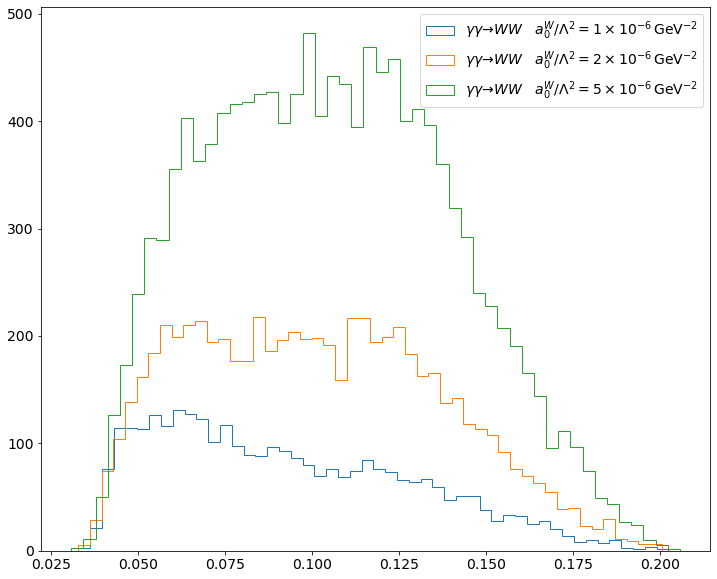

In [8]:
labels_samples = {
    "GGToWW-AQGC-A0W5e-7": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-7} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}
labels_samples[ "GGToWW-AQGC-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

if load_signal:
    fig = plt.figure( figsize=(12,10) )
    for label_ in labels_signals: 
        plt.hist( df_signals_protons_multiRP_index[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
    plt.legend( loc='best', fontsize=14 )

### Ouf of acceptance protons

### Signal with pileup/data protons

In [9]:
labels_signals_mix_protons = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]

map_labels_from_mix_protons = {}
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6" ] = "GGToWW-AQGC-2017-muon-A0W1e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6" ] = "GGToWW-AQGC-2017-muon-A0W2e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ] = "GGToWW-AQGC-2017-muon-A0W5e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6" ] = "GGToWW-AQGC-2017-electron-A0W1e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6" ] = "GGToWW-AQGC-2017-electron-A0W2e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ] = "GGToWW-AQGC-2017-electron-A0W5e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6" ] = "GGToWW-AQGC-2018-muon-A0W1e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6" ] = "GGToWW-AQGC-2018-muon-A0W2e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ] = "GGToWW-AQGC-2018-muon-A0W5e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6" ] = "GGToWW-AQGC-2018-electron-A0W1e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6" ] = "GGToWW-AQGC-2018-electron-A0W2e-6"
map_labels_from_mix_protons[ "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ] = "GGToWW-AQGC-2018-electron-A0W5e-6"
    
df_counts_signals_mix_protons = {}
df_signals_protons_multiRP_mix_protons_index = {}
df_signals_protons_multiRP_mix_protons_events = {}
if load_signal:
    base_path_ = "output_tmp"
    for label_ in labels_signals_mix_protons:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [10]:
df_signals_protons_multiRP_mix_protons_index[ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6" ].columns.values

array(['crossingAngle', 'betaStar', 'instLumi', 'xi', 'thx', 'thy', 't',
       'ismultirp', 'rpid', 'arm', 'random', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
       'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
       'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
       'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
       'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
       'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
       'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
       'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
       'run_mc', 'pileupWeight', 'mc_pu_trueinteractions', 'mcWeight',
       'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down',
       'prefiring_weight_ECAL', 'prefiring_weight_ECAL_up',
       'prefiring_weight_ECAL_down', 'prefi

In [11]:
df_signals_protons_multiRP_mix_protons_events[ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6" ].columns.values

array(['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
       'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
       'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
       'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
       'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
       'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
       'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
       'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
       'run_mc', 'pileupWeight', 'mc_pu_trueinteractions', 'mcWeight',
       'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down',
       'prefiring_weight_ECAL', 'prefiring_weight_ECAL_up',
       'prefiring_weight_ECAL_down', 'prefiring_weight_Muon',
       'prefiring_weight_Muon_up', 'prefiring_weigh

In [12]:
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_index[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6'
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   36        360   15759891907279894639 0              130.0       0.4   
    130       1297  2733162038402204649  0              136.0       0.4   
    1079      10787 6657701452862348520  0              130.0       0.4   
    1275      12743 15180813115243696486 0              138.0       0.4   
    1424      14234 5806656075052075346  0              130.0       0.4   
...                                                       ...       ...   
    9290      92893 14107772636000041223 0              157.0       0.4   
    9441      94402 8899934964589349827  0              152.0       0.4   
    9747      97467 9630769516458414972  0              152.0       0.4   
    9770      97700 5716820381342743681  0              150.0       0.4   
    9786      97853 1305008129426591473  0              150.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   36        360   15759891907279894639 0           0.0   941.069031   
    130       1297  2733162038402204649  0           0.0   458.484131   
    1079      10787 6657701452862348520  0           0.0   557.829956   
    1275      12743 15180813115243696486 0           0.0   280.543915   
    1424      14234 5806656075052075346  0           0.0   393.835388   
...                                                  ...          ...   
    9290      92893 14107772636000041223 0           0.0   775.831970   
    9441      94402 8899934964589349827  0           0.0  1090.305420   
    9747      97467 9630769516458414972  0           0.0   776.280762   
    9770      97700 5716820381342743681  0           0.0   589.358276   
    9786      97853 1305008129426591473  0           0.0   652.005920   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   36        360   15759891907279894639 0      0.196197 -1.509857   
    130       1297  2733162038402204649  0      0.507141 -1.666551   
    1079      10787 6657701452862348520  0     -0.023197 -2.784490   
    1275      12743 15180813115243696486 0     -0.552765 -0.667249   
    1424      14234 5806656075052075346  0     -1.285722  0.731988   
...                                                  ...       ...   
    9290      92893 14107772636000041223 0      0.679586 -0.255646   
    9441      94402 8899934964589349827  0      0.086002 -1.042168   
    9747      97467 9630769516458414972  0     -0.507954  1.679240   
    9770      97700 5716820381342743681  0     -1.445047 -0.045028   
    9786      97853 1305008129426591473  0     -0.944760  2.065485   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   36        360   15759891907279894639 0       967.711243  75.874359   
    130       1297  2733162038402204649  0       531.562866  86.913765   
    1079      10787 6657701452862348520  0       569.714783  76.370529   
    1275      12743 15180813115243696486 0       342.387299  94.046089   
    1424      14234 5806656075052075346  0       773.644165  82.892929   
...                                                     ...        ...   
    9290      92893 14107772636000041223 0       966.470337  19.741848   
    9441      94402 8899934964589349827  0      1104.276733  80.021210   
    9747      97467 9630769516458414972  0       884.666931  75.604988   
    9770      97700 5716820381342743681  0      1324.873657  76.667091   
    9786      97853 1305008129426591473  0       971.142822  66.935211   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   36        360   15759891907279894639 0          80.560516   0.081853  ...   
    1

In [13]:
label__ = 'eff_proton'
msk_columns_ = [ key_[:len(label__)] == label__ for key_ in df_signals_protons_multiRP_mix_protons_events[ label_ref_ ].columns ]
columns_ = df_signals_protons_multiRP_mix_protons_events[ label_ref_ ].columns[ msk_columns_ ]
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ][ columns_ ]

eff_proton_all  \
run lumiblock event hash_id              slice                   
1   36        360   15759891907279894639 0                 1.0   
    130       1297  2733162038402204649  0                 1.0   
    1079      10787 6657701452862348520  0                 1.0   
    1275      12743 15180813115243696486 0                 1.0   
    1424      14234 5806656075052075346  0                 1.0   
...                                                        ...   
    9290      92893 14107772636000041223 0                 1.0   
    9441      94402 8899934964589349827  0                 1.0   
    9747      97467 9630769516458414972  0                 1.0   
    9770      97700 5716820381342743681  0                 1.0   
    9786      97853 1305008129426591473  0                 1.0   

                                                eff_proton_all_weighted  \
run lumiblock event hash_id              slice                            
1   36        360   15759891907279894639 0                          1.0   
    130       1297  2733162038402204649  0                          1.0   
    1079      10787 6657701452862348520  0                          1.0   
    1275      12743 15180813115243696486 0                          1.0   
    1424      14234 5806656075052075346  0                          1.0   
...                                                                 ...   
    9290      92893 14107772636000041223 0                          1.0   
    9441      94402 8899934964589349827  0                          1.0   
    9747      97467 9630769516458414972  0                          1.0   
    9770      97700 5716820381342743681  0                          1.0   
    9786      97853 1305008129426591473  0                          1.0   

                                                eff_proton_unc  \
run lumiblock event hash_id              slice                   
1   36        360   15759891907279894639 0                 0.0   
    130       1297  2733162038402204649  0                 0.0   
    1079      10787 6657701452862348520  0                 0.0   
    1275      12743 15180813115243696486 0                 0.0   
    1424      14234 5806656075052075346  0                 0.0   
...                                                        ...   
    9290      92893 14107772636000041223 0                 0.0   
    9441      94402 8899934964589349827  0                 0.0   
    9747      97467 9630769516458414972  0                 0.0   
    9770      97700 5716820381342743681  0                 0.0   
    9786      97853 1305008129426591473  0                 0.0   

                                                eff_proton_var_up  \
run lumiblock event hash_id              slice                      
1   36        360   15759891907279894639 0                    1.0   
    130       1297  2733162038402204649  0                    1.0   
    1079      10787 6657701452862348520  0                    1.0   
    1275      12743 15180813115243696486 0                    1.0   
    1424      14234 5806656075052075346  0                    1.0   
...                                                           ...   
    9290      92893 14107772636000041223 0                    1.0   
    9441      94402 8899934964589349827  0                    1.0   
    9747      97467 9630769516458414972  0                    1.0   
    9770      97700 5716820381342743681  0                    1.0   
    9786      97853 1305008129426591473  0                    1.0   

                                                eff_proton_var_dw  
run lumiblock event hash_id              slice                     
1   36        360   15759891907279894639 0                    1.0  
    130       1297  2733162038402204649  0                    1.0  
    1079      10787 6657701452862348520  0                    1.0  
    1275      12743 15180813115243696486 0                    1.0  
    1424      14234 5806656075052075346  0      

In [14]:
label__ = 'MX'
msk_columns_ = [ key_[:len(label__)] == label__ for key_ in df_signals_protons_multiRP_mix_protons_events[ label_ref_ ].columns ]
columns_ = df_signals_protons_multiRP_mix_protons_events[ label_ref_ ].columns[ msk_columns_ ]
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ][ columns_ ]

MX       MX_nom  \
run lumiblock event hash_id              slice                             
1   36        360   15759891907279894639 0       654.002930   654.002930   
    130       1297  2733162038402204649  0       960.377869   960.377869   
    1079      10787 6657701452862348520  0       975.507202   975.507202   
    1275      12743 15180813115243696486 0      2007.418335  2007.418335   
    1424      14234 5806656075052075346  0       569.415527   569.415527   
...                                                     ...          ...   
    9290      92893 14107772636000041223 0      2026.452393  2026.452393   
    9441      94402 8899934964589349827  0      1493.863403  1493.863403   
    9747      97467 9630769516458414972  0      1336.274780  1336.274780   
    9770      97700 5716820381342743681  0      1642.672607  1642.672607   
    9786      97853 1305008129426591473  0      1869.105835  1869.105835   

                                                 MX_nom_nom  MX_nom_p100  \
run lumiblock event hash_id              slice                             
1   36        360   15759891907279894639 0       654.002938   654.002920   
    130       1297  2733162038402204649  0       960.377842   960.377890   
    1079      10787 6657701452862348520  0       975.507185   975.507154   
    1275      12743 15180813115243696486 0      2007.418394  2007.418323   
    1424      14234 5806656075052075346  0       569.415547   569.415545   
...                                                     ...          ...   
    9290      92893 14107772636000041223 0      2026.452452  2026.452458   
    9441      94402 8899934964589349827  0      1493.863404  1493.863416   
    9747      97467 9630769516458414972  0      1336.274721  1336.274770   
    9770      97700 5716820381342743681  0      1642.672628  1642.672640   
    9786      97853 1305008129426591473  0      1869.105816  1869.105685   

                                                MX_nom_m100  MX_p100_nom  \
run lumiblock event hash_id              slice                             
1   36        360   15759891907279894639 0       654.002920   654.002920   
    130       1297  2733162038402204649  0       960.377890   960.377890   
    1079      10787 6657701452862348520  0       975.507154   975.507154   
    1275      12743 15180813115243696486 0      2007.418323  2007.418323   
    1424      14234 5806656075052075346  0       569.415545   569.415545   
...                                                     ...          ...   
    9290      92893 14107772636000041223 0      2026.452458  2026.452458   
    9441      94402 8899934964589349827  0      1493.863416  1493.863416   
    9747      97467 9630769516458414972  0      1336.274770  1336.274770   
    9770      97700 5716820381342743681  0      1642.672640  1642.672640   
    9786      97853 1305008129426591473  0      1869.105685  1869.105685   

                                                MX_p100_p100  MX_p100_m100  \
run lumiblock event hash_id              slice                               
1   36        360   15759891907279894639 0        654.002920    654.002920   
    130       1297  2733162038402204649  0        960.377890    960.377890   
    1079      10787 6657701452862348520  0        975.507154    975.507154   
    1275      12743 15180813115243696486 0       2007.418323   2007.418323   
    1424      14234 5806656075052075346  0        569.415545    569.415545   
...                                                      ...           ...   
    9290      92893 14107772636000041223 0       2026.452458   2026.452458   
    9441      94402 8899934964589349827  0       1493.863416   1493.863416   
    9747      97467 9630769516458414972  0       1336.274770   1336.274770   
    9770      97700 5716820381342743681  0       1642.672640   1642.672640   
    9786      97853 1305008129426591473  0       1869.105685   1869.105685   

                                                MX_m100_nom  MX_m100_p100  

### Signal with event mixing (signal plus pileup protons)

In [15]:
df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_events_categories = {}
base_path_ = "output_tmp"
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-signal-plus-mix-events-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            print ( key_ )
            df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
            df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-2018-muon-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


In [16]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
# columns__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values
# columns_electron__ = columns__[ [ key_.find( "electron" ) >= 0 for key_ in columns__ ] ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ columns_electron__ ]
df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   13        124   9769400599093786817  0              148.0       0.4   
    22        213   8833972083606893094  0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    36        360   15759891907279894639 0              130.0       0.4   
    38        372   7074991263971531930  0              152.0       0.4   
...                                                       ...       ...   
    9967      99661 9457232060636232257  0              155.0       0.4   
              99666 12762805257830093162 0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9988      99879 8441746362180913029  0              151.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   13        124   9769400599093786817  0           0.0  781.689758   
    22        213   8833972083606893094  0           0.0  214.828033   
    25        246   6732049695921593490  0           0.0  569.114075   
    36        360   15759891907279894639 0           0.0  941.069031   
    38        372   7074991263971531930  0           0.0  231.936005   
...                                                  ...         ...   
    9967      99661 9457232060636232257  0           0.0  292.841248   
              99666 12762805257830093162 0           0.0  607.864502   
    9971      99701 15913202775396096505 0           0.0  262.650391   
    9988      99879 8441746362180913029  0           0.0  238.896408   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   13        124   9769400599093786817  0     -0.220779 -1.653149   
    22        213   8833972083606893094  0      0.687979  0.375376   
    25        246   6732049695921593490  0      1.052705  2.353809   
    36        360   15759891907279894639 0      0.196197 -1.509857   
    38        372   7074991263971531930  0     -0.483900 -2.231769   
...                                                  ...       ...   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
              99666 12762805257830093162 0     -0.316360  0.524719   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9988      99879 8441746362180913029  0      0.281532 -2.066732   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   13        124   9769400599093786817  0       809.044128   41.911980   
    22        213   8833972083606893094  0       280.092041   71.716690   
    25        246   6732049695921593490  0       927.567322  103.537247   
    36        360   15759891907279894639 0       967.711243   75.874359   
    38        372   7074991263971531930  0       264.667664   38.101234   
...                                                     ...         ...   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
              99666 12762805257830093162 0       645.346863   66.479370   
    9971      99701 15913202775396096505 0       773.146790   68.773056   
    9988      99879 8441746362180913029  0       256.136414   12.341436   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   13        124   9769400599093786817  0          44.644531   0.115940  ...   
    2

In [17]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    64        636   1889158458402674605  0              130.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    77        762   898270863651217580   0              148.0       0.4   
...                                                       ...       ...   
    9917      99167 7037532472275048024  0              148.0       0.4   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    64        636   1889158458402674605  0           0.0  274.994659   
    71        706   10284919335476110625 0           0.0  568.194763   
    77        762   898270863651217580   0           0.0  241.249664   
...                                                  ...         ...   
    9917      99167 7037532472275048024  0           0.0  603.757324   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    64        636   1889158458402674605  0      0.914896 -1.320226   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    77        762   898270863651217580   0     -0.617383  0.646603   
...                                                  ...       ...   
    9917      99167 7037532472275048024  0      0.529868  0.767814   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    64        636   1889158458402674605  0       408.026917   74.735039   
    71        706   10284919335476110625 0      1031.590454   67.864975   
    77        762   898270863651217580   0       294.636505   39.659046   
...                                                     ...         ...   
    9917      99167 7037532472275048024  0       699.042664   77.520233   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   25        246   6732049695921593490  0         114.010490   0.172032  ...   
    4

In [18]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   22        213   8833972083606893094  0              130.0       0.4   
    55        548   10111487040465804063 0              147.0       0.4   
    109       1087  17131802332494696354 0              130.0       0.4   
    128       1279  1682310974095401059  0              150.0       0.4   
    130       1297  2733162038402204649  0              136.0       0.4   
...                                                       ...       ...   
    9873      98726 5549407172083963592  0              147.0       0.4   
    9876      98759 5155927611239620215  0              143.0       0.4   
    9894      98933 412653800162893373   0              157.0       0.4   
    9897      98962 5201951297012027279  0              130.0       0.4   
    9913      99122 18099696035221687939 0              137.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   22        213   8833972083606893094  0           0.0  214.828033   
    55        548   10111487040465804063 0           0.0  211.374191   
    109       1087  17131802332494696354 0           0.0  247.038254   
    128       1279  1682310974095401059  0           0.0  544.570007   
    130       1297  2733162038402204649  0           0.0  458.484131   
...                                                  ...         ...   
    9873      98726 5549407172083963592  0           0.0  629.895874   
    9876      98759 5155927611239620215  0           0.0  287.164917   
    9894      98933 412653800162893373   0           0.0  303.460114   
    9897      98962 5201951297012027279  0           0.0  216.356216   
    9913      99122 18099696035221687939 0           0.0  306.848175   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   22        213   8833972083606893094  0      0.687979  0.375376   
    55        548   10111487040465804063 0     -1.255503 -2.017078   
    109       1087  17131802332494696354 0      1.403882 -2.276454   
    128       1279  1682310974095401059  0     -1.031493 -2.873971   
    130       1297  2733162038402204649  0      0.507141 -1.666551   
...                                                  ...       ...   
    9873      98726 5549407172083963592  0     -0.698198 -1.968897   
    9876      98759 5155927611239620215  0     -0.435011  1.896875   
    9894      98933 412653800162893373   0      1.097416 -2.882606   
    9897      98962 5201951297012027279  0      2.074941  1.030211   
    9913      99122 18099696035221687939 0     -1.948019  1.278039   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   22        213   8833972083606893094  0       280.092041  71.716690   
    55        548   10111487040465804063 0       404.987579  10.673149   
    109       1087  17131802332494696354 0       542.039185  72.382683   
    128       1279  1682310974095401059  0       870.700867  83.670944   
    130       1297  2733162038402204649  0       531.562866  86.913765   
...                                                     ...        ...   
    9873      98726 5549407172083963592  0       801.228699   6.546365   
    9876      98759 5155927611239620215  0       328.102997  73.076782   
    9894      98933 412653800162893373   0       515.766174  67.655952   
    9897      98962 5201951297012027279  0       880.977905  84.747696   
    9913      99122 18099696035221687939 0      1103.445801  81.988060   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   22        213   8833972083606893094  0          76.635963   0.379205  ...   
    55        548 

In [19]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   13        124   9769400599093786817  0              148.0       0.4   
    36        360   15759891907279894639 0              130.0       0.4   
    38        372   7074991263971531930  0              152.0       0.4   
    53        526   557268409041302119   0              149.0       0.4   
    60        593   11479252221660711580 0              144.0       0.4   
...                                                       ...       ...   
    9945      99445 14904909032249110571 0              146.0       0.4   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9967      99666 12762805257830093162 0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9988      99879 8441746362180913029  0              151.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   13        124   9769400599093786817  0           0.0  781.689758   
    36        360   15759891907279894639 0           0.0  941.069031   
    38        372   7074991263971531930  0           0.0  231.936005   
    53        526   557268409041302119   0           0.0  202.998352   
    60        593   11479252221660711580 0           0.0  225.833420   
...                                                  ...         ...   
    9945      99445 14904909032249110571 0           0.0  974.030457   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9967      99666 12762805257830093162 0           0.0  607.864502   
    9971      99701 15913202775396096505 0           0.0  262.650391   
    9988      99879 8441746362180913029  0           0.0  238.896408   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   13        124   9769400599093786817  0     -0.220779 -1.653149   
    36        360   15759891907279894639 0      0.196197 -1.509857   
    38        372   7074991263971531930  0     -0.483900 -2.231769   
    53        526   557268409041302119   0     -0.314340 -2.106972   
    60        593   11479252221660711580 0      1.460313  1.167191   
...                                                  ...       ...   
    9945      99445 14904909032249110571 0     -0.469738  2.998941   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9967      99666 12762805257830093162 0     -0.316360  0.524719   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9988      99879 8441746362180913029  0      0.281532 -2.066732   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   13        124   9769400599093786817  0       809.044128  41.911980   
    36        360   15759891907279894639 0       967.711243  75.874359   
    38        372   7074991263971531930  0       264.667664  38.101234   
    53        526   557268409041302119   0       218.904190  26.348419   
    60        593   11479252221660711580 0       520.812378  82.395920   
...                                                     ...        ...   
    9945      99445 14904909032249110571 0      1090.758911  19.259232   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9967      99666 12762805257830093162 0       645.346863  66.479370   
    9971      99701 15913202775396096505 0       773.146790  68.773056   
    9988      99879 8441746362180913029  0       256.136414  12.341436   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   13        124   9769400599093786817  0          44.644531   0.115940  ...   
    36        360 

In [20]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   40        397   17437731705066552538 0              155.0       0.4   
    43        429   4831582843114975882  0              146.0       0.4   
    77        766   17962299504231434552 0              148.0       0.4   
    120       1197  7855954304798982754  0              140.0       0.4   
    146       1455  6244035594467008882  0              146.0       0.4   
...                                                       ...       ...   
    9859      98581 11672289383688384281 0              133.0       0.4   
    9903      99028 1185134796922204255  0              152.0       0.4   
    9915      99142 4799633028163048735  0              153.0       0.4   
    9958      99576 5707407644788461583  0              152.0       0.4   
    9965      99643 591237960468817212   0              144.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   40        397   17437731705066552538 0           0.0   240.425400   
    43        429   4831582843114975882  0           0.0   283.248535   
    77        766   17962299504231434552 0           0.0   974.753662   
    120       1197  7855954304798982754  0           0.0   702.705444   
    146       1455  6244035594467008882  0           0.0   287.702515   
...                                                  ...          ...   
    9859      98581 11672289383688384281 0           0.0   461.045807   
    9903      99028 1185134796922204255  0           0.0   235.916458   
    9915      99142 4799633028163048735  0           0.0  1081.300171   
    9958      99576 5707407644788461583  0           0.0   216.953384   
    9965      99643 591237960468817212   0           0.0   699.864014   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   40        397   17437731705066552538 0     -0.490470 -1.088258   
    43        429   4831582843114975882  0      0.237253 -3.104515   
    77        766   17962299504231434552 0     -0.880406  2.574607   
    120       1197  7855954304798982754  0      0.857371  1.895296   
    146       1455  6244035594467008882  0      1.864606 -0.924399   
...                                                  ...       ...   
    9859      98581 11672289383688384281 0      1.283781  0.547317   
    9903      99028 1185134796922204255  0     -0.008213  2.347254   
    9915      99142 4799633028163048735  0      0.210801 -2.095829   
    9958      99576 5707407644788461583  0      2.195904  3.113377   
    9965      99643 591237960468817212   0     -0.141567  3.072752   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   40        397   17437731705066552538 0       285.937347  84.732925   
    43        429   4831582843114975882  0       308.036896  84.866615   
    77        766   17962299504231434552 0      1385.311035  82.875237   
    120       1197  7855954304798982754  0       982.677246  65.643089   
    146       1455  6244035594467008882  0       955.719055  71.601448   
...                                                     ...        ...   
    9859      98581 11672289383688384281 0       902.644775  63.315220   
    9903      99028 1185134796922204255  0       238.106216   3.348589   
    9915      99142 4799633028163048735  0      1112.059326  73.809258   
    9958      99576 5707407644788461583  0       990.469788  56.436554   
    9965      99643 591237960468817212   0       718.478210  62.078152   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   40        397   17437731705066552538 0          90.967049   0.407176  ...   
    4

In [21]:
cat__ = '1proton_sig_Arm0'
msk_columns_ = [ key_[:len('MX')] == 'MX' for key_ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ].columns ]
columns_ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ].columns[ msk_columns_ ]
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ][ columns_ ]

MX       MX_nom  \
run lumiblock event hash_id              slice                             
1   22        213   8833972083606893094  0       994.029419   994.029419   
    55        548   10111487040465804063 0       904.743958   904.743958   
    109       1087  17131802332494696354 0      1820.167969  1820.167969   
    128       1279  1682310974095401059  0      1548.223633  1548.223633   
    130       1297  2733162038402204649  0       986.605103   986.605103   
...                                                     ...          ...   
    9873      98726 5549407172083963592  0      1265.218262  1265.218262   
    9876      98759 5155927611239620215  0      1100.025635  1100.025635   
    9894      98933 412653800162893373   0      1576.320190  1576.320190   
    9897      98962 5201951297012027279  0       958.584900   958.584900   
    9913      99122 18099696035221687939 0       577.410522   577.410522   

                                                 MX_nom_nom  MX_nom_p100  \
run lumiblock event hash_id              slice                             
1   22        213   8833972083606893094  0       994.029447   994.029442   
    55        548   10111487040465804063 0       904.743932   904.743954   
    109       1087  17131802332494696354 0      1820.167959  1820.167936   
    128       1279  1682310974095401059  0      1548.223637  1548.223685   
    130       1297  2733162038402204649  0       986.605123   986.605139   
...                                                     ...          ...   
    9873      98726 5549407172083963592  0      1265.218280  1265.218298   
    9876      98759 5155927611239620215  0      1100.025602  1100.025562   
    9894      98933 412653800162893373   0      1576.320171  1576.320164   
    9897      98962 5201951297012027279  0       958.584912   958.584941   
    9913      99122 18099696035221687939 0       577.410508   577.410526   

                                                MX_nom_m100  MX_p100_nom  \
run lumiblock event hash_id              slice                             
1   22        213   8833972083606893094  0       994.029442  1030.110970   
    55        548   10111487040465804063 0       904.743954   904.743954   
    109       1087  17131802332494696354 0      1820.167936  1883.291954   
    128       1279  1682310974095401059  0      1548.223685  1602.270478   
    130       1297  2733162038402204649  0       986.605139  1023.283059   
...                                                     ...          ...   
    9873      98726 5549407172083963592  0      1265.218298  1265.218298   
    9876      98759 5155927611239620215  0      1100.025562  1142.612969   
    9894      98933 412653800162893373   0      1576.320164  1633.130827   
    9897      98962 5201951297012027279  0       958.584941   992.627884   
    9913      99122 18099696035221687939 0       577.410526   600.304845   

                                                MX_p100_p100  MX_p100_m100  \
run lumiblock event hash_id              slice                               
1   22        213   8833972083606893094  0       1030.110970   1030.110970   
    55        548   10111487040465804063 0        904.743954    904.743954   
    109       1087  17131802332494696354 0       1883.291954   1883.291954   
    128       1279  1682310974095401059  0       1602.270478   1602.270478   
    130       1297  2733162038402204649  0       1023.283059   1023.283059   
...                                                      ...           ...   
    9873      98726 5549407172083963592  0       1265.218298   1265.218298   
    9876      98759 5155927611239620215  0       1142.612969   1142.612969   
    9894      98933 412653800162893373   0       1633.130827   1633.130827   
    9897      98962 5201951297012027279  0        992.627884    992.627884   
    9913      99122 18099696035221687939 0        600.304845    600.304845   

                                                MX_m100_nom  MX_m100_p100  

### Dissociative signal template (signal plus pileup protons)

In [22]:
run_dissociative_signal = True

# Single-dissociative
df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories = {}
df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories = {}
# Double-dissociative
# Use df_signals_protons_multiRP_mix_protons_events
# For double-dissociative category is always '2protons_mix'
df_signals_protons_multiRP_mix_protons_signal_label_events = {}
for label_ in df_signals_protons_multiRP_mix_protons_events:
    print ( label_ )
    df_signals_protons_multiRP_mix_protons_signal_label_events[ map_labels_from_mix_protons[ label_ ] ] = df_signals_protons_multiRP_mix_protons_events[ label_ ]

base_path_ = "output_tmp"
for label_ in labels_signals:
    print ( label_ )
    
    file_path_ = "{}/data-store-signal-plus-mix-events-{}-Arm0.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( store_.keys() )
        df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            store_key__ = "/events_multiRP/{}".format( key_ )
            if store_key__ in store_.keys():
                print ( store_key__ )
                df_protons_multiRP_events__ = store_[ store_key__ ]
                df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__
                
    file_path_ = "{}/data-store-signal-plus-mix-events-{}-Arm1.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( store_.keys() )
        df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            store_key__ = "/events_multiRP/{}".format( key_ )
            if store_key__ in store_.keys():
                print ( store_key__ )
                df_protons_multiRP_events__ = store_[ store_key__ ]
                df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6
GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6
GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6
GGToWW-AQGC-2018-muon-A0W1e-6
['/events_multiRP/1proton_sig_Arm0', '/events_multiRP/2protons_mix', '/events_multiRP/all']
/events_multiRP/1proton_sig_Arm0
/events_multiRP/2protons_mix
['/events_multiRP/1proton_sig_Arm1', '/events_multiRP/2protons_mix', '/events_multiRP/all']
/events_multiRP/1proton_sig_Arm1
/events_multiRP/2protons_mix
GGToWW-AQGC-2018-muon-A0W2e-6
['/events_multiRP/1proton_sig_Arm0', '/events_multiRP/2protons_mix', '/events_multiRP/all']
/events_multiRP/1proton_sig_Arm0
/events_multiRP/2protons_mix
['/events_multiRP/1proton_sig_Arm1', '/events_multiRP/2protons_mix', '/events_multiRP/all']
/events_multiRP/1proton_sig_Arm1
/events_multiRP/2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
['/events_multiRP/1proton_sig_Arm0', '/events_multiRP/2protons_mix', '/events_multiRP/all']
/events_multiRP/1proton_sig_Arm0
/events_multiRP/2protons_mix
['/events_mult

In [23]:
print ( label_ )
df_signals_protons_multiRP_mix_protons_signal_label_events[ label_ ]

GGToWW-AQGC-2018-muon-A0W5e-6


crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        179   8042458724169279314  0              131.0       0.4   
    25        242   489842937055938942   0              133.0       0.4   
    69        683   10996165241964958325 0              130.0       0.4   
              690   3859415350609961902  0              130.0       0.4   
    73        727   2847300601973514711  0              130.0       0.4   
...                                                       ...       ...   
    9814      98132 14427804712788458202 0              153.0       0.4   
    9817      98165 6340560457316002323  0              156.0       0.4   
    9845      98450 16534910030521099435 0              152.0       0.4   
    9867      98665 17204157463475308999 0              150.0       0.4   
    9951      99504 9104402618417556905  0              154.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   18        179   8042458724169279314  0           0.0  1263.702759   
    25        242   489842937055938942   0           0.0  1177.231812   
    69        683   10996165241964958325 0           0.0   791.836121   
              690   3859415350609961902  0           0.0   524.468262   
    73        727   2847300601973514711  0           0.0   872.947510   
...                                                  ...          ...   
    9814      98132 14427804712788458202 0           0.0   848.710693   
    9817      98165 6340560457316002323  0           0.0   489.589264   
    9845      98450 16534910030521099435 0           0.0   773.885742   
    9867      98665 17204157463475308999 0           0.0   991.904907   
    9951      99504 9104402618417556905  0           0.0   670.695496   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        179   8042458724169279314  0     -0.216258  2.393117   
    25        242   489842937055938942   0     -0.335595 -2.835608   
    69        683   10996165241964958325 0     -0.774823 -0.774699   
              690   3859415350609961902  0     -1.387051 -2.534396   
    73        727   2847300601973514711  0     -0.680164  2.050172   
...                                                  ...       ...   
    9814      98132 14427804712788458202 0      0.474080  2.305247   
    9817      98165 6340560457316002323  0     -0.102099 -2.548593   
    9845      98450 16534910030521099435 0     -0.624516 -2.734052   
    9867      98665 17204157463475308999 0      0.375125  1.188450   
    9951      99504 9104402618417556905  0      0.755730 -0.659340   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        179   8042458724169279314  0      1302.707642  78.862877   
    25        242   489842937055938942   0      1251.512939  81.868385   
    69        683   10996165241964958325 0      1047.366821  70.890816   
              690   3859415350609961902  0      1118.946045  59.779503   
    73        727   2847300601973514711  0      1089.557129  49.298332   
...                                                     ...        ...   
    9814      98132 14427804712788458202 0       953.824219  76.013741   
    9817      98165 6340560457316002323  0       500.296722  14.723684   
    9845      98450 16534910030521099435 0       937.600037  79.345856   
    9867      98665 17204157463475308999 0      1068.445923  48.425339   
    9951      99504 9104402618417556905  0       878.167542  68.328209   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        179   8042458724169279314  0          83.531410   0.059436  ...   
    2

In [24]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         8     2622332326560339455  0              152.0       0.4   
              10    9311444988691148512  0              152.0       0.4   
    2         11    14339887669900922026 0              152.0       0.4   
              14    4823024105027095302  0              152.0       0.4   
              19    6960065006136065711  0              152.0       0.4   
...                                                       ...       ...   
    9993      99923 8645810709966289029  0              146.0       0.4   
              99929 11625403315842461336 0              146.0       0.4   
    9997      99961 3971670346507210725  0              152.0       0.4   
              99964 3255649066454345609  0              152.0       0.4   
    9998      99973 16755594709859646975 0              130.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   1         8     2622332326560339455  0           0.0   874.190308   
              10    9311444988691148512  0           0.0   397.618103   
    2         11    14339887669900922026 0           0.0   748.580688   
              14    4823024105027095302  0           0.0   353.768738   
              19    6960065006136065711  0           0.0   478.504852   
...                                                  ...          ...   
    9993      99923 8645810709966289029  0           0.0   629.822754   
              99929 11625403315842461336 0           0.0  1247.465332   
    9997      99961 3971670346507210725  0           0.0   409.752472   
              99964 3255649066454345609  0           0.0   831.142517   
    9998      99973 16755594709859646975 0           0.0  1011.552002   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         8     2622332326560339455  0      0.290269 -2.929739   
              10    9311444988691148512  0      1.140043  2.088910   
    2         11    14339887669900922026 0     -0.386914  1.900301   
              14    4823024105027095302  0      0.939468 -0.837602   
              19    6960065006136065711  0      1.164251 -2.817455   
...                                                  ...       ...   
    9993      99923 8645810709966289029  0      0.841221 -0.947452   
              99929 11625403315842461336 0     -0.088540 -1.707610   
    9997      99961 3971670346507210725  0      0.919408 -2.444236   
              99964 3255649066454345609  0     -0.274230  0.518878   
    9998      99973 16755594709859646975 0     -0.459310 -0.840439   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         8     2622332326560339455  0       921.402771  77.229576   
              10    9311444988691148512  0       694.553589  85.630684   
    2         11    14339887669900922026 0       811.269897  76.375458   
              14    4823024105027095302  0       525.313843  20.983370   
              19    6960065006136065711  0       847.133911  86.984634   
...                                                     ...        ...   
    9993      99923 8645810709966289029  0       873.413635  79.016388   
              99929 11625403315842461336 0      1258.838135  38.703003   
    9997      99961 3971670346507210725  0       604.256409  74.262604   
              99964 3255649066454345609  0       871.412598  81.244156   
    9998      99973 16755594709859646975 0      1127.926025  68.473541   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         8     2622332326560339455  0          82.164307   0.123864  ...   
     

In [25]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories[ label_ ].keys()

dict_keys(['1proton_sig_Arm0', '2protons_mix'])

In [26]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         10    9311444988691148512  0              152.0       0.4   
    2         11    14339887669900922026 0              152.0       0.4   
              14    4823024105027095302  0              152.0       0.4   
    8         78    9565736363853536991  0              130.0       0.4   
    17        164   4270718912692784336  0              156.0       0.4   
...                                                       ...       ...   
    9968      99680 17631400360546717515 0              140.0       0.4   
    9973      99727 8396268863521747031  0              130.0       0.4   
    9980      99794 9689464037715122042  0              148.0       0.4   
    9993      99923 8645810709966289029  0              146.0       0.4   
    9997      99961 3971670346507210725  0              152.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   1         10    9311444988691148512  0           0.0  397.618103   
    2         11    14339887669900922026 0           0.0  748.580688   
              14    4823024105027095302  0           0.0  353.768738   
    8         78    9565736363853536991  0           0.0  734.699890   
    17        164   4270718912692784336  0           0.0  454.593811   
...                                                  ...         ...   
    9968      99680 17631400360546717515 0           0.0  503.506317   
    9973      99727 8396268863521747031  0           0.0  455.834564   
    9980      99794 9689464037715122042  0           0.0  665.817810   
    9993      99923 8645810709966289029  0           0.0  629.822754   
    9997      99961 3971670346507210725  0           0.0  409.752472   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         10    9311444988691148512  0      1.140043  2.088910   
    2         11    14339887669900922026 0     -0.386914  1.900301   
              14    4823024105027095302  0      0.939468 -0.837602   
    8         78    9565736363853536991  0      0.276801 -1.858012   
    17        164   4270718912692784336  0     -0.908498  0.201177   
...                                                  ...       ...   
    9968      99680 17631400360546717515 0     -0.123415  2.982986   
    9973      99727 8396268863521747031  0      0.175366  2.418050   
    9980      99794 9689464037715122042  0      0.395742  1.217064   
    9993      99923 8645810709966289029  0      0.841221 -0.947452   
    9997      99961 3971670346507210725  0      0.919408 -2.444236   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         10    9311444988691148512  0       694.553589  85.630684   
    2         11    14339887669900922026 0       811.269897  76.375458   
              14    4823024105027095302  0       525.313843  20.983370   
    8         78    9565736363853536991  0       770.338867  70.142433   
    17        164   4270718912692784336  0       662.877747  79.319519   
...                                                     ...        ...   
    9968      99680 17631400360546717515 0       516.470215  69.780937   
    9973      99727 8396268863521747031  0       480.411255  74.405212   
    9980      99794 9689464037715122042  0       725.587463  67.500328   
    9993      99923 8645810709966289029  0       873.413635  79.016388   
    9997      99961 3971670346507210725  0       604.256409  74.262604   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         10    9311444988691148512  0          95.967438   0.242595  ...   
    2         11  

In [27]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         8     2622332326560339455  0              152.0       0.4   
    2         19    6960065006136065711  0              152.0       0.4   
              20    18285402744538483498 0              152.0       0.4   
    3         30    1676622736153757005  0              156.0       0.4   
    7         64    4897658175686918909  0              140.0       0.4   
...                                                       ...       ...   
    9985      99843 12305226405234319792 0              149.0       0.4   
    9989      99883 6690318103699111274  0              158.0       0.4   
    9993      99929 11625403315842461336 0              146.0       0.4   
    9997      99964 3255649066454345609  0              152.0       0.4   
    9998      99973 16755594709859646975 0              130.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   1         8     2622332326560339455  0           0.0   874.190308   
    2         19    6960065006136065711  0           0.0   478.504852   
              20    18285402744538483498 0           0.0   808.223328   
    3         30    1676622736153757005  0           0.0   969.977783   
    7         64    4897658175686918909  0           0.0   624.856323   
...                                                  ...          ...   
    9985      99843 12305226405234319792 0           0.0   661.380432   
    9989      99883 6690318103699111274  0           0.0  1123.888672   
    9993      99929 11625403315842461336 0           0.0  1247.465332   
    9997      99964 3255649066454345609  0           0.0   831.142517   
    9998      99973 16755594709859646975 0           0.0  1011.552002   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         8     2622332326560339455  0      0.290269 -2.929739   
    2         19    6960065006136065711  0      1.164251 -2.817455   
              20    18285402744538483498 0      0.002318  3.049605   
    3         30    1676622736153757005  0      0.448028 -0.509451   
    7         64    4897658175686918909  0      0.524816  0.724408   
...                                                  ...       ...   
    9985      99843 12305226405234319792 0     -0.331156  1.596136   
    9989      99883 6690318103699111274  0      0.520137  3.125302   
    9993      99929 11625403315842461336 0     -0.088540 -1.707610   
    9997      99964 3255649066454345609  0     -0.274230  0.518878   
    9998      99973 16755594709859646975 0     -0.459310 -0.840439   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         8     2622332326560339455  0       921.402771  77.229576   
    2         19    6960065006136065711  0       847.133911  86.984634   
              20    18285402744538483498 0       817.835327  73.062317   
    3         30    1676622736153757005  0      1079.139771  76.249229   
    7         64    4897658175686918909  0       722.360413  73.500946   
...                                                     ...        ...   
    9985      99843 12305226405234319792 0       701.830322  29.225292   
    9989      99883 6690318103699111274  0      1288.481934  79.252411   
    9993      99929 11625403315842461336 0      1258.838135  38.703003   
    9997      99964 3255649066454345609  0       871.412598  81.244156   
    9998      99973 16755594709859646975 0      1127.926025  68.473541   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         8     2622332326560339455  0          82.164307   0.123864  ...   
    2

In [28]:
df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         1     6025467297070359873  0              152.0       0.4   
              8     2622332326560339455  0              152.0       0.4   
    2         11    14339887669900922026 0              152.0       0.4   
              19    6960065006136065711  0              152.0       0.4   
              20    18285402744538483498 0              152.0       0.4   
...                                                       ...       ...   
    9993      99923 8645810709966289029  0              146.0       0.4   
              99929 11625403315842461336 0              146.0       0.4   
    9997      99964 3255649066454345609  0              152.0       0.4   
    9998      99973 16755594709859646975 0              130.0       0.4   
              99980 901970392954609542   0              130.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   1         1     6025467297070359873  0           0.0   539.313782   
              8     2622332326560339455  0           0.0   874.190308   
    2         11    14339887669900922026 0           0.0   748.580688   
              19    6960065006136065711  0           0.0   478.504852   
              20    18285402744538483498 0           0.0   808.223328   
...                                                  ...          ...   
    9993      99923 8645810709966289029  0           0.0   629.822754   
              99929 11625403315842461336 0           0.0  1247.465332   
    9997      99964 3255649066454345609  0           0.0   831.142517   
    9998      99973 16755594709859646975 0           0.0  1011.552002   
              99980 901970392954609542   0           0.0   479.305237   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         1     6025467297070359873  0      0.511294 -2.601843   
              8     2622332326560339455  0      0.290269 -2.929739   
    2         11    14339887669900922026 0     -0.386914  1.900301   
              19    6960065006136065711  0      1.164251 -2.817455   
              20    18285402744538483498 0      0.002318  3.049605   
...                                                  ...       ...   
    9993      99923 8645810709966289029  0      0.841221 -0.947452   
              99929 11625403315842461336 0     -0.088540 -1.707610   
    9997      99964 3255649066454345609  0     -0.274230  0.518878   
    9998      99973 16755594709859646975 0     -0.459310 -0.840439   
              99980 901970392954609542   0     -0.130415 -2.532144   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   1         1     6025467297070359873  0       622.202393   82.876419   
              8     2622332326560339455  0       921.402771   77.229576   
    2         11    14339887669900922026 0       811.269897   76.375458   
              19    6960065006136065711  0       847.133911   86.984634   
              20    18285402744538483498 0       817.835327   73.062317   
...                                                     ...         ...   
    9993      99923 8645810709966289029  0       873.413635   79.016388   
              99929 11625403315842461336 0      1258.838135   38.703003   
    9997      99964 3255649066454345609  0       871.412598   81.244156   
    9998      99973 16755594709859646975 0      1127.926025   68.473541   
              99980 901970392954609542   0       499.754211  106.943733   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         1     6025467297070359873  0          88.576218   0.195883 

In [29]:
df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories[ label_ ].keys()

dict_keys(['1proton_sig_Arm1', '2protons_mix'])

In [30]:
df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         1     6025467297070359873  0              152.0       0.4   
    2         20    18285402744538483498 0              152.0       0.4   
    7         64    4897658175686918909  0              140.0       0.4   
    10        93    956155314035181089   0              130.0       0.4   
    21        208   13958284347534136226 0              130.0       0.4   
...                                                       ...       ...   
    9969      99690 12169188874300885558 0              130.0       0.4   
    9973      99727 8396268863521747031  0              130.0       0.4   
    9975      99744 624918926620684441   0              153.0       0.4   
    9983      99824 10123727733501284285 0              150.0       0.4   
    9998      99980 901970392954609542   0              130.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   1         1     6025467297070359873  0           0.0  539.313782   
    2         20    18285402744538483498 0           0.0  808.223328   
    7         64    4897658175686918909  0           0.0  624.856323   
    10        93    956155314035181089   0           0.0  787.783752   
    21        208   13958284347534136226 0           0.0  531.553589   
...                                                  ...         ...   
    9969      99690 12169188874300885558 0           0.0  593.517212   
    9973      99727 8396268863521747031  0           0.0  455.834564   
    9975      99744 624918926620684441   0           0.0  656.217590   
    9983      99824 10123727733501284285 0           0.0  528.084351   
    9998      99980 901970392954609542   0           0.0  479.305237   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         1     6025467297070359873  0      0.511294 -2.601843   
    2         20    18285402744538483498 0      0.002318  3.049605   
    7         64    4897658175686918909  0      0.524816  0.724408   
    10        93    956155314035181089   0      0.942961 -0.507144   
    21        208   13958284347534136226 0      0.120788  2.312970   
...                                                  ...       ...   
    9969      99690 12169188874300885558 0      0.662941 -2.346571   
    9973      99727 8396268863521747031  0      0.175366  2.418050   
    9975      99744 624918926620684441   0     -0.141070  2.993697   
    9983      99824 10123727733501284285 0     -0.782226  0.947371   
    9998      99980 901970392954609542   0     -0.130415 -2.532144   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   1         1     6025467297070359873  0       622.202393   82.876419   
    2         20    18285402744538483498 0       817.835327   73.062317   
    7         64    4897658175686918909  0       722.360413   73.500946   
    10        93    956155314035181089   0      1173.797974   89.802307   
    21        208   13958284347534136226 0       544.359924   79.043541   
...                                                     ...         ...   
    9969      99690 12169188874300885558 0       738.760437   89.036400   
    9973      99727 8396268863521747031  0       480.411255   74.405212   
    9975      99744 624918926620684441   0       675.882629   77.201050   
    9983      99824 10123727733501284285 0       706.411743   76.066719   
    9998      99980 901970392954609542   0       499.754211  106.943733   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         1     6025467297070359873  0          88.576218   0.195883  ...   
    2

In [31]:
df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         8     2622332326560339455  0              152.0       0.4   
    2         11    14339887669900922026 0              152.0       0.4   
              19    6960065006136065711  0              152.0       0.4   
    3         30    1676622736153757005  0              156.0       0.4   
    14        139   7056189078581147049  0              153.0       0.4   
...                                                       ...       ...   
    9989      99883 6690318103699111274  0              158.0       0.4   
    9993      99923 8645810709966289029  0              146.0       0.4   
              99929 11625403315842461336 0              146.0       0.4   
    9997      99964 3255649066454345609  0              152.0       0.4   
    9998      99973 16755594709859646975 0              130.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   1         8     2622332326560339455  0           0.0   874.190308   
    2         11    14339887669900922026 0           0.0   748.580688   
              19    6960065006136065711  0           0.0   478.504852   
    3         30    1676622736153757005  0           0.0   969.977783   
    14        139   7056189078581147049  0           0.0   281.999481   
...                                                  ...          ...   
    9989      99883 6690318103699111274  0           0.0  1123.888672   
    9993      99923 8645810709966289029  0           0.0   629.822754   
              99929 11625403315842461336 0           0.0  1247.465332   
    9997      99964 3255649066454345609  0           0.0   831.142517   
    9998      99973 16755594709859646975 0           0.0  1011.552002   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         8     2622332326560339455  0      0.290269 -2.929739   
    2         11    14339887669900922026 0     -0.386914  1.900301   
              19    6960065006136065711  0      1.164251 -2.817455   
    3         30    1676622736153757005  0      0.448028 -0.509451   
    14        139   7056189078581147049  0      1.339505  1.349006   
...                                                  ...       ...   
    9989      99883 6690318103699111274  0      0.520137  3.125302   
    9993      99923 8645810709966289029  0      0.841221 -0.947452   
              99929 11625403315842461336 0     -0.088540 -1.707610   
    9997      99964 3255649066454345609  0     -0.274230  0.518878   
    9998      99973 16755594709859646975 0     -0.459310 -0.840439   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         8     2622332326560339455  0       921.402771  77.229576   
    2         11    14339887669900922026 0       811.269897  76.375458   
              19    6960065006136065711  0       847.133911  86.984634   
    3         30    1676622736153757005  0      1079.139771  76.249229   
    14        139   7056189078581147049  0       584.170288  73.489906   
...                                                     ...        ...   
    9989      99883 6690318103699111274  0      1288.481934  79.252411   
    9993      99923 8645810709966289029  0       873.413635  79.016388   
              99929 11625403315842461336 0      1258.838135  38.703003   
    9997      99964 3255649066454345609  0       871.412598  81.244156   
    9998      99973 16755594709859646975 0      1127.926025  68.473541   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         8     2622332326560339455  0          82.164307   0.123864  ...   
    2

### Select events (signal)

In [32]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label_ in labels_signals:
    print ( label_ )
    df_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
    print ( df_events__.shape[0] )
#     df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events__
            
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ] = {}
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
        print ( cat__ )
        df_events__ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ]
        print ( df_events__.shape[0] )
        df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
        print ( df_selected_events__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                print ( df_selected_events__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

GGToWW-AQGC-2018-muon-A0W1e-6
1503
594
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1503, 'Muon': 1503, 'Jet': 1392, 'Jet_Muon': 1392, 'MET': 1281, 'Jet_MET': 1243, 'PrunedMass': 929, 'Tau21': 856, 'BJet_Veto': 856, 'Xi_CMS': 804, 'WLeptonic': 794, 'Jet_WLeptonic': 794, 'MWW': 789, 'ExtraTracks': 594}
jet
{'label_jet': '_jes_up'}
592
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1503, 'Muon': 1503, 'Jet': 1407, 'Jet_Muon': 1407, 'MET': 1293, 'Jet_MET': 1255, 'PrunedMass': 937, 'Tau21': 862, 'BJet_Veto': 862, 'Xi_CMS': 804, 'WLeptonic': 789, 'Jet_WLeptonic': 789, 'MWW': 784, 'ExtraTracks': 592}
{'label_jet': '_jes_dw'}
593
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraT

1473
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3345, 'Muon': 3345, 'Jet': 3233, 'Jet_Muon': 3233, 'MET': 3005, 'Jet_MET': 2917, 'PrunedMass': 2273, 'Tau21': 2088, 'BJet_Veto': 2088, 'Xi_CMS': 1938, 'WLeptonic': 1924, 'Jet_WLeptonic': 1924, 'MWW': 1922, 'ExtraTracks': 1473}
jet
{'label_jet': '_jes_up'}
1458
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3345, 'Muon': 3345, 'Jet': 3247, 'Jet_Muon': 3247, 'MET': 3015, 'Jet_MET': 2927, 'PrunedMass': 2275, 'Tau21': 2089, 'BJet_Veto': 2089, 'Xi_CMS': 1922, 'WLeptonic': 1908, 'Jet_WLeptonic': 1908, 'MWW': 1905, 'ExtraTracks': 1458}
{'label_jet': '_jes_dw'}
1485
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 

3261
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7184, 'Muon': 7184, 'Jet': 7089, 'Jet_Muon': 7089, 'MET': 6622, 'Jet_MET': 6410, 'PrunedMass': 5022, 'Tau21': 4576, 'BJet_Veto': 4576, 'Xi_CMS': 4225, 'WLeptonic': 4221, 'Jet_WLeptonic': 4221, 'MWW': 4219, 'ExtraTracks': 3261}
{'label_jet': '_jer_up'}
3230
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7184, 'Muon': 7184, 'Jet': 7100, 'Jet_Muon': 7100, 'MET': 6632, 'Jet_MET': 6417, 'PrunedMass': 5026, 'Tau21': 4575, 'BJet_Veto': 4575, 'Xi_CMS': 4193, 'WLeptonic': 4188, 'Jet_WLeptonic': 4188, 'MWW': 4187, 'ExtraTracks': 3230}
{'label_jet': '_jer_dw'}
3248
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7184

1124
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2593, 'Muon': 2593, 'Jet': 2588, 'Jet_Muon': 2588, 'MET': 2439, 'Jet_MET': 2360, 'PrunedMass': 1836, 'Tau21': 1645, 'BJet_Veto': 1645, 'Xi_CMS': 1428, 'WLeptonic': 1427, 'Jet_WLeptonic': 1427, 'MWW': 1427, 'ExtraTracks': 1124}


### Select events (dissociative signal)

In [33]:
# Single-dissociative
df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories = {}
df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories = {}
# Double-dissociative
df_signals_protons_multiRP_mix_protons_selected_events = {}

if run_dissociative_signal:
    variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
    for label_ in labels_signals:
        print ( label_ )
        df_events_Arm0__ = df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_events[ label_ ]
        print ( df_events_Arm0__.shape[0] )
        df_events_Arm1__ = df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_events[ label_ ]
        print ( df_events_Arm1__.shape[0] )
        df_events_mix_protons__ = df_signals_protons_multiRP_mix_protons_signal_label_events[ label_ ]
        
    #     df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
        df_selected_events_Arm0__, selection_keys__, selections__  = select_events( df_events_Arm0__, lepton_type )
        print ( df_selected_events_Arm0__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events[ label_ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events_Arm0__
        
        df_selected_events_Arm1__, selection_keys__, selections__  = select_events( df_events_Arm1__, lepton_type )
        print ( df_selected_events_Arm1__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_selected_events[ label_ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events_Arm1__
        
        df_selected_events_mix_protons__, selection_keys__, selections__  = select_events( df_events_mix_protons__, lepton_type )
        print ( df_selected_events_mix_protons__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_mix_protons_selected_events[ label_ ] = {}
        df_signals_protons_multiRP_mix_protons_selected_events[ label_ ][ "_nom" ] = df_selected_events_mix_protons__
       
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                
                df_selected_events_Arm0__, selection_keys__, selections__  = select_events( df_events_Arm0__, lepton_type, **opt__ )
                print ( df_selected_events_Arm0__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events_Arm0__
                
                df_selected_events_Arm1__, selection_keys__, selections__  = select_events( df_events_Arm1__, lepton_type, **opt__ )
                print ( df_selected_events_Arm1__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events_Arm0__
                
                df_selected_events_mix_protons__, selection_keys__, selections__  = select_events( df_events_mix_protons__, lepton_type, **opt__ )
                print ( df_selected_events_mix_protons__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_mix_protons_selected_events[ label_ ][ variation__ ] = df_selected_events_mix_protons__

        df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories[ label_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories[ label_ ]:
            print ( cat__ )
            df_events__ = df_signals_protons_multiRP_sig_plus_mix_Arm0_events_categories[ label_ ][ cat__ ]
            print ( df_events__.shape[0] )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories[ label_ ][ cat__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
            for var_label__ in variations_:
                print ( var_label__ )
                for variation__ in variations_[ var_label__ ]:
                    opt__ = { "label_" + var_label__ : variation__ }
                    print ( opt__ )
                    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                    print ( df_selected_events__.shape[0] )
                    print ( selection_keys__ )
                    print ( selections__ )
                    df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

        df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories[ label_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories[ label_ ]:
            print ( cat__ )
            df_events__ = df_signals_protons_multiRP_sig_plus_mix_Arm1_events_categories[ label_ ][ cat__ ]
            print ( df_events__.shape[0] )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories[ label_ ][ cat__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
            for var_label__ in variations_:
                print ( var_label__ )
                for variation__ in variations_[ var_label__ ]:
                    opt__ = { "label_" + var_label__ : variation__ }
                    print ( opt__ )
                    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                    print ( df_selected_events__.shape[0] )
                    print ( selection_keys__ )
                    print ( selections__ )
                    df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__
                

GGToWW-AQGC-2018-muon-A0W1e-6
1037
1111
411
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1037, 'Muon': 1037, 'Jet': 959, 'Jet_Muon': 959, 'MET': 887, 'Jet_MET': 855, 'PrunedMass': 643, 'Tau21': 597, 'BJet_Veto': 597, 'Xi_CMS': 553, 'WLeptonic': 544, 'Jet_WLeptonic': 544, 'MWW': 541, 'ExtraTracks': 411}
458
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1111, 'Muon': 1111, 'Jet': 1038, 'Jet_Muon': 1038, 'MET': 955, 'Jet_MET': 924, 'PrunedMass': 709, 'Tau21': 658, 'BJet_Veto': 658, 'Xi_CMS': 610, 'WLeptonic': 603, 'Jet_WLeptonic': 603, 'MWW': 599, 'ExtraTracks': 458}
322
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 795, 'Muon': 795, 'Jet': 744, 'Jet_Muon

1proton_sig_Arm1
572
235
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 572, 'Muon': 572, 'Jet': 525, 'Jet_Muon': 525, 'MET': 473, 'Jet_MET': 465, 'PrunedMass': 354, 'Tau21': 332, 'BJet_Veto': 332, 'Xi_CMS': 316, 'WLeptonic': 311, 'Jet_WLeptonic': 311, 'MWW': 308, 'ExtraTracks': 235}
jet
{'label_jet': '_jes_up'}
235
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 572, 'Muon': 572, 'Jet': 530, 'Jet_Muon': 530, 'MET': 477, 'Jet_MET': 469, 'PrunedMass': 357, 'Tau21': 335, 'BJet_Veto': 335, 'Xi_CMS': 318, 'WLeptonic': 310, 'Jet_WLeptonic': 310, 'MWW': 307, 'ExtraTracks': 235}
{'label_jet': '_jes_dw'}
235
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 572, 'Muon

403
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 905, 'Muon': 905, 'Jet': 859, 'Jet_Muon': 859, 'MET': 792, 'Jet_MET': 771, 'PrunedMass': 625, 'Tau21': 570, 'BJet_Veto': 570, 'Xi_CMS': 544, 'WLeptonic': 539, 'Jet_WLeptonic': 539, 'MWW': 538, 'ExtraTracks': 403}
jet
{'label_jet': '_jes_up'}
402
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 905, 'Muon': 905, 'Jet': 865, 'Jet_Muon': 865, 'MET': 797, 'Jet_MET': 776, 'PrunedMass': 627, 'Tau21': 572, 'BJet_Veto': 572, 'Xi_CMS': 544, 'WLeptonic': 539, 'Jet_WLeptonic': 539, 'MWW': 537, 'ExtraTracks': 402}
{'label_jet': '_jes_dw'}
409
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 905, 'Muon': 905, 'Jet': 854, '

2374
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 5340, 'Muon': 5340, 'Jet': 5282, 'Jet_Muon': 5282, 'MET': 4934, 'Jet_MET': 4778, 'PrunedMass': 3730, 'Tau21': 3382, 'BJet_Veto': 3382, 'Xi_CMS': 3079, 'WLeptonic': 3076, 'Jet_WLeptonic': 3076, 'MWW': 3074, 'ExtraTracks': 2374}
2563
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 5693, 'Muon': 5693, 'Jet': 5628, 'Jet_Muon': 5628, 'MET': 5273, 'Jet_MET': 5104, 'PrunedMass': 4000, 'Tau21': 3635, 'BJet_Veto': 3635, 'Xi_CMS': 3312, 'WLeptonic': 3309, 'Jet_WLeptonic': 3309, 'MWW': 3308, 'ExtraTracks': 2563}
1935
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 4316, 'Muon': 4316, 'Jet': 4274, 'Jet_Muon': 4274, 'ME

1156
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2505, 'Muon': 2505, 'Jet': 2464, 'Jet_Muon': 2464, 'MET': 2292, 'Jet_MET': 2215, 'PrunedMass': 1760, 'Tau21': 1616, 'BJet_Veto': 1616, 'Xi_CMS': 1521, 'WLeptonic': 1519, 'Jet_WLeptonic': 1519, 'MWW': 1518, 'ExtraTracks': 1156}
2protons_mix
3188
1393
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3188, 'Muon': 3188, 'Jet': 3175, 'Jet_Muon': 3175, 'MET': 2991, 'Jet_MET': 2896, 'PrunedMass': 2249, 'Tau21': 2023, 'BJet_Veto': 2023, 'Xi_CMS': 1776, 'WLeptonic': 1774, 'Jet_WLeptonic': 1774, 'MWW': 1774, 'ExtraTracks': 1393}
jet
{'label_jet': '_jes_up'}
1382
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3188, '

In [34]:
import json
samples_info = None
if data_sample == '2017':
    samples_info = json.load( open( 'samples_info_2017.json' ) )
elif data_sample == '2018':
#     samples_info = json.load( open( 'samples_info_2018.json' ) )
#     samples_info = json.load( open( 'samples_info_UL.json' ) )
    samples_info = json.load( open( 'samples_info_UL18_XSDB.json' ) )
samples_info

{'FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0': [100000.0, 0.045393, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0': [100000.0, 0.058313, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0': [100000.0, 0.148122, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_2e-5_semi_pt0': [99000.0, 0.16477, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_5e-6_semi_pt0': [100000.0, 0.049199, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_8e-6_semi_pt0': [100000.0, 0.061404, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_0_semi_pt0': [262999.0, 0.0409705, 1.0, 6],
 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8': [200205760.0, 831.76, 1.0, 800],
 'WW_TuneCP5_13TeV-pythia8': [6013000.0, 75.95, 1.0, 800],
 'WZ_TuneCP5_13TeV-pythia8': [6017000.0, 27.59, 1.0, 800],
 'ZZ_TuneCP5_13TeV-pythia8': [3000.0, 12.17, 1.0, 800],
 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8': [7654000.0,
  3.549,
  1.0,
  800],
 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8': [178756000.0,
  115.3,
  1.0,
  800],
 'ST

In [35]:
lumi_periods = None
if data_sample == '2017':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2017[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2017[ 'electron' ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2018[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2018[ 'electron' ]
    
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )

#labels_signals = [ "GGToWW-AQGC-test-A0W1e-6", "GGToWW-AQGC-test-A0W2e-6", "GGToWW-AQGC-test-A0W5e-6" ]
sample_names = {}
if data_sample == '2017':
#     sample_names[ "GGToWW-AQGC-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
elif data_sample == '2018':
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = ""
    sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = ""
    sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
    
# norm_factors = {}
# for label_ in labels_signals:
#     print ( label_ )
#     print ( samples_info[ sample_names[ label_ ] ] )
#     sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names[ label_ ] ]
#     sample_cross_section_ = sample_cross_section_ * sel_eff_
#     if norm_to_1fb:
#         sample_cross_section_ = 1.e-03
# #     if data_sample == '2018':
# #         sample_cross_section_ *= ( 0.14271*(1.174) )
#     print ( sample_cross_section_ )
#     norm_factors[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
#     print ( norm_factors[ label_ ] )
#     norm_factors_product_ = np.product( norm_factors[ label_ ] )
# #     df_signals_protons_multiRP_events[ label_ ].loc[ :, "norm" ] = norm_factors_product_
#     df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
#     for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
#         print ( variation__ )
#         df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
#     for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
#         print ( cat__ )
# #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
# #         print ( cat__ )
# #         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ].loc[ :, "norm" ] = norm_factors_product_
#         for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
#             print ( variation__ )
#             df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

single_dissociative_to_elastic_factor = 1.5 # relative to single-sided cross section
double_dissociative_to_elastic_factor = 2.0
    
def calculate_norm_factors( df_events, df_events_categories=None, dissociative_to_elastic_factor=-1 ):

    sample_number_events_ = {}
    cross_sections_ = {}
    norm_factors_ = {}
    
    for label_ in labels_signals:
        print ( label_ )
        print ( samples_info[ sample_names[ label_ ] ] )
        sample_nevents_, sample_cross_section_, gen_sel_eff_, _ = samples_info[ sample_names[ label_ ] ]
        sample_cross_section_ = sample_cross_section_ * gen_sel_eff_
        if run_dissociative_signal and dissociative_to_elastic_factor > 0.:
                sample_cross_section_ = sample_cross_section_ * dissociative_to_elastic_factor
        print ( sample_cross_section_ )
        
        sample_number_events_[ label_ ] = sample_nevents_
        cross_sections_[ label_ ] = ( sample_cross_section_ * 1000. ) # fb
        norm_factors_[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), cross_sections_[ label_ ], 1.0 ] )
        print ( sample_number_events_[ label_ ] )
        print ( cross_sections_[ label_ ] )
        print ( norm_factors_[ label_ ] )
        norm_factors_product_ = np.product( norm_factors_[ label_ ] )

        df_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
        for variation__ in df_events[ label_ ]:
            print ( variation__ )
            df_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
        
        if df_events_categories is not None:
            for cat__ in df_events_categories[ label_ ]:
                print ( cat__ )
                for variation__ in df_events_categories[ label_ ][ cat__ ]:
                    print ( variation__ )
                    df_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
                
    return ( sample_number_events_, cross_sections_, norm_factors_ )

sample_nevents_elastic, cross_sections_elastic, norm_factors_elastic = calculate_norm_factors(
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events,
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories )
print ( sample_nevents_elastic )
print ( cross_sections_elastic )
print ( norm_factors_elastic )

59.76559325367668
GGToWW-AQGC-2018-muon-A0W1e-6
[100000.0, 0.045393, 1.0, 6]
0.045393
100000.0
45.393
[5.97655933e-04 4.53930000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W2e-6
[100000.0, 0.058313, 1.0, 6]
0.058313
100000.0
58.312999999999995
[5.97655933e-04 5.83130000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W5e-6
[100000.0, 0.148122, 1.0, 6]
0.148122
100000.0
148.122
[5.97655933e-04 1.48122000e+02 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw

/tmp/ipykernel_639/1412645042.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
/tmp/ipykernel_639/1412645042.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
/tmp/ipykernel_639/1412645042.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [36]:
sample_nevents_dissociative_Arm0, cross_sections_dissociative_Arm0, norm_factors_dissociative_Arm0 = 3*[None]
sample_nevents_dissociative_Arm1, cross_sections_dissociative_Arm1, norm_factors_dissociative_Arm1 = 3*[None]
sample_nevents_double_dissociative, cross_sections_double_dissociative, norm_factors_double_dissociative = 3*[None]

if run_dissociative_signal:
    sample_nevents_dissociative_Arm0, cross_sections_dissociative_Arm0, norm_factors_dissociative_Arm0 = calculate_norm_factors(
        df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events,
        df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories,
        dissociative_to_elastic_factor=single_dissociative_to_elastic_factor )
    print ( sample_nevents_dissociative_Arm0 )
    print ( cross_sections_dissociative_Arm0 )
    print ( norm_factors_dissociative_Arm0 )
    
    sample_nevents_dissociative_Arm1, cross_sections_dissociative_Arm1, norm_factors_dissociative_Arm1 = calculate_norm_factors(
        df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_selected_events,
        df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories,
        dissociative_to_elastic_factor=single_dissociative_to_elastic_factor )
    print ( sample_nevents_dissociative_Arm1 )
    print ( cross_sections_dissociative_Arm1 )
    print ( norm_factors_dissociative_Arm1 )
    
    sample_nevents_double_dissociative, cross_sections_double_dissociative, norm_factors_double_dissociative = calculate_norm_factors(
        df_signals_protons_multiRP_mix_protons_selected_events,
        None,
        dissociative_to_elastic_factor=double_dissociative_to_elastic_factor )
    print ( sample_nevents_double_dissociative )
    print ( cross_sections_double_dissociative )
    print ( norm_factors_double_dissociative )
    

GGToWW-AQGC-2018-muon-A0W1e-6
[100000.0, 0.045393, 1.0, 6]
0.0680895
100000.0
68.0895
[5.97655933e-04 6.80895000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W2e-6
[100000.0, 0.058313, 1.0, 6]
0.08746949999999999
100000.0
87.4695
[5.97655933e-04 8.74695000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W5e-6
[100000.0, 0.148122, 1.0, 6]
0.22218300000000002
100000.0
222.18300000000002
[5.97655933e-04 2.22183000e+02 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
{'GGToWW-AQGC-2018-muon-A0W1e-6': 100000.0, 'GGToWW-AQGC-2018-muon-A0W2e-6': 100000.0, 'GGToWW-AQGC-2018-muon-A0W5e-6': 100000.0}
{'GGToWW-AQGC-201

/tmp/ipykernel_639/1412645042.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
/tmp/ipykernel_639/1412645042.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
/tmp/ipykernel_639/1412645042.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [37]:
def rescale_norm_factors( rescale_factors, df_events, df_events_categories=None ):
    for label_ in labels_signals:
        rescale_factor_ = rescale_factors[ label_ ]
        
        df_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = rescale_factor_ * df_events[ label_ ][ "_nom" ].loc[ :, "norm" ]
        for variation__ in df_events[ label_ ]:
            print ( variation__ )
            df_events[ label_ ][ variation__ ].loc[ :, "norm" ] = rescale_factor_ * df_events[ label_ ][ variation__ ].loc[ :, "norm" ]
        
        if df_events_categories is not None:
            for cat__ in df_events_categories[ label_ ]:
                print ( cat__ )
                for variation__ in df_events_categories[ label_ ][ cat__ ]:
                    print ( variation__ )
                    df_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = rescale_factor_ * df_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ]
                    
if norm_to_1fb:
    
    sample_cross_section_ = 1. # fb
    
    if run_dissociative_signal:
        rescale_factors_ = {}
        for label_ in labels_signals:
            cross_section_el_      = cross_sections_elastic[ label_ ]
            cross_section_sd_Arm0_ = cross_sections_dissociative_Arm0[ label_ ]
            cross_section_sd_Arm1_ = cross_sections_dissociative_Arm1[ label_ ]
            cross_section_dd_      = cross_sections_double_dissociative[ label_ ]
            cross_section_tot_ = ( cross_section_el_ + cross_section_sd_Arm0_ + cross_section_sd_Arm1_ + cross_section_dd_ )
            rescale_factors_[ label_ ] = ( sample_cross_section_ / cross_section_tot_ )
        print ( rescale_factors_ )
        rescale_norm_factors(
            rescale_factors_,
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events,
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories
            )
        rescale_norm_factors(
            rescale_factors_,
            df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events,
            df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories
            )
        rescale_norm_factors(
            rescale_factors_,
            df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_selected_events,
            df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories
            )
        rescale_norm_factors(
            rescale_factors_,
            df_signals_protons_multiRP_mix_protons_selected_events, None )
    else:
        rescale_factors_ = {}
        for label_ in labels_signals:
            rescale_factors_[ label_ ] = ( sample_cross_section_ / cross_sections_elastic[ label_ ] )
        print ( rescale_factors_ )
        rescale_norm_factors(
            rescale_factors_,
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events,
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories
            )


In [38]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
print ( df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values )

['crossingAngle' 'betaStar' 'instLumi' 'jet0_pt' 'jet0_eta' 'jet0_phi'
 'jet0_energy' 'jet0_mass' 'jet0_corrmass' 'jet0_tau1' 'jet0_tau2'
 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz' 'calo_met' 'met' 'met_x'
 'met_y' 'met_phi' 'nVertices' 'num_bjets_ak8' 'num_bjets_ak4'
 'num_jets_ak4' 'pfcand_nextracks' 'pfcand_nextracks_noDRl' 'recoMWhad'
 'recoMWlep' 'recoMWW' 'recoRapidityWW' 'dphiWW' 'WLeptonicPt'
 'WLeptonicEta' 'WLeptonicPhi' 'muon0_pt' 'muon0_eta' 'muon0_phi'
 'muon0_energy' 'muon0_charge' 'muon0_iso' 'muon0_dxy' 'muon0_dz'
 'muon0_trackerLayersWithMeasurement' 'run_mc' 'pileupWeight'
 'mc_pu_trueinteractions' 'mcWeight' 'prefiring_weight'
 'prefiring_weight_up' 'prefiring_weight_down' 'prefiring_weight_ECAL'
 'prefiring_weight_ECAL_up' 'prefiring_weight_ECAL_down'
 'prefiring_weight_Muon' 'prefiring_weight_Muon_up'
 'prefiring_weight_Muon_down' 'jet0_jer_res' 'jet0_jer_sf' 'jet0_jer_sfup'
 'jet0_jer_sfdown' 'jet0_cjer' 'jet0_cjer_up' 'jet0_cjer_down'
 'met_ptJER_Up' 'met_ptJE

In [39]:
df_signals_protons_multiRP_mix_protons_selected_events[ label_ ][ '_nom' ].columns.values

array(['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
       'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
       'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
       'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
       'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
       'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
       'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
       'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
       'run_mc', 'pileupWeight', 'mc_pu_trueinteractions', 'mcWeight',
       'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down',
       'prefiring_weight_ECAL', 'prefiring_weight_ECAL_up',
       'prefiring_weight_ECAL_down', 'prefiring_weight_Muon',
       'prefiring_weight_Muon_up', 'prefiring_weigh

In [40]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   36        360   15759891907279894639 0              130.0       0.4   
    43        429   4831582843114975882  0              146.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    120       1197  7855954304798982754  0              140.0       0.4   
    130       1297  2733162038402204649  0              136.0       0.4   
...                                                       ...       ...   
    9859      98581 11672289383688384281 0              133.0       0.4   
    9898      98976 13157335259954827662 0              130.0       0.4   
    9913      99122 18099696035221687939 0              137.0       0.4   
    9965      99643 591237960468817212   0              144.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   36        360   15759891907279894639 0           0.0  941.069031   
    43        429   4831582843114975882  0           0.0  283.248535   
    71        706   10284919335476110625 0           0.0  568.194763   
    120       1197  7855954304798982754  0           0.0  702.705444   
    130       1297  2733162038402204649  0           0.0  458.484131   
...                                                  ...         ...   
    9859      98581 11672289383688384281 0           0.0  461.045807   
    9898      98976 13157335259954827662 0           0.0  403.954224   
    9913      99122 18099696035221687939 0           0.0  306.848175   
    9965      99643 591237960468817212   0           0.0  699.864014   
    9997      99969 7562332171816749490  0           0.0  664.096069   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   36        360   15759891907279894639 0      0.196197 -1.509857   
    43        429   4831582843114975882  0      0.237253 -3.104515   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    120       1197  7855954304798982754  0      0.857371  1.895296   
    130       1297  2733162038402204649  0      0.507141 -1.666551   
...                                                  ...       ...   
    9859      98581 11672289383688384281 0      1.283781  0.547317   
    9898      98976 13157335259954827662 0      0.370053  1.314555   
    9913      99122 18099696035221687939 0     -1.948019  1.278039   
    9965      99643 591237960468817212   0     -0.141567  3.072752   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   36        360   15759891907279894639 0       967.711243  75.874359   
    43        429   4831582843114975882  0       308.036896  84.866615   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    120       1197  7855954304798982754  0       982.677246  65.643089   
    130       1297  2733162038402204649  0       531.562866  86.913765   
...                                                     ...        ...   
    9859      98581 11672289383688384281 0       902.644775  63.315220   
    9898      98976 13157335259954827662 0       445.494171  82.053978   
    9913      99122 18099696035221687939 0      1103.445801  81.988060   
    9965      99643 591237960468817212   0       718.478210  62.078152   
    9997      99969 7562332171816749490  0       888.332031  71.488083   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   36        360   15759891907279894639 0          80.560516   0.081853  ...   
    43        429 

In [41]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_jes_up" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   36        360   15759891907279894639 0              130.0       0.4   
    43        429   4831582843114975882  0              146.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    117       1166  11713528567079749674 0              148.0       0.4   
    120       1197  7855954304798982754  0              140.0       0.4   
...                                                       ...       ...   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9965      99643 591237960468817212   0              144.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   36        360   15759891907279894639 0           0.0  941.069031   
    43        429   4831582843114975882  0           0.0  283.248535   
    71        706   10284919335476110625 0           0.0  568.194763   
    117       1166  11713528567079749674 0           0.0  574.676758   
    120       1197  7855954304798982754  0           0.0  702.705444   
...                                                  ...         ...   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9965      99643 591237960468817212   0           0.0  699.864014   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9971      99701 15913202775396096505 0           0.0  262.650391   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   36        360   15759891907279894639 0      0.196197 -1.509857   
    43        429   4831582843114975882  0      0.237253 -3.104515   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    117       1166  11713528567079749674 0      0.028119 -1.932061   
    120       1197  7855954304798982754  0      0.857371  1.895296   
...                                                  ...       ...   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9965      99643 591237960468817212   0     -0.141567  3.072752   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   36        360   15759891907279894639 0       967.711243  75.874359   
    43        429   4831582843114975882  0       308.036896  84.866615   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    117       1166  11713528567079749674 0       589.206909  65.850021   
    120       1197  7855954304798982754  0       982.677246  65.643089   
...                                                     ...        ...   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9965      99643 591237960468817212   0       718.478210  62.078152   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9971      99701 15913202775396096505 0       773.146790  68.773056   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   36        360   15759891907279894639 0          80.560516   0.081853  ...   
    43        429 

In [42]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'pileupWeight' ] ]

pileupWeight
run lumiblock event hash_id              slice              
1   71        706   10284919335476110625 0          0.992863
    241       2410  7852918816888529788  0          1.016032
    301       3008  8473333272413352264  0          1.006624
    457       4565  16890764284145850910 0          0.966407
    487       4862  12160033784165724945 0          1.001758
...                                                      ...
    9769      97682 3629188191985195522  0          0.992863
    9854      98531 4701928513134197201  0          1.142475
    9917      99167 7037532472275048024  0          1.003386
    9958      99577 8240557362429832909  0          1.125987
    9967      99661 9457232060636232257  0          0.998228

[152 rows x 1 columns]

In [43]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_id"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_muon_id  sf_muon_id_unc  \
run lumiblock event hash_id              slice                               
1   71        706   10284919335476110625 0        0.996643        0.000380   
    241       2410  7852918816888529788  0        0.996643        0.000380   
    301       3008  8473333272413352264  0        0.995961        0.000578   
    457       4565  16890764284145850910 0        0.996643        0.000380   
    487       4862  12160033784165724945 0        0.996446        0.000738   
...                                                    ...             ...   
    9769      97682 3629188191985195522  0        0.996643        0.000380   
    9854      98531 4701928513134197201  0        0.996643        0.000380   
    9917      99167 7037532472275048024  0        0.996643        0.000380   
    9958      99577 8240557362429832909  0        0.996643        0.000380   
    9967      99661 9457232060636232257  0        0.996643        0.000380   

                                                sf_muon_id_up  sf_muon_id_dw  
run lumiblock event hash_id              slice                                
1   71        706   10284919335476110625 0           0.997023       0.996263  
    241       2410  7852918816888529788  0           0.997023       0.996263  
    301       3008  8473333272413352264  0           0.996539       0.995383  
    457       4565  16890764284145850910 0           0.997023       0.996263  
    487       4862  12160033784165724945 0           0.997184       0.995708  
...                                                       ...            ...  
    9769      97682 3629188191985195522  0           0.997023       0.996263  
    9854      98531 4701928513134197201  0           0.997023       0.996263  
    9917      99167 7037532472275048024  0           0.997023       0.996263  
    9958      99577 8240557362429832909  0           0.997023       0.996263  
    9967      99661 9457232060636232257  0           0.997023       0.996263  

[152 rows x 4 columns]

In [44]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_trigger"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_muon_trigger  \
run lumiblock event hash_id              slice                    
1   71        706   10284919335476110625 0             0.973937   
    241       2410  7852918816888529788  0             0.977448   
    301       3008  8473333272413352264  0             1.005186   
    457       4565  16890764284145850910 0             0.977448   
    487       4862  12160033784165724945 0             0.979695   
...                                                         ...   
    9769      97682 3629188191985195522  0             0.973937   
    9854      98531 4701928513134197201  0             0.973937   
    9917      99167 7037532472275048024  0             0.973937   
    9958      99577 8240557362429832909  0             0.973937   
    9967      99661 9457232060636232257  0             0.973937   

                                                sf_muon_trigger_unc  \
run lumiblock event hash_id              slice                        
1   71        706   10284919335476110625 0                 0.001784   
    241       2410  7852918816888529788  0                 0.001090   
    301       3008  8473333272413352264  0                 0.000654   
    457       4565  16890764284145850910 0                 0.001090   
    487       4862  12160033784165724945 0                 0.000285   
...                                                             ...   
    9769      97682 3629188191985195522  0                 0.001784   
    9854      98531 4701928513134197201  0                 0.001784   
    9917      99167 7037532472275048024  0                 0.001784   
    9958      99577 8240557362429832909  0                 0.001784   
    9967      99661 9457232060636232257  0                 0.001784   

                                                sf_muon_trigger_up  \
run lumiblock event hash_id              slice                       
1   71        706   10284919335476110625 0                0.975721   
    241       2410  7852918816888529788  0                0.978537   
    301       3008  8473333272413352264  0                1.005840   
    457       4565  16890764284145850910 0                0.978537   
    487       4862  12160033784165724945 0                0.979980   
...                                                            ...   
    9769      97682 3629188191985195522  0                0.975721   
    9854      98531 4701928513134197201  0                0.975721   
    9917      99167 7037532472275048024  0                0.975721   
    9958      99577 8240557362429832909  0                0.975721   
    9967      99661 9457232060636232257  0                0.975721   

                                                sf_muon_trigger_dw  
run lumiblock event hash_id              slice                      
1   71        706   10284919335476110625 0                0.972153  
    241       2410  7852918816888529788  0                0.976358  
    301       3008  8473333272413352264  0                1.004532  
    457       4565  16890764284145850910 0                0.976358  
    487       4862  12160033784165724945 0                0.979410  
...                                                            ...  
    9769      97682 3629188191985195522  0                0.972153  
    9854      98531 4701928513134197201  0                0.972153  
    9917      99167 7037532472275048024  0                0.972153  
    9958      99577 8240557362429832909  0                0.972153  
    9967      99661 9457232060636232257  0                0.972153  

[152 rows x 4 columns]

In [45]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'eff_proton_var_up', 'eff_proton_var_dw' ] ]

eff_proton_var_up  \
run lumiblock event hash_id              slice                      
1   71        706   10284919335476110625 0               1.030212   
    241       2410  7852918816888529788  0               1.030212   
    301       3008  8473333272413352264  0               1.030212   
    457       4565  16890764284145850910 0               1.030212   
    487       4862  12160033784165724945 0               1.030212   
...                                                           ...   
    9769      97682 3629188191985195522  0               1.030212   
    9854      98531 4701928513134197201  0               1.020600   
    9917      99167 7037532472275048024  0               1.030212   
    9958      99577 8240557362429832909  0               1.030212   
    9967      99661 9457232060636232257  0               1.030212   

                                                eff_proton_var_dw  
run lumiblock event hash_id              slice                     
1   71        706   10284919335476110625 0               0.969788  
    241       2410  7852918816888529788  0               0.969788  
    301       3008  8473333272413352264  0               0.969788  
    457       4565  16890764284145850910 0               0.969788  
    487       4862  12160033784165724945 0               0.969788  
...                                                           ...  
    9769      97682 3629188191985195522  0               0.969788  
    9854      98531 4701928513134197201  0               0.979400  
    9917      99167 7037532472275048024  0               0.969788  
    9958      99577 8240557362429832909  0               0.969788  
    9967      99661 9457232060636232257  0               0.969788  

[152 rows x 2 columns]

In [46]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down' ] ]

prefiring_weight  \
run lumiblock event hash_id              slice                     
1   71        706   10284919335476110625 0              0.995184   
    241       2410  7852918816888529788  0              0.995184   
    301       3008  8473333272413352264  0              0.995184   
    457       4565  16890764284145850910 0              0.995184   
    487       4862  12160033784165724945 0              0.995184   
...                                                          ...   
    9769      97682 3629188191985195522  0              0.995184   
    9854      98531 4701928513134197201  0              0.995184   
    9917      99167 7037532472275048024  0              0.995184   
    9958      99577 8240557362429832909  0              0.995184   
    9967      99661 9457232060636232257  0              0.995184   

                                                prefiring_weight_up  \
run lumiblock event hash_id              slice                        
1   71        706   10284919335476110625 0                 0.994133   
    241       2410  7852918816888529788  0                 0.994133   
    301       3008  8473333272413352264  0                 0.994133   
    457       4565  16890764284145850910 0                 0.994133   
    487       4862  12160033784165724945 0                 0.994133   
...                                                             ...   
    9769      97682 3629188191985195522  0                 0.994133   
    9854      98531 4701928513134197201  0                 0.994133   
    9917      99167 7037532472275048024  0                 0.994133   
    9958      99577 8240557362429832909  0                 0.994133   
    9967      99661 9457232060636232257  0                 0.994133   

                                                prefiring_weight_down  
run lumiblock event hash_id              slice                         
1   71        706   10284919335476110625 0                   0.996234  
    241       2410  7852918816888529788  0                   0.996234  
    301       3008  8473333272413352264  0                   0.996234  
    457       4565  16890764284145850910 0                   0.996234  
    487       4862  12160033784165724945 0                   0.996234  
...                                                               ...  
    9769      97682 3629188191985195522  0                   0.996234  
    9854      98531 4701928513134197201  0                   0.996234  
    9917      99167 7037532472275048024  0                   0.996234  
    9958      99577 8240557362429832909  0                   0.996234  
    9967      99661 9457232060636232257  0                   0.996234  

[152 rows x 3 columns]

In [47]:
# variations_weights_ = [ "nom" ]

# if lepton_type == 'muon':
#     variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
#     variations_weights_.extend( variations_weights_sf_muon_id_ )
#     variations_weights_sf_muon_trigger_ = [ "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
#     variations_weights_.extend( variations_weights_sf_muon_trigger_ )
# elif lepton_type == 'electron':
#     variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
#     variations_weights_.extend( variations_weights_sf_electron_id_ )
#     variations_weights_sf_electron_trigger_ = [ "sf_electron_trigger_up", "sf_electron_trigger_dw" ]
#     variations_weights_.extend( variations_weights_sf_electron_trigger_ )

# variations_weights_sf_prefiring_ = [ "sf_prefiring_up", "sf_prefiring_dw" ]
# variations_weights_.extend( variations_weights_sf_prefiring_ )

# variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
# variations_weights_.extend( variations_weights_proton_eff_ )

# var_names_sf_lepton_id__ = {}
# if lepton_type == 'muon':
#     for key_ in [ "nom", 
#                   "proton_eff_up", "proton_eff_dw",
#                   "sf_prefiring_up", "sf_prefiring_dw",
#                   "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
#         var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
        
#     var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
#     var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
# elif lepton_type == 'electron':
#     for key_ in [ "nom",
#                   "proton_eff_up", "proton_eff_dw",
#                   "sf_prefiring_up", "sf_prefiring_dw",
#                   "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
#         var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
        
#     var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
#     var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"

# var_names_sf_trigger__ = {}
# if lepton_type == 'muon':
#     for key_ in [ "nom",
#                   "proton_eff_up", "proton_eff_dw",
#                   "sf_prefiring_up", "sf_prefiring_dw",
#                   "sf_muon_id_up", "sf_muon_id_dw" ]:
#         var_names_sf_trigger__[ key_ ] = "sf_muon_trigger"
        
#     var_names_sf_trigger__[ "sf_muon_trigger_up" ] = "sf_muon_trigger_up"
#     var_names_sf_trigger__[ "sf_muon_trigger_dw" ] = "sf_muon_trigger_dw"
# elif lepton_type == 'electron':
#     for key_ in [ "nom",
#                   "proton_eff_up", "proton_eff_dw",
#                   "sf_prefiring_up", "sf_prefiring_dw",
#                   "sf_electron_id_up", "sf_electron_id_dw" ]:
#         var_names_sf_trigger__[ key_ ] = "sf_electron_trigger"
        
#     var_names_sf_trigger__[ "sf_electron_trigger_up" ] = "sf_electron_trigger_up"
#     var_names_sf_trigger__[ "sf_electron_trigger_dw" ] = "sf_electron_trigger_dw"

# var_names_sf_prefiring__ = {}
# if lepton_type == 'muon':
#     for key_ in [ "nom",
#                   "proton_eff_up", "proton_eff_dw",
#                   "sf_muon_id_up", "sf_muon_id_dw",
#                   "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
#         var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
# elif lepton_type == 'electron':
#     for key_ in [ "nom",
#                   "proton_eff_up", "proton_eff_dw",
#                   "sf_electron_id_up", "sf_electron_id_dw",
#                   "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
#         var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
# var_names_sf_prefiring__[ "sf_prefiring_up" ] = "prefiring_weight_up"
# var_names_sf_prefiring__[ "sf_prefiring_dw" ] = "prefiring_weight_down"

# var_names_proton_eff__ = {}
# var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
# var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

# print ( variations_weights_ )
# print ( var_names_sf_lepton_id__ )
# print ( var_names_sf_trigger__ )
# print ( var_names_sf_prefiring__ )
# print ( var_names_proton_eff__)

# weights_mc = {}
# weights_sig_plus_mix_2protons = {}
# weights_sig_plus_mix_categories = {}
# # weights_out_acceptance_misreconstructed = {}
# for label_ in labels_signals:
#     print ( label_ )
#     weights_mc[ label_ ] = {}
#     weights_sig_plus_mix_2protons[ label_ ] = {}
#     weights_sig_plus_mix_categories[ label_ ] = {}
    
#     for var_weights_ in variations_weights_:
# #         weights_mc[ label_ ][ var_weights_ ] = ( df_signals_protons_multiRP_events[ label_ ][ "norm" ] * 
# #                                                  df_signals_protons_multiRP_events[ label_ ][ "pileupWeight" ] *
# #                                                  df_signals_protons_multiRP_events[ label_ ][ var_names_sf_muon_id__[ var_weights_ ] ] *
# #                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_proton_all" ] *
# #                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_signals_protons_multiRP_events[ label_ ][ var_names_proton_eff__[ var_weights_ ] ] ) *
# #                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_multitrack" ] )

#     #     weights_sig_plus_mix_2protons[ label_ ] = ( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "norm" ] * 
#     #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "pileupWeight" ] *
#     #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "sf_muon_id" ] *
#     #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_proton_all" ] *
#     #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_strictzero" ] )
#         weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ] = {}
#         for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
#             df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ]
# #             weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
# #                                                                                        df_selected_events__[ "pileupWeight" ] *
# #                                                                                        df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
# #                                                                                        ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
# #                                                                                        df_selected_events__[ "eff_strictzero" ] )
#             weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                        df_selected_events__[ "pileupWeight" ] *
#                                                                                        df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                        df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
#                                                                                        df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
#                                                                                        ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
#             if data_sample == '2017':
#                 weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] *
#                                                                                            df_selected_events__[ "eff_strictzero" ] )


#         weights_sig_plus_mix_categories[ label_ ][ var_weights_ ] = {}
#         for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
#             print ( cat__ )
#     #         weights_sig_plus_mix_categories[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
#     #                                                               df_selected_events__[ "pileupWeight" ] *
#     #                                                               df_selected_events__[ "sf_muon_id" ] *
#     #                                                               df_selected_events__[ "eff_proton_all" ] *
#     #                                                               df_selected_events__[ "eff_strictzero" ] )
#             weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ] = {}
#             for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
#                 df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
# #                 weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
# #                                                                                                       df_selected_events__[ "pileupWeight" ] *
# #                                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
# #                                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
# #                                                                                                       df_selected_events__[ "eff_strictzero" ] )
#                 weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                                       df_selected_events__[ "pileupWeight" ] *
#                                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                                       df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
#                                                                                                       df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
#                                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
#                 if data_sample == '2017':
#                     weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] *
#                                                                                                           df_selected_events__[ "eff_strictzero" ] )

#     #     weights_out_acceptance_misreconstructed[ label_ ] = {}
#     #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#     #         print ( cat__ )
#     #         df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ]
#     #         weights_out_acceptance_misreconstructed[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
#     #                                                                       df_selected_events__[ "pileupWeight" ] *
#     #                                                                       df_selected_events__[ "sf_muon_id" ] *
#     #                                                                       df_selected_events__[ "eff_proton_all" ] *
#     #                                                                       df_selected_events__[ "eff_multitrack" ] )
        
# print ( weights_mc )
# print ( weights_sig_plus_mix_2protons )
# print ( weights_sig_plus_mix_categories )
# # print ( weights_out_acceptance_misreconstructed )

In [48]:
variations_weights_ = [ "nom" ]

if lepton_type == 'muon':
    variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_id_ )
    variations_weights_sf_muon_trigger_ = [ "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_trigger_ )
elif lepton_type == 'electron':
    variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_id_ )
    variations_weights_sf_electron_trigger_ = [ "sf_electron_trigger_up", "sf_electron_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_trigger_ )

variations_weights_sf_prefiring_ = [ "sf_prefiring_up", "sf_prefiring_dw" ]
variations_weights_.extend( variations_weights_sf_prefiring_ )

variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
variations_weights_.extend( variations_weights_proton_eff_ )

var_names_sf_lepton_id__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom", 
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
        
    var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
    var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
        
    var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
    var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"

var_names_sf_trigger__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_id_up", "sf_muon_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_muon_trigger"
        
    var_names_sf_trigger__[ "sf_muon_trigger_up" ] = "sf_muon_trigger_up"
    var_names_sf_trigger__[ "sf_muon_trigger_dw" ] = "sf_muon_trigger_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_id_up", "sf_electron_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_electron_trigger"
        
    var_names_sf_trigger__[ "sf_electron_trigger_up" ] = "sf_electron_trigger_up"
    var_names_sf_trigger__[ "sf_electron_trigger_dw" ] = "sf_electron_trigger_dw"

var_names_sf_prefiring__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_muon_id_up", "sf_muon_id_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_electron_id_up", "sf_electron_id_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
var_names_sf_prefiring__[ "sf_prefiring_up" ] = "prefiring_weight_up"
var_names_sf_prefiring__[ "sf_prefiring_dw" ] = "prefiring_weight_down"

var_names_proton_eff__ = {}
var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

print ( variations_weights_ )
print ( var_names_sf_lepton_id__ )
print ( var_names_sf_trigger__ )
print ( var_names_sf_prefiring__ )
print ( var_names_proton_eff__)

def calculate_weights( df_events, df_events_categories=None ):
    # weights_mc = {}
    weights_2protons_ = {}
    weights_categories_ = {}
    for label_ in labels_signals:
        print ( label_ )
    #     weights_mc[ label_ ] = {}
        weights_2protons_[ label_ ] = {}
        if df_events_categories is not None:
            weights_categories_[ label_ ] = {}

        for var_weights_ in variations_weights_:
            weights_2protons_[ label_ ][ var_weights_ ] = {}
            for variation__ in df_events[ label_ ]:
                df_selected_events__ = df_events[ label_ ][ variation__ ]
                weights_2protons_[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                               df_selected_events__[ "pileupWeight" ] *
                                                                               df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                               df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                               df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                               ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
                if data_sample == '2017':
                    weights_2protons_[ label_ ][ var_weights_ ][ variation__ ] = ( weights_2protons_[ label_ ][ var_weights_ ][ variation__ ] *
                                                                                   df_selected_events__[ "eff_strictzero" ] )

            if df_events_categories is not None:
                weights_categories_[ label_ ][ var_weights_ ] = {}
                for cat__ in df_events_categories[ label_ ]:
                    print ( cat__ )
                    weights_categories_[ label_ ][ var_weights_ ][ cat__ ] = {}
                    for variation__ in df_events_categories[ label_ ][ cat__ ]:
                        df_selected_events__ = df_events_categories[ label_ ][ cat__ ][ variation__ ]
                        weights_categories_[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                                  df_selected_events__[ "pileupWeight" ] *
                                                                                                  df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                                  df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                                                  df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
                        if data_sample == '2017':
                            weights_categories_[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( weights_categories_[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] *
                                                                                                  df_selected_events__[ "eff_strictzero" ] )
    return ( weights_2protons_, weights_categories_ )
    
weights_sig_plus_mix_2protons, weights_sig_plus_mix_categories = calculate_weights( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events,
                                                                                    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories )
                        
# print ( weights_mc )
print ( weights_sig_plus_mix_2protons )
print ( weights_sig_plus_mix_categories )


['nom', 'sf_muon_id_up', 'sf_muon_id_dw', 'sf_muon_trigger_up', 'sf_muon_trigger_dw', 'sf_prefiring_up', 'sf_prefiring_dw', 'proton_eff_up', 'proton_eff_dw']
{'nom': 'sf_muon_id', 'proton_eff_up': 'sf_muon_id', 'proton_eff_dw': 'sf_muon_id', 'sf_prefiring_up': 'sf_muon_id', 'sf_prefiring_dw': 'sf_muon_id', 'sf_muon_trigger_up': 'sf_muon_id', 'sf_muon_trigger_dw': 'sf_muon_id', 'sf_muon_id_up': 'sf_muon_id_up', 'sf_muon_id_dw': 'sf_muon_id_dw'}
{'nom': 'sf_muon_trigger', 'proton_eff_up': 'sf_muon_trigger', 'proton_eff_dw': 'sf_muon_trigger', 'sf_prefiring_up': 'sf_muon_trigger', 'sf_prefiring_dw': 'sf_muon_trigger', 'sf_muon_id_up': 'sf_muon_trigger', 'sf_muon_id_dw': 'sf_muon_trigger', 'sf_muon_trigger_up': 'sf_muon_trigger_up', 'sf_muon_trigger_dw': 'sf_muon_trigger_dw'}
{'nom': 'prefiring_weight', 'proton_eff_up': 'prefiring_weight', 'proton_eff_dw': 'prefiring_weight', 'sf_muon_id_up': 'prefiring_weight', 'sf_muon_id_dw': 'prefiring_weight', 'sf_muon_trigger_up': 'prefiring_weight',

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'2protons_sig': {'_nom': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.026020
     241        2410   7852918816888529788   0        0.026723
     301        3008   8473333272413352264   0        0.027208
     457        4565   16890764284145850910  0        0.025418
     487        4862   12160033784165724945  0        0.026403
                                                        ...   
     9769       97682  3629188191985195522   0        0.026020
     9854       98531  4701928513134197201   0        0.029941
     9917       99167  7037532472275048024   0        0.026296
     9958       99577  8240557362429832909   0        0.029508
     9967       99661  9457232060636232257   0        0.026160
Length: 152, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.026020
     241        2410   78529188168

In [49]:
# df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = {}
# weights_sig_plus_mix_categories_concat = {}
# df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = {}
# weights_sig_plus_mix_categories_concat_skip_sig = {}
# for label_ in labels_signals:
#     print ( label_ )
#     df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ] = {}
#     df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ] = {}
#     weights_sig_plus_mix_categories_concat[ label_ ] = {}
#     weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] = {}
#     for var_weights_ in variations_weights_:
#         weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ] = {}
#         weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ] = {}
        
#     df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__ = {}
#     df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__ = {}
#     weights_sig_plus_mix_categories__ = {}
#     weights_sig_plus_mix_categories_skip_sig__ = {}
#     for var_weights_ in variations_weights_:
#         weights_sig_plus_mix_categories__[ var_weights_ ] = {}
#         weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ] = {}
#     idx_cat__ = 0
#     for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
#         for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
#             if idx_cat__ == 0:
#                 df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] = {}
#                 df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] = {}
#                 for var_weights_ in variations_weights_:
#                     weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] = {}
#                     weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
#             df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
#             for var_weights_ in variations_weights_:
#                 weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
#             if cat__ != '2protons_sig':
#                 df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
#                 for var_weights_ in variations_weights_:
#                     weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
#         idx_cat__ += 1

#     for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__:
#         df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] )
#         df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] )
#         for var_weights_ in variations_weights_:
#             weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] )
#             weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
#     print ( weights_sig_plus_mix_categories_concat[ label_ ] )
#     print ( weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] )

In [50]:
def concat_categories( df_events_categories, weights_categories, add_skip_signal=True ):
    df_events_categories_concat_ = {}
    weights_categories_concat_ = {}
    df_events_categories_concat_skip_sig_ = None
    weights_categories_concat_skip_sig_ = None
    if add_skip_signal:
        df_events_categories_concat_skip_sig_ = {}
        weights_categories_concat_skip_sig_ = {}
    for label_ in labels_signals:
        print ( label_ )
        df_events_categories_concat_[ label_ ] = {}
        weights_categories_concat_[ label_ ] = {}
        if add_skip_signal:
            df_events_categories_concat_skip_sig_[ label_ ] = {}
            weights_categories_concat_skip_sig_[ label_ ] = {}
        for var_weights_ in variations_weights_:
            weights_categories_concat_[ label_ ][ var_weights_ ] = {}
            if add_skip_signal:
                weights_categories_concat_skip_sig_[ label_ ][ var_weights_ ] = {}

        __df_events_categories__ = {}
        __weights_categories__ = {}
        __df_events_categories_skip_sig__ = None
        __weights_categories_skip_sig__ = None
        if add_skip_signal:
            __df_events_categories_skip_sig__ = {}
            __weights_categories_skip_sig__ = {}
        for var_weights_ in variations_weights_:
            __weights_categories__[ var_weights_ ] = {}
            if add_skip_signal:
                __weights_categories_skip_sig__[ var_weights_ ] = {}
        idx_cat__ = 0
        for cat__ in df_events_categories[ label_ ]:
            for variation__ in df_events_categories[ label_ ][ cat__ ]:
                if idx_cat__ == 0:
                    __df_events_categories__[ variation__ ] = {}
                    if add_skip_signal:
                        __df_events_categories_skip_sig__[ variation__ ] = {}
                    for var_weights_ in variations_weights_:
                        __weights_categories__[ var_weights_ ][ variation__ ] = {}
                        if add_skip_signal:
                            __weights_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
                            
                __df_events_categories__[ variation__ ][ cat__ ] = df_events_categories[ label_ ][ cat__ ][ variation__ ]
                
                for var_weights_ in variations_weights_:
                    __weights_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
                
                if add_skip_signal:
                    if cat__ != '2protons_sig':
                        __df_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_events_categories[ label_ ][ cat__ ][ variation__ ]
                        for var_weights_ in variations_weights_:
                            __weights_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
            idx_cat__ += 1

        for variation__ in __df_events_categories__:
            df_events_categories_concat_[ label_ ][ variation__ ] = pd.concat( __df_events_categories__[ variation__ ] )
            if add_skip_signal:
                df_events_categories_concat_skip_sig_[ label_ ][ variation__ ] = pd.concat( __df_events_categories_skip_sig__[ variation__ ] )
            for var_weights_ in variations_weights_:
                weights_categories_concat_[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( __weights_categories__[ var_weights_ ][ variation__ ] )
                if add_skip_signal:
                    weights_categories_concat_skip_sig_[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( __weights_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
    return ( df_events_categories_concat_, weights_categories_concat_, df_events_categories_concat_skip_sig_, weights_categories_concat_skip_sig_ )

df_events_categories_concat__, weights_categories_concat__, df_events_categories_concat_skip_sig__, weights_categories_concat_skip_sig__ = concat_categories( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories,
                                                                                                                                                             weights_sig_plus_mix_categories, add_skip_signal=True )
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = df_events_categories_concat__
weights_sig_plus_mix_categories_concat = weights_categories_concat__
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = df_events_categories_concat_skip_sig__
weights_sig_plus_mix_categories_concat_skip_sig = weights_categories_concat_skip_sig__

print ( weights_sig_plus_mix_categories_concat )
print ( weights_sig_plus_mix_categories_concat_skip_sig )

GGToWW-AQGC-2018-muon-A0W1e-6
GGToWW-AQGC-2018-muon-A0W2e-6
GGToWW-AQGC-2018-muon-A0W5e-6
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    71         706    10284919335476110625  0        0.026020
                   241        2410   7852918816888529788   0        0.026723
                   301        3008   8473333272413352264   0        0.027208
                   457        4565   16890764284145850910  0        0.025418
                   487        4862   12160033784165724945  0        0.026403
                                                                      ...   
2protons_mix  1    9716       97151  13612242243595581033  0        0.026651
                   9780       97800  10673312602691681834  0        0.026277
                   9842       98414  12642187117931261130  0        0.026423
                   9859       98581  11672289383688384281  0        0.026921
                   9965 

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom':                   run  lumiblock  event  hash_id               slice
1proton_sig_Arm0  1    130        1297   2733162038402204649   0        0.029901
                       176        1753   6574637482246563246   0        0.033835
                       662        6615   834948014182902697    0        0.028070
                       709        7084   1499774976534831693   0        0.027924
                       722        7213   7813558432747207925   0        0.025876
                                                                          ...   
2protons_mix      1    9716       97151  13612242243595581033  0        0.026651
                       9780       97800  10673312602691681834  0        0.026277
                       9842       98414  12642187117931261130  0        0.026423
                       9859       98581  11672289383688384281  0        0.026921
                       9965       99643  591237960468817212    0      

In [51]:
weights_sig_plus_mix_Arm0_2protons = None
weights_sig_plus_mix_Arm0_categories = None
weights_sig_plus_mix_Arm1_2protons = None
weights_sig_plus_mix_Arm1_categories = None
weights_sig_mix_protons = None

if run_dissociative_signal:
    weights_sig_plus_mix_Arm0_2protons, weights_sig_plus_mix_Arm0_categories = calculate_weights( df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events,
                                                                                                  df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories )

    print ( weights_sig_plus_mix_Arm0_2protons )
    print ( weights_sig_plus_mix_Arm0_categories )

    weights_sig_plus_mix_Arm1_2protons, weights_sig_plus_mix_Arm1_categories = calculate_weights( df_signals_protons_multiRP_sig_plus_mix_Arm1_2protons_selected_events,
                                                                                                  df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories )

    print ( weights_sig_plus_mix_Arm1_2protons )
    print ( weights_sig_plus_mix_Arm1_categories )
    
    weights_sig_mix_protons, _ = calculate_weights( df_signals_protons_multiRP_mix_protons_selected_events, None )

    print ( weights_sig_mix_protons )

GGToWW-AQGC-2018-muon-A0W1e-6
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
GGToWW-AQGC-2018-muon-A0W2e-6
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
1proton_sig_Arm0
2protons_mix
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom': run  lumiblock  event  hash_id               slic

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'1proton_sig_Arm0': {'_nom': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.039030
     175        1745   2120376940334616716   0        0.039705
     176        1753   6574637482246563246   0        0.050752
     662        6615   834948014182902697    0        0.042105
     694        6936   14829115131859801000  0        0.039769
                                                        ...   
     9627       96270  13058388932016529010  0        0.040131
     9854       98531  4701928513134197201   0        0.044911
     9898       98976  13157335259954827662  0        0.046777
     9913       99122  18099696035221687939  0        0.038935
     9997       99969  7562332171816749490   0        0.041609
Length: 169, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.039030
     175        1745   2120376

1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
1proton_sig_Arm1
2protons_mix
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom': run  lumiblock  event  hash_id               slice
1    36         360    15759891907279894639  0        0.040772
     43         429    4831582843114975882   0        0.040617
     71         706    10284919335476110625  0        0.039066
     120        1197   7855954304798982754   0        0.041200
     124        1237   11341540916269789665  0        0.040281
                                                        ...   
     9842       98414  12642187117931261130  0        0.039635
     9859       98581  11672289383688384281  0        0.040381
     9956       99555  14381975697598531283  0        0.039571
 

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'1proton_sig_Arm1': {'_nom': run  lumiblock  event  hash_id               slice
1    36         360    15759891907279894639  0        0.040772
     124        1237   11341540916269789665  0        0.040281
     152        1520   10090868528886367843  0        0.037990
     159        1582   15076025742146567415  0        0.043667
     188        1878   4695119322538690029   0        0.040776
                                                        ...   
     9740       97392  16871236082262986611  0        0.046418
     9763       97627  1069349430484154198   0        0.039837
     9792       97914  3738159133157854070   0        0.038815
     9956       99555  14381975697598531283  0        0.039571
     9967       99661  9457232060636232257   0        0.039240
Length: 235, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    36         360    15759891907279894639  0        0.040772
     124        1237   1134154

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom': run  lumiblock  event  hash_id               slice
1    36         360    15759891907279894639  0        0.054412
     130        1297   2733162038402204649   0        0.059858
     1079       10787  6657701452862348520   0        0.052667
     1275       12743  15180813115243696486  0        0.053750
     1424       14234  5806656075052075346   0        0.061279
                                                        ...   
     8015       80142  4882335777118903639   0        0.052968
     8091       80909  17180198719578430296  0        0.060548
     8494       84940  4606683652370056692   0        0.052639
     8589       85886  17322875695676237461  0        0.051774
     9786       97853  1305008129426591473   0        0.052102
Length: 322, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    36         360    15759891907279894639  0        0.054412
     130        1297   2733162038402204649   0     

In [52]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories_concat = None
weights_sig_plus_mix_Arm0_categories_concat = None
df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories_concat = None
weights_sig_plus_mix_Arm1_categories_concat = None

if run_dissociative_signal:
    df_events_categories_concat__, weights_categories_concat__, __, _ = concat_categories( df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories,
                                                                                           weights_sig_plus_mix_Arm0_categories, add_skip_signal=False )
    df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories_concat = df_events_categories_concat__
    weights_sig_plus_mix_Arm0_categories_concat = weights_categories_concat__

    print ( weights_sig_plus_mix_Arm0_categories_concat )

    df_events_categories_concat__, weights_categories_concat__, __, _ = concat_categories( df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories,
                                                                                           weights_sig_plus_mix_Arm1_categories, add_skip_signal=False )
    df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories_concat = df_events_categories_concat__
    weights_sig_plus_mix_Arm1_categories_concat = weights_categories_concat__

    print ( weights_sig_plus_mix_Arm1_categories_concat )

GGToWW-AQGC-2018-muon-A0W1e-6
GGToWW-AQGC-2018-muon-A0W2e-6
GGToWW-AQGC-2018-muon-A0W5e-6
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom':                   run  lumiblock  event  hash_id               slice
1proton_sig_Arm0  1    71         706    10284919335476110625  0        0.039030
                       175        1745   2120376940334616716   0        0.039705
                       176        1753   6574637482246563246   0        0.050752
                       662        6615   834948014182902697    0        0.042105
                       694        6936   14829115131859801000  0        0.039769
                                                                          ...   
2protons_mix      1    9786       97853  1305008129426591473   0        0.039076
                       9792       97914  3738159133157854070   0        0.038850
                       9842       98414  12642187117931261130  0        0.039635
                       9859       98581  11672289383688384281

GGToWW-AQGC-2018-muon-A0W5e-6
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom':                   run  lumiblock  event  hash_id               slice
1proton_sig_Arm1  1    36         360    15759891907279894639  0        0.040772
                       124        1237   11341540916269789665  0        0.040281
                       152        1520   10090868528886367843  0        0.037990
                       159        1582   15076025742146567415  0        0.043667
                       188        1878   4695119322538690029   0        0.040776
                                                                          ...   
2protons_mix      1    9780       97800  10673312602691681834  0        0.039416
                       9786       97853  1305008129426591473   0        0.039076
                       9842       98414  12642187117931261130  0        0.039635
                       9859       98581  11672289383688384281  0        0.040381
                       9965       99643 

In [53]:
__df_events__ = df_signals_protons_multiRP_mix_protons_selected_events[ "GGToWW-AQGC-2018-muon-A0W1e-6" ][ '_nom' ]
pd.concat( [ __df_events__ ], keys=[ '2protons_mix' ] )

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_mix 1   36        360   15759891907279894639 0              130.0   
                 130       1297  2733162038402204649  0              136.0   
                 1079      10787 6657701452862348520  0              130.0   
                 1275      12743 15180813115243696486 0              138.0   
                 1424      14234 5806656075052075346  0              130.0   
...                                                                    ...   
                 8015      80142 4882335777118903639  0              153.0   
                 8091      80909 17180198719578430296 0              158.0   
                 8494      84940 4606683652370056692  0              158.0   
                 8589      85886 17322875695676237461 0              150.0   
                 9786      97853 1305008129426591473  0              150.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36        360   15759891907279894639 0           0.4   
                 130       1297  2733162038402204649  0           0.4   
                 1079      10787 6657701452862348520  0           0.4   
                 1275      12743 15180813115243696486 0           0.4   
                 1424      14234 5806656075052075346  0           0.4   
...                                                               ...   
                 8015      80142 4882335777118903639  0           0.4   
                 8091      80909 17180198719578430296 0           0.4   
                 8494      84940 4606683652370056692  0           0.4   
                 8589      85886 17322875695676237461 0           0.4   
                 9786      97853 1305008129426591473  0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36        360   15759891907279894639 0           0.0   
                 130       1297  2733162038402204649  0           0.0   
                 1079      10787 6657701452862348520  0           0.0   
                 1275      12743 15180813115243696486 0           0.0   
                 1424      14234 5806656075052075346  0           0.0   
...                                                               ...   
                 8015      80142 4882335777118903639  0           0.0   
                 8091      80909 17180198719578430296 0           0.0   
                 8494      84940 4606683652370056692  0           0.0   
                 8589      85886 17322875695676237461 0           0.0   
                 9786      97853 1305008129426591473  0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_mix 1   36        360   15759891907279894639 0      941.069031   
                 130       1297  2733162038402204649  0      458.484131   
                 1079      10787 6657701452862348520  0      557.829956   
                 1275      12743 15180813115243696486 0      280.543915   
                 1424      14234 5806656075052075346  0      393.835388   
...                                                                 ...   
                 8015      80142 4882335777118903639  0      496.119934   
                 8091      80909 17180198719578430296 0      718.872131   
                 8494      84940 4606683652370056692  0      644.820251   
                 8589      85886 17322875695676237461 0      317.364471   
                 9786      97853 1305008129426591473  0      652.005920   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36     

In [54]:
def add_level_index( df_events, weights, level_label ):
    df_events_concat__ = {}
    weights_concat__ = {}
    for label_ in labels_signals:
        print ( label_ )
        df_events_concat__[ label_ ] = {}
        weights_concat__[ label_ ] = {}
        for __var_weights__ in weights[ label_ ]:
            weights_concat__[ label_ ][ __var_weights__ ] = {}
        for __variation__ in df_events[ label_ ]:
            print ( __variation__ )
            __df_events__ = df_events[ label_ ][ __variation__ ]
            df_events_concat__[ label_ ][ __variation__ ] = pd.concat( [ __df_events__ ], keys=[ level_label ] )
            for __var_weights__ in weights[ label_ ]:
                print ( __var_weights__ )
                __weights__ = weights[ label_ ][ __var_weights__ ][ __variation__ ]
                weights_concat__[ label_ ][ __var_weights__ ][ __variation__ ] = pd.concat( [ __weights__ ], keys=[ level_label ] )
                
    return ( df_events_concat__, weights_concat__ )
            
df_signals_protons_multiRP_mix_protons_selected_events, weights_sig_mix_protons = add_level_index(
    df_signals_protons_multiRP_mix_protons_selected_events,
    weights_sig_mix_protons,
    '2protons_mix'
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
nom
sf_muon_id_up
sf_muon_id_dw
sf_muon_trigger_up
sf_muon_trigger_dw
sf_prefiring_up
sf_prefiring_dw
proton_eff_up
proton_eff_dw
_jes_up
nom
sf_muon_id_up
sf_muon_id_dw
sf_muon_trigger_up
sf_muon_trigger_dw
sf_prefiring_up
sf_prefiring_dw
proton_eff_up
proton_eff_dw
_jes_dw
nom
sf_muon_id_up
sf_muon_id_dw
sf_muon_trigger_up
sf_muon_trigger_dw
sf_prefiring_up
sf_prefiring_dw
proton_eff_up
proton_eff_dw
_jer_up
nom
sf_muon_id_up
sf_muon_id_dw
sf_muon_trigger_up
sf_muon_trigger_dw
sf_prefiring_up
sf_prefiring_dw
proton_eff_up
proton_eff_dw
_jer_dw
nom
sf_muon_id_up
sf_muon_id_dw
sf_muon_trigger_up
sf_muon_trigger_dw
sf_prefiring_up
sf_prefiring_dw
proton_eff_up
proton_eff_dw
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
nom
sf_muon_id_up
sf_muon_id_dw
sf_muon_trigger_up
sf_muon_trigger_dw
sf_prefiring_up
sf_prefiring_dw
proton_eff_up
proton_eff_dw
_jes_up
nom
sf_muon_id_up
sf_muon_id_dw
sf_muon_trigger_up
sf_muon_trigger_dw
sf_prefiring_up
sf_prefiring_dw
proton_e

In [55]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ "GGToWW-AQGC-2018-muon-A0W1e-6" ][ '_nom' ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   71        706   10284919335476110625 0              147.0   
                 241       2410  7852918816888529788  0              130.0   
                 301       3008  8473333272413352264  0              152.0   
                 457       4565  16890764284145850910 0              130.0   
                 487       4862  12160033784165724945 0              143.0   
...                                                                    ...   
2protons_mix 1   9716      97151 13612242243595581033 0              148.0   
                 9780      97800 10673312602691681834 0              148.0   
                 9842      98414 12642187117931261130 0              141.0   
                 9859      98581 11672289383688384281 0              133.0   
                 9965      99643 591237960468817212   0              144.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.4   
                 241       2410  7852918816888529788  0           0.4   
                 301       3008  8473333272413352264  0           0.4   
                 457       4565  16890764284145850910 0           0.4   
                 487       4862  12160033784165724945 0           0.4   
...                                                               ...   
2protons_mix 1   9716      97151 13612242243595581033 0           0.4   
                 9780      97800 10673312602691681834 0           0.4   
                 9842      98414 12642187117931261130 0           0.4   
                 9859      98581 11672289383688384281 0           0.4   
                 9965      99643 591237960468817212   0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.0   
                 241       2410  7852918816888529788  0           0.0   
                 301       3008  8473333272413352264  0           0.0   
                 457       4565  16890764284145850910 0           0.0   
                 487       4862  12160033784165724945 0           0.0   
...                                                               ...   
2protons_mix 1   9716      97151 13612242243595581033 0           0.0   
                 9780      97800 10673312602691681834 0           0.0   
                 9842      98414 12642187117931261130 0           0.0   
                 9859      98581 11672289383688384281 0           0.0   
                 9965      99643 591237960468817212   0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_sig 1   71        706   10284919335476110625 0      568.194763   
                 241       2410  7852918816888529788  0      255.281891   
                 301       3008  8473333272413352264  0      227.315460   
                 457       4565  16890764284145850910 0      229.637680   
                 487       4862  12160033784165724945 0      306.740692   
...                                                                 ...   
2protons_mix 1   9716      97151 13612242243595581033 0      833.709900   
                 9780      97800 10673312602691681834 0      780.387390   
                 9842      98414 12642187117931261130 0      515.253845   
                 9859      98581 11672289383688384281 0      461.045807   
                 9965      99643 591237960468817212   0      699.864014   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71     

In [56]:
df_signals_protons_multiRP_mix_protons_selected_events[ "GGToWW-AQGC-2018-muon-A0W1e-6" ][ '_nom' ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_mix 1   36        360   15759891907279894639 0              130.0   
                 130       1297  2733162038402204649  0              136.0   
                 1079      10787 6657701452862348520  0              130.0   
                 1275      12743 15180813115243696486 0              138.0   
                 1424      14234 5806656075052075346  0              130.0   
...                                                                    ...   
                 8015      80142 4882335777118903639  0              153.0   
                 8091      80909 17180198719578430296 0              158.0   
                 8494      84940 4606683652370056692  0              158.0   
                 8589      85886 17322875695676237461 0              150.0   
                 9786      97853 1305008129426591473  0              150.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36        360   15759891907279894639 0           0.4   
                 130       1297  2733162038402204649  0           0.4   
                 1079      10787 6657701452862348520  0           0.4   
                 1275      12743 15180813115243696486 0           0.4   
                 1424      14234 5806656075052075346  0           0.4   
...                                                               ...   
                 8015      80142 4882335777118903639  0           0.4   
                 8091      80909 17180198719578430296 0           0.4   
                 8494      84940 4606683652370056692  0           0.4   
                 8589      85886 17322875695676237461 0           0.4   
                 9786      97853 1305008129426591473  0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36        360   15759891907279894639 0           0.0   
                 130       1297  2733162038402204649  0           0.0   
                 1079      10787 6657701452862348520  0           0.0   
                 1275      12743 15180813115243696486 0           0.0   
                 1424      14234 5806656075052075346  0           0.0   
...                                                               ...   
                 8015      80142 4882335777118903639  0           0.0   
                 8091      80909 17180198719578430296 0           0.0   
                 8494      84940 4606683652370056692  0           0.0   
                 8589      85886 17322875695676237461 0           0.0   
                 9786      97853 1305008129426591473  0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_mix 1   36        360   15759891907279894639 0      941.069031   
                 130       1297  2733162038402204649  0      458.484131   
                 1079      10787 6657701452862348520  0      557.829956   
                 1275      12743 15180813115243696486 0      280.543915   
                 1424      14234 5806656075052075346  0      393.835388   
...                                                                 ...   
                 8015      80142 4882335777118903639  0      496.119934   
                 8091      80909 17180198719578430296 0      718.872131   
                 8494      84940 4606683652370056692  0      644.820251   
                 8589      85886 17322875695676237461 0      317.364471   
                 9786      97853 1305008129426591473  0      652.005920   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36     

In [57]:
weights_sig_plus_mix_categories_concat[ "GGToWW-AQGC-2018-muon-A0W1e-6" ][ 'nom' ][ '_nom' ]

              run  lumiblock  event  hash_id               slice
2protons_sig  1    71         706    10284919335476110625  0        0.026020
                   241        2410   7852918816888529788   0        0.026723
                   301        3008   8473333272413352264   0        0.027208
                   457        4565   16890764284145850910  0        0.025418
                   487        4862   12160033784165724945  0        0.026403
                                                                      ...   
2protons_mix  1    9716       97151  13612242243595581033  0        0.026651
                   9780       97800  10673312602691681834  0        0.026277
                   9842       98414  12642187117931261130  0        0.026423
                   9859       98581  11672289383688384281  0        0.026921
                   9965       99643  591237960468817212    0        0.027765
Length: 594, dtype: float64

In [58]:
weights_sig_mix_protons[ "GGToWW-AQGC-2018-muon-A0W1e-6" ][ 'nom' ][ '_nom' ]

              run  lumiblock  event  hash_id               slice
2protons_mix  1    36         360    15759891907279894639  0        0.054412
                   130        1297   2733162038402204649   0        0.059858
                   1079       10787  6657701452862348520   0        0.052667
                   1275       12743  15180813115243696486  0        0.053750
                   1424       14234  5806656075052075346   0        0.061279
                                                                      ...   
                   8015       80142  4882335777118903639   0        0.052968
                   8091       80909  17180198719578430296  0        0.060548
                   8494       84940  4606683652370056692   0        0.052639
                   8589       85886  17322875695676237461  0        0.051774
                   9786       97853  1305008129426591473   0        0.052102
Length: 322, dtype: float64

In [59]:
df_signals_protons_multiRP_sig_plus_mix_All_selected_events = None
weights_sig_plus_mix_All = None

if run_dissociative_signal:
    df_events_list__ = {
        'Elastic': df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        'SD_Arm0': df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories_concat,
        'SD_Arm1': df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories_concat,
        'DD': df_signals_protons_multiRP_mix_protons_selected_events
    }
    weights_list__ = {
        'Elastic': weights_sig_plus_mix_categories_concat,
        'SD_Arm0': weights_sig_plus_mix_Arm0_categories_concat,
        'SD_Arm1': weights_sig_plus_mix_Arm1_categories_concat,
        'DD': weights_sig_mix_protons
    }

    def concat_dissociative( df_events_list, weights_list ):

        __df_events_all_signals__ = {}
        __weights_all_signals__= {}

        for label_ in labels_signals:
            __df_events_all_signals__[ label_ ] = {}
            __weights_all_signals__[ label_ ] = {}
            for var_weights_ in variations_weights_:
                __weights_all_signals__[ label_ ][ var_weights_ ] = {}

            for variation__ in df_events_list[ 'Elastic' ][ label_ ]:
                __df_events_all_signals__[ label_ ][ variation__ ] = pd.concat( {
                    'Elastic': df_events_list[ 'Elastic' ][ label_ ][ variation__ ],
                    'SD_Arm0': df_events_list[ 'SD_Arm0' ][ label_ ][ variation__ ],
                    'SD_Arm1': df_events_list[ 'SD_Arm1' ][ label_ ][ variation__ ],
                    'DD': df_events_list[ 'DD' ][ label_ ][ variation__ ]
                } )
                for var_weights_ in variations_weights_:
                    __weights_all_signals__[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( {
                        'Elastic': weights_list[ 'Elastic' ][ label_ ][ var_weights_ ][ variation__ ],
                        'SD_Arm0': weights_list[ 'SD_Arm0' ][ label_ ][ var_weights_ ][ variation__ ],
                        'SD_Arm1': weights_list[ 'SD_Arm1' ][ label_ ][ var_weights_ ][ variation__ ],
                        'DD': weights_list[ 'DD' ][ label_ ][ var_weights_ ][ variation__ ]
                    } )

        return ( __df_events_all_signals__, __weights_all_signals__ )

    df_signals_protons_multiRP_sig_plus_mix_All_selected_events, weights_sig_plus_mix_All = concat_dissociative( df_events_list__, weights_list__ )
    
else:
    df_signals_protons_multiRP_sig_plus_mix_All_selected_events = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat
    weights_sig_plus_mix_All = weights_sig_plus_mix_categories_concat
    
print ( weights_sig_plus_mix_All )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'_nom':                        run  lumiblock  event  hash_id               slice
Elastic  2protons_sig  1    71         706    10284919335476110625  0        0.026020
                            241        2410   7852918816888529788   0        0.026723
                            301        3008   8473333272413352264   0        0.027208
                            457        4565   16890764284145850910  0        0.025418
                            487        4862   12160033784165724945  0        0.026403
                                                                               ...   
DD       2protons_mix  1    8015       80142  4882335777118903639   0        0.052968
                            8091       80909  17180198719578430296  0        0.060548
                            8494       84940  4606683652370056692   0        0.052639
                            8589       85886  17322875695676237461  0        0.051774
               

In [60]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
        
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   36        360   15759891907279894639 0              130.0       0.4   
    43        429   4831582843114975882  0              146.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    117       1166  11713528567079749674 0              148.0       0.4   
    120       1197  7855954304798982754  0              140.0       0.4   
...                                                       ...       ...   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9965      99643 591237960468817212   0              144.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   36        360   15759891907279894639 0           0.0  941.069031   
    43        429   4831582843114975882  0           0.0  283.248535   
    71        706   10284919335476110625 0           0.0  568.194763   
    117       1166  11713528567079749674 0           0.0  574.676758   
    120       1197  7855954304798982754  0           0.0  702.705444   
...                                                  ...         ...   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9965      99643 591237960468817212   0           0.0  699.864014   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9971      99701 15913202775396096505 0           0.0  262.650391   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   36        360   15759891907279894639 0      0.196197 -1.509857   
    43        429   4831582843114975882  0      0.237253 -3.104515   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    117       1166  11713528567079749674 0      0.028119 -1.932061   
    120       1197  7855954304798982754  0      0.857371  1.895296   
...                                                  ...       ...   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9965      99643 591237960468817212   0     -0.141567  3.072752   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   36        360   15759891907279894639 0       967.711243  75.874359   
    43        429   4831582843114975882  0       308.036896  84.866615   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    117       1166  11713528567079749674 0       589.206909  65.850021   
    120       1197  7855954304798982754  0       982.677246  65.643089   
...                                                     ...        ...   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9965      99643 591237960468817212   0       718.478210  62.078152   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9971      99701 15913202775396096505 0       773.146790  68.773056   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   36        360   15759891907279894639 0          80.560516   0.081853  ...   
    43        429 

In [61]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   71        706   10284919335476110625 0              147.0   
                 241       2410  7852918816888529788  0              130.0   
                 301       3008  8473333272413352264  0              152.0   
                 457       4565  16890764284145850910 0              130.0   
                 487       4862  12160033784165724945 0              143.0   
...                                                                    ...   
2protons_mix 1   9716      97151 13612242243595581033 0              148.0   
                 9780      97800 10673312602691681834 0              148.0   
                 9842      98414 12642187117931261130 0              141.0   
                 9859      98581 11672289383688384281 0              133.0   
                 9965      99643 591237960468817212   0              144.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.4   
                 241       2410  7852918816888529788  0           0.4   
                 301       3008  8473333272413352264  0           0.4   
                 457       4565  16890764284145850910 0           0.4   
                 487       4862  12160033784165724945 0           0.4   
...                                                               ...   
2protons_mix 1   9716      97151 13612242243595581033 0           0.4   
                 9780      97800 10673312602691681834 0           0.4   
                 9842      98414 12642187117931261130 0           0.4   
                 9859      98581 11672289383688384281 0           0.4   
                 9965      99643 591237960468817212   0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.0   
                 241       2410  7852918816888529788  0           0.0   
                 301       3008  8473333272413352264  0           0.0   
                 457       4565  16890764284145850910 0           0.0   
                 487       4862  12160033784165724945 0           0.0   
...                                                               ...   
2protons_mix 1   9716      97151 13612242243595581033 0           0.0   
                 9780      97800 10673312602691681834 0           0.0   
                 9842      98414 12642187117931261130 0           0.0   
                 9859      98581 11672289383688384281 0           0.0   
                 9965      99643 591237960468817212   0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_sig 1   71        706   10284919335476110625 0      568.194763   
                 241       2410  7852918816888529788  0      255.281891   
                 301       3008  8473333272413352264  0      227.315460   
                 457       4565  16890764284145850910 0      229.637680   
                 487       4862  12160033784165724945 0      306.740692   
...                                                                 ...   
2protons_mix 1   9716      97151 13612242243595581033 0      833.709900   
                 9780      97800 10673312602691681834 0      780.387390   
                 9842      98414 12642187117931261130 0      515.253845   
                 9859      98581 11672289383688384281 0      461.045807   
                 9965      99643 591237960468817212   0      699.864014   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71     

In [62]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   36        360   15759891907279894639 0              130.0       0.4   
    43        429   4831582843114975882  0              146.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    120       1197  7855954304798982754  0              140.0       0.4   
    130       1297  2733162038402204649  0              136.0       0.4   
...                                                       ...       ...   
    9859      98581 11672289383688384281 0              133.0       0.4   
    9898      98976 13157335259954827662 0              130.0       0.4   
    9913      99122 18099696035221687939 0              137.0       0.4   
    9965      99643 591237960468817212   0              144.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   36        360   15759891907279894639 0           0.0  941.069031   
    43        429   4831582843114975882  0           0.0  283.248535   
    71        706   10284919335476110625 0           0.0  568.194763   
    120       1197  7855954304798982754  0           0.0  702.705444   
    130       1297  2733162038402204649  0           0.0  458.484131   
...                                                  ...         ...   
    9859      98581 11672289383688384281 0           0.0  461.045807   
    9898      98976 13157335259954827662 0           0.0  403.954224   
    9913      99122 18099696035221687939 0           0.0  306.848175   
    9965      99643 591237960468817212   0           0.0  699.864014   
    9997      99969 7562332171816749490  0           0.0  664.096069   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   36        360   15759891907279894639 0      0.196197 -1.509857   
    43        429   4831582843114975882  0      0.237253 -3.104515   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    120       1197  7855954304798982754  0      0.857371  1.895296   
    130       1297  2733162038402204649  0      0.507141 -1.666551   
...                                                  ...       ...   
    9859      98581 11672289383688384281 0      1.283781  0.547317   
    9898      98976 13157335259954827662 0      0.370053  1.314555   
    9913      99122 18099696035221687939 0     -1.948019  1.278039   
    9965      99643 591237960468817212   0     -0.141567  3.072752   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   36        360   15759891907279894639 0       967.711243  75.874359   
    43        429   4831582843114975882  0       308.036896  84.866615   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    120       1197  7855954304798982754  0       982.677246  65.643089   
    130       1297  2733162038402204649  0       531.562866  86.913765   
...                                                     ...        ...   
    9859      98581 11672289383688384281 0       902.644775  63.315220   
    9898      98976 13157335259954827662 0       445.494171  82.053978   
    9913      99122 18099696035221687939 0      1103.445801  81.988060   
    9965      99643 591237960468817212   0       718.478210  62.078152   
    9997      99969 7562332171816749490  0       888.332031  71.488083   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   36        360   15759891907279894639 0          80.560516   0.081853  ...   
    43        429 

In [63]:
df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm0 1   71        706   10284919335476110625 0              147.0   
                     175       1745  2120376940334616716  0              147.0   
                     176       1753  6574637482246563246  0              131.0   
                     662       6615  834948014182902697   0              144.0   
                     694       6936  14829115131859801000 0              131.0   
...                                                                        ...   
2protons_mix     1   9786      97853 1305008129426591473  0              150.0   
                     9792      97914 3738159133157854070  0              131.0   
                     9842      98414 12642187117931261130 0              141.0   
                     9859      98581 11672289383688384281 0              133.0   
                     9965      99643 591237960468817212   0              144.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   71        706   10284919335476110625 0           0.4   
                     175       1745  2120376940334616716  0           0.4   
                     176       1753  6574637482246563246  0           0.4   
                     662       6615  834948014182902697   0           0.4   
                     694       6936  14829115131859801000 0           0.4   
...                                                                   ...   
2protons_mix     1   9786      97853 1305008129426591473  0           0.4   
                     9792      97914 3738159133157854070  0           0.4   
                     9842      98414 12642187117931261130 0           0.4   
                     9859      98581 11672289383688384281 0           0.4   
                     9965      99643 591237960468817212   0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   71        706   10284919335476110625 0           0.0   
                     175       1745  2120376940334616716  0           0.0   
                     176       1753  6574637482246563246  0           0.0   
                     662       6615  834948014182902697   0           0.0   
                     694       6936  14829115131859801000 0           0.0   
...                                                                   ...   
2protons_mix     1   9786      97853 1305008129426591473  0           0.0   
                     9792      97914 3738159133157854070  0           0.0   
                     9842      98414 12642187117931261130 0           0.0   
                     9859      98581 11672289383688384281 0           0.0   
                     9965      99643 591237960468817212   0           0.0   

                                                                    jet0_pt  \
                 run lumiblock event hash_id              slice               
1proton_sig_Arm0 1   71        706   10284919335476110625 0      568.194763   
                     175       1745  2120376940334616716  0      242.181656   
                     176       1753  6574637482246563246  0      331.528229   
                     662       6615  834948014182902697   0      249.450241   
                     694       6936  14829115131859801000 0      656.676941   
...                                                                     ...   
2protons_mix     1   9786      97853 1305008129426591473  0      652.005920   
                     9792      97914 3738159133157854070  0      666.443665   
                     9842      98414 12642187117931261130 0      515.253845   
                     9859      98581 11672289383688384281 0      461.045807   
                     9965      99643 591237960

In [64]:
df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm1 1   36        360   15759891907279894639 0              130.0   
                     124       1237  11341540916269789665 0              135.0   
                     152       1520  10090868528886367843 0              130.0   
                     159       1582  15076025742146567415 0              133.0   
                     188       1878  4695119322538690029  0              150.0   
...                                                                        ...   
2protons_mix     1   9780      97800 10673312602691681834 0              148.0   
                     9786      97853 1305008129426591473  0              150.0   
                     9842      98414 12642187117931261130 0              141.0   
                     9859      98581 11672289383688384281 0              133.0   
                     9965      99643 591237960468817212   0              144.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm1 1   36        360   15759891907279894639 0           0.4   
                     124       1237  11341540916269789665 0           0.4   
                     152       1520  10090868528886367843 0           0.4   
                     159       1582  15076025742146567415 0           0.4   
                     188       1878  4695119322538690029  0           0.4   
...                                                                   ...   
2protons_mix     1   9780      97800 10673312602691681834 0           0.4   
                     9786      97853 1305008129426591473  0           0.4   
                     9842      98414 12642187117931261130 0           0.4   
                     9859      98581 11672289383688384281 0           0.4   
                     9965      99643 591237960468817212   0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm1 1   36        360   15759891907279894639 0           0.0   
                     124       1237  11341540916269789665 0           0.0   
                     152       1520  10090868528886367843 0           0.0   
                     159       1582  15076025742146567415 0           0.0   
                     188       1878  4695119322538690029  0           0.0   
...                                                                   ...   
2protons_mix     1   9780      97800 10673312602691681834 0           0.0   
                     9786      97853 1305008129426591473  0           0.0   
                     9842      98414 12642187117931261130 0           0.0   
                     9859      98581 11672289383688384281 0           0.0   
                     9965      99643 591237960468817212   0           0.0   

                                                                    jet0_pt  \
                 run lumiblock event hash_id              slice               
1proton_sig_Arm1 1   36        360   15759891907279894639 0      941.069031   
                     124       1237  11341540916269789665 0      305.686859   
                     152       1520  10090868528886367843 0      687.317017   
                     159       1582  15076025742146567415 0      349.045624   
                     188       1878  4695119322538690029  0      280.729675   
...                                                                     ...   
2protons_mix     1   9780      97800 10673312602691681834 0      780.387390   
                     9786      97853 1305008129426591473  0      652.005920   
                     9842      98414 12642187117931261130 0      515.253845   
                     9859      98581 11672289383688384281 0      461.045807   
                     9965      99643 591237960

In [65]:
df_signals_protons_multiRP_mix_protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_mix 1   36        360   15759891907279894639 0              130.0   
                 130       1297  2733162038402204649  0              136.0   
                 1079      10787 6657701452862348520  0              130.0   
                 1275      12743 15180813115243696486 0              138.0   
                 1424      14234 5806656075052075346  0              130.0   
...                                                                    ...   
                 8015      80142 4882335777118903639  0              153.0   
                 8091      80909 17180198719578430296 0              158.0   
                 8494      84940 4606683652370056692  0              158.0   
                 8589      85886 17322875695676237461 0              150.0   
                 9786      97853 1305008129426591473  0              150.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36        360   15759891907279894639 0           0.4   
                 130       1297  2733162038402204649  0           0.4   
                 1079      10787 6657701452862348520  0           0.4   
                 1275      12743 15180813115243696486 0           0.4   
                 1424      14234 5806656075052075346  0           0.4   
...                                                               ...   
                 8015      80142 4882335777118903639  0           0.4   
                 8091      80909 17180198719578430296 0           0.4   
                 8494      84940 4606683652370056692  0           0.4   
                 8589      85886 17322875695676237461 0           0.4   
                 9786      97853 1305008129426591473  0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36        360   15759891907279894639 0           0.0   
                 130       1297  2733162038402204649  0           0.0   
                 1079      10787 6657701452862348520  0           0.0   
                 1275      12743 15180813115243696486 0           0.0   
                 1424      14234 5806656075052075346  0           0.0   
...                                                               ...   
                 8015      80142 4882335777118903639  0           0.0   
                 8091      80909 17180198719578430296 0           0.0   
                 8494      84940 4606683652370056692  0           0.0   
                 8589      85886 17322875695676237461 0           0.0   
                 9786      97853 1305008129426591473  0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_mix 1   36        360   15759891907279894639 0      941.069031   
                 130       1297  2733162038402204649  0      458.484131   
                 1079      10787 6657701452862348520  0      557.829956   
                 1275      12743 15180813115243696486 0      280.543915   
                 1424      14234 5806656075052075346  0      393.835388   
...                                                                 ...   
                 8015      80142 4882335777118903639  0      496.119934   
                 8091      80909 17180198719578430296 0      718.872131   
                 8494      84940 4606683652370056692  0      644.820251   
                 8589      85886 17322875695676237461 0      317.364471   
                 9786      97853 1305008129426591473  0      652.005920   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_mix 1   36     

In [66]:
df_signals_protons_multiRP_sig_plus_mix_All_selected_events[ label_ ][ "_nom" ]

crossingAngle  \
                     run lumiblock event hash_id              slice                  
Elastic 2protons_sig 1   71        706   10284919335476110625 0              147.0   
                         241       2410  7852918816888529788  0              130.0   
                         301       3008  8473333272413352264  0              152.0   
                         457       4565  16890764284145850910 0              130.0   
                         487       4862  12160033784165724945 0              143.0   
...                                                                            ...   
DD      2protons_mix 1   8015      80142 4882335777118903639  0              153.0   
                         8091      80909 17180198719578430296 0              158.0   
                         8494      84940 4606683652370056692  0              158.0   
                         8589      85886 17322875695676237461 0              150.0   
                         9786      97853 1305008129426591473  0              150.0   

                                                                     betaStar  \
                     run lumiblock event hash_id              slice             
Elastic 2protons_sig 1   71        706   10284919335476110625 0           0.4   
                         241       2410  7852918816888529788  0           0.4   
                         301       3008  8473333272413352264  0           0.4   
                         457       4565  16890764284145850910 0           0.4   
                         487       4862  12160033784165724945 0           0.4   
...                                                                       ...   
DD      2protons_mix 1   8015      80142 4882335777118903639  0           0.4   
                         8091      80909 17180198719578430296 0           0.4   
                         8494      84940 4606683652370056692  0           0.4   
                         8589      85886 17322875695676237461 0           0.4   
                         9786      97853 1305008129426591473  0           0.4   

                                                                     instLumi  \
                     run lumiblock event hash_id              slice             
Elastic 2protons_sig 1   71        706   10284919335476110625 0           0.0   
                         241       2410  7852918816888529788  0           0.0   
                         301       3008  8473333272413352264  0           0.0   
                         457       4565  16890764284145850910 0           0.0   
                         487       4862  12160033784165724945 0           0.0   
...                                                                       ...   
DD      2protons_mix 1   8015      80142 4882335777118903639  0           0.0   
                         8091      80909 17180198719578430296 0           0.0   
                         8494      84940 4606683652370056692  0           0.0   
                         8589      85886 17322875695676237461 0           0.0   
                         9786      97853 1305008129426591473  0           0.0   

                                                                        jet0_pt  \
                     run lumiblock event hash_id              slice               
Elastic 2protons_sig 1   71        706   10284919335476110625 0      568.194763   
                         241       2410  7852918816888529788  0      255.281891   
                         301       3008  8473333272413352264  0      227.315460   
                         457       4565  16890764284145850910 0      229.637680   
                         487       4862  12160033784165724945 0      306.740692   
...                                                                         ...   
DD      2protons_mix 1   8015      80142 4882335777118903639  0      496.119934   
                         8091      80909 17180198719578430296 0      718.872131   
            

In [67]:
df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
msk_columns_R_MWW_MX_ = [ key_.find( 'R_MWW_MX' ) >= 0 for key_ in df__.columns ]
columns_R_MWW_MX_ = df__.columns[ msk_columns_R_MWW_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_R_MWW_MX_ )
df__[ columns_ ]

period  \
             run lumiblock event hash_id              slice           
2protons_sig 1   71        706   10284919335476110625 0       2018A   
                 241       2410  7852918816888529788  0      2018D2   
                 301       3008  8473333272413352264  0      2018D2   
                 457       4565  16890764284145850910 0      2018D2   
                 487       4862  12160033784165724945 0       2018C   
...                                                             ...   
2protons_mix 1   9716      97151 13612242243595581033 0      2018D1   
                 9780      97800 10673312602691681834 0      2018D1   
                 9842      98414 12642187117931261130 0       2018A   
                 9859      98581 11672289383688384281 0       2018A   
                 9965      99643 591237960468817212   0       2018A   

                                                             R_MWW_MX_nom  \
             run lumiblock event hash_id              slice                 
2protons_sig 1   71        706   10284919335476110625 0          0.875445   
                 241       2410  7852918816888529788  0          0.718394   
                 301       3008  8473333272413352264  0          0.748720   
                 457       4565  16890764284145850910 0          0.726353   
                 487       4862  12160033784165724945 0          0.819262   
...                                                                   ...   
2protons_mix 1   9716      97151 13612242243595581033 0          0.912532   
                 9780      97800 10673312602691681834 0          0.961491   
                 9842      98414 12642187117931261130 0          1.171356   
                 9859      98581 11672289383688384281 0          2.180568   
                 9965      99643 591237960468817212   0          1.935172   

                                                             R_MWW_MX_jes_up  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.875399   
                 241       2410  7852918816888529788  0             0.718431   
                 301       3008  8473333272413352264  0             0.748773   
                 457       4565  16890764284145850910 0             0.726251   
                 487       4862  12160033784165724945 0             0.819202   
...                                                                      ...   
2protons_mix 1   9716      97151 13612242243595581033 0             0.912511   
                 9780      97800 10673312602691681834 0             0.961504   
                 9842      98414 12642187117931261130 0             1.171176   
                 9859      98581 11672289383688384281 0             2.180494   
                 9965      99643 591237960468817212   0             1.935095   

                                                             R_MWW_MX_jes_dw  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.875488   
                 241       2410  7852918816888529788  0             0.718350   
                 301       3008  8473333272413352264  0             0.748662   
                 457       4565  16890764284145850910 0             0.726448   
                 487       4862  12160033784165724945 0             0.819316   
...                                                                      ...   
2protons_mix 1   9716      97151 13612242243595581033 0             0.912546   
                 9780      97800 10673312602691681834 0             0.961473   
                 9842      98414 12642187117931261130 0             1.171532   
                 9859      98581 11672289383688384281 0             2.180633   
                 9965      99643 591237960468817212   0             1.935239   

                                                     

In [68]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm0 1   130       1297  2733162038402204649  0              136.0   
                     176       1753  6574637482246563246  0              131.0   
                     662       6615  834948014182902697   0              144.0   
                     709       7084  1499774976534831693  0              130.0   
                     722       7213  7813558432747207925  0              140.0   
...                                                                        ...   
2protons_mix     1   9716      97151 13612242243595581033 0              148.0   
                     9780      97800 10673312602691681834 0              148.0   
                     9842      98414 12642187117931261130 0              141.0   
                     9859      98581 11672289383688384281 0              133.0   
                     9965      99643 591237960468817212   0              144.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   130       1297  2733162038402204649  0           0.4   
                     176       1753  6574637482246563246  0           0.4   
                     662       6615  834948014182902697   0           0.4   
                     709       7084  1499774976534831693  0           0.4   
                     722       7213  7813558432747207925  0           0.4   
...                                                                   ...   
2protons_mix     1   9716      97151 13612242243595581033 0           0.4   
                     9780      97800 10673312602691681834 0           0.4   
                     9842      98414 12642187117931261130 0           0.4   
                     9859      98581 11672289383688384281 0           0.4   
                     9965      99643 591237960468817212   0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   130       1297  2733162038402204649  0           0.0   
                     176       1753  6574637482246563246  0           0.0   
                     662       6615  834948014182902697   0           0.0   
                     709       7084  1499774976534831693  0           0.0   
                     722       7213  7813558432747207925  0           0.0   
...                                                                   ...   
2protons_mix     1   9716      97151 13612242243595581033 0           0.0   
                     9780      97800 10673312602691681834 0           0.0   
                     9842      98414 12642187117931261130 0           0.0   
                     9859      98581 11672289383688384281 0           0.0   
                     9965      99643 591237960468817212   0           0.0   

                                                                    jet0_pt  \
                 run lumiblock event hash_id              slice               
1proton_sig_Arm0 1   130       1297  2733162038402204649  0      458.484131   
                     176       1753  6574637482246563246  0      331.528229   
                     662       6615  834948014182902697   0      249.450241   
                     709       7084  1499774976534831693  0      837.664429   
                     722       7213  7813558432747207925  0      318.885986   
...                                                                     ...   
2protons_mix     1   9716      97151 13612242243595581033 0      833.709900   
                     9780      97800 10673312602691681834 0      780.387390   
                     9842      98414 12642187117931261130 0      515.253845   
                     9859      98581 11672289383688384281 0      461.045807   
                     9965      99643 591237960

### Plot signal

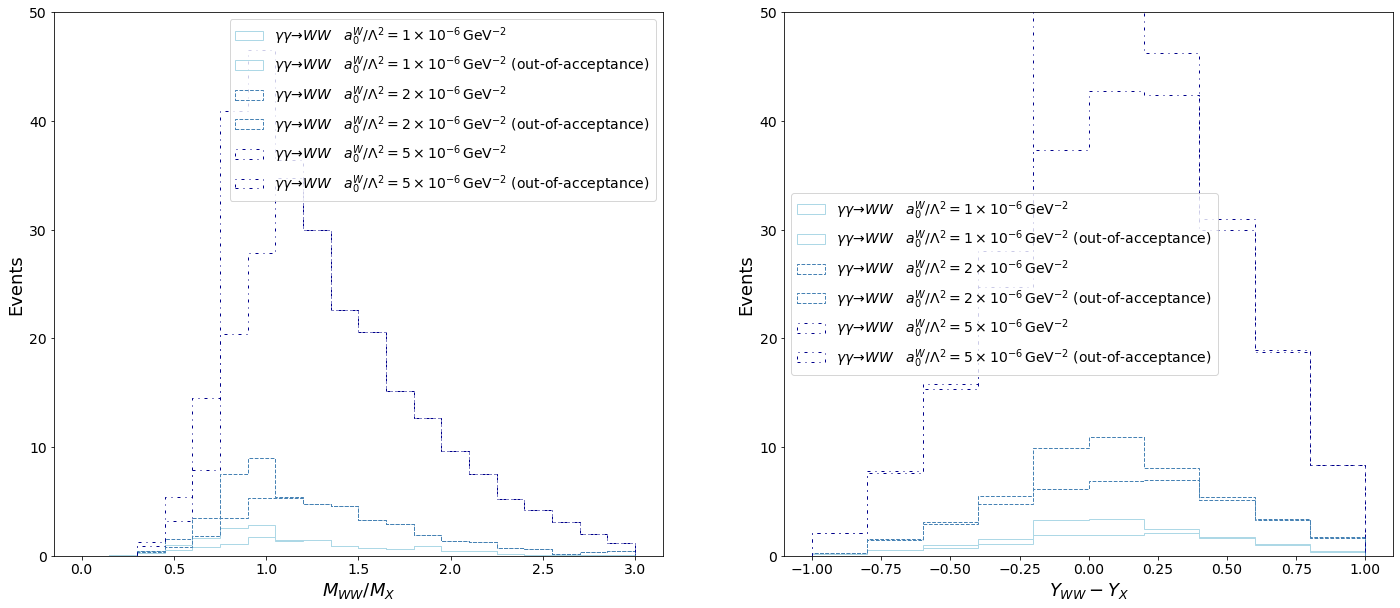

In [69]:
variation__ = "_nom"
var_str__ = {}
# var_str__[ "_nom" ] = "_nom_nom"
var_str__[ "_nom" ] = "_nom"
var_weights__ = "nom"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

bins_R_MWW_MX_ = 20
bins_Diff_YWW_YX_ = 10
for idx_, label_ in enumerate( labels_signals ):
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=bins_R_MWW_MX_, range=(0.,3.) )
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=bins_R_MWW_MX_, range=(0.,3.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=bins_Diff_YWW_YX_, range=(-1.,1.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=bins_Diff_YWW_YX_, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=14 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=14 )
    
# axes[0].set_ylim( (0.,3.) )
# axes[1].set_ylim( (0.,3.) )
axes[0].set_ylim( (0.,50.) )
axes[1].set_ylim( (0.,50.) )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.png", bbox_inches='tight' )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


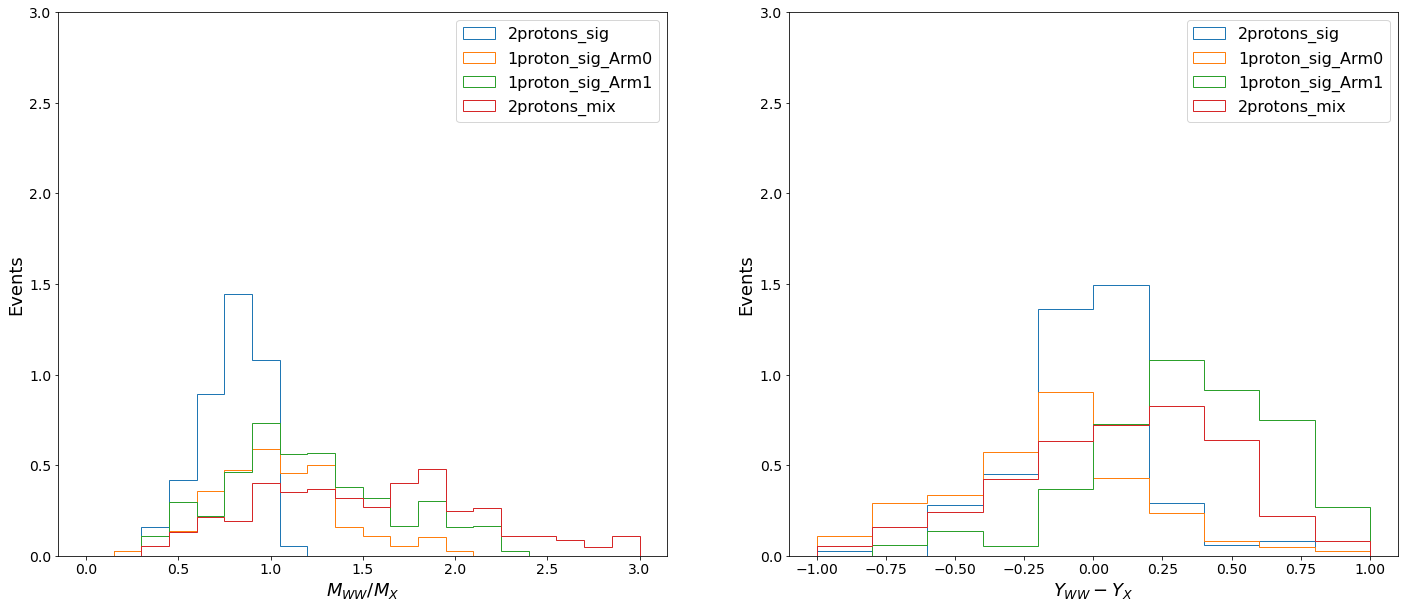

In [70]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=bins_R_MWW_MX_, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=bins_Diff_YWW_YX_, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 3. )
axes[1].set_ylim( 0., 3. )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.png", bbox_inches='tight' )

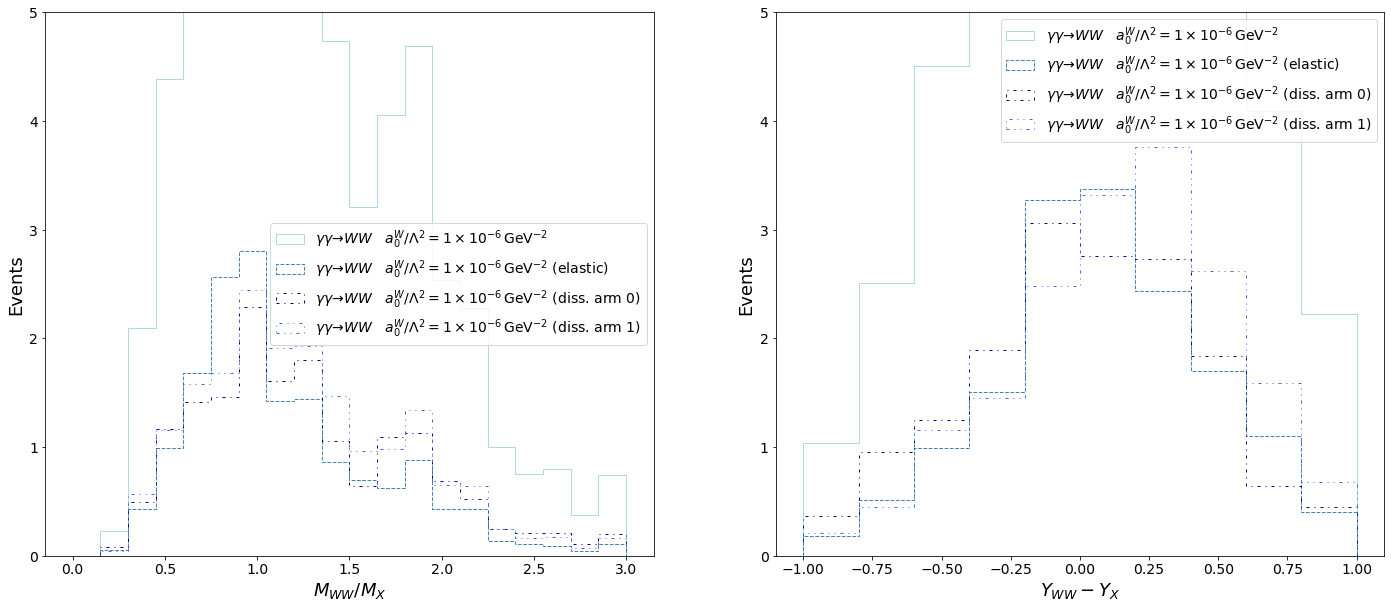

In [71]:
if run_dissociative_signal:
    variation__ = "_nom"
    var_str__ = {}
    var_str__[ "_nom" ] = "_nom"
    var_weights__ = "nom"

    fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

    colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

    linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]
    
    idx_ = 0
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_All_selected_events[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_All[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
                  bins=bins_R_MWW_MX_, range=(0.,3.) )
    idx_ = 1
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (elastic)" ),
                  bins=bins_R_MWW_MX_, range=(0.,3.) )
    idx_ = 2
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_Arm0_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (diss. arm 0)" ),
                  bins=bins_R_MWW_MX_, range=(0.,3.) )
    idx_ = 3
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_Arm1_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (diss. arm 1)" ),
                  bins=bins_R_MWW_MX_, range=(0.,3.) )
    
    idx_ = 0
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_All_selected_events[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_All[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
                  bins=bins_Diff_YWW_YX_, range=(-1.,1.) )
    idx_ = 1
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (elastic)" ),
                  bins=bins_Diff_YWW_YX_, range=(-1.,1.) )
    idx_ = 2
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_Arm0_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_Arm0_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (diss. arm 0)" ),
                  bins=bins_Diff_YWW_YX_, range=(-1.,1.) )
    idx_ = 3
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_Arm1_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ],
                  weights=weights_sig_plus_mix_Arm1_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (diss. arm 1)" ),
                  bins=bins_Diff_YWW_YX_, range=(-1.,1.) )
    
    axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
    axes[0].set_ylabel( "Events", fontsize=18 )
    axes[0].legend( loc='best', fontsize=14 )
    axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
    axes[1].set_ylabel( "Events", fontsize=18 )
    axes[1].legend( loc='best', fontsize=14 )

    axes[0].set_ylim( (0.,5.) )
    axes[1].set_ylim( (0.,5.) )
#     axes[0].set_ylim( (0.,30.) )
#     axes[1].set_ylim( (0.,30.) )
    

GGToWW-AQGC-2018-muon-A0W1e-6
Number of events: 68.5302869893406 +/- 1.6754634754898177
Number of events (A): 44.7468504587915 +/- 1.3565977471054644
Number of events (B): 10.973056796737904 +/- 0.6626825655831836
Number of events (C): 9.516873717406819 +/- 0.6248501789723443
Number of events (D): 3.2935060164043826 +/- 0.37045172608467525
0 0
GGToWW-AQGC-2018-muon-A0W2e-6
Number of events: 222.82119374893364 +/- 3.4220919728006853
Number of events (A): 166.383098860559 +/- 2.963912628923183
Number of events (B): 20.6665381346431 +/- 1.0195491540599715
Number of events (C): 29.604938007459193 +/- 1.246916205445599
Number of events (D): 6.16661874627236 +/- 0.5758948666808029
0 1
GGToWW-AQGC-2018-muon-A0W5e-6
Number of events: 1263.0357907764296 +/- 12.990235670044507
Number of events (A): 964.6309335389693 +/- 11.357925018113287
Number of events (B): 93.85365653661346 +/- 3.483723978281274
Number of events (C): 184.6314821735323 +/- 4.988914010313256
Number of events (D): 19.9197185273

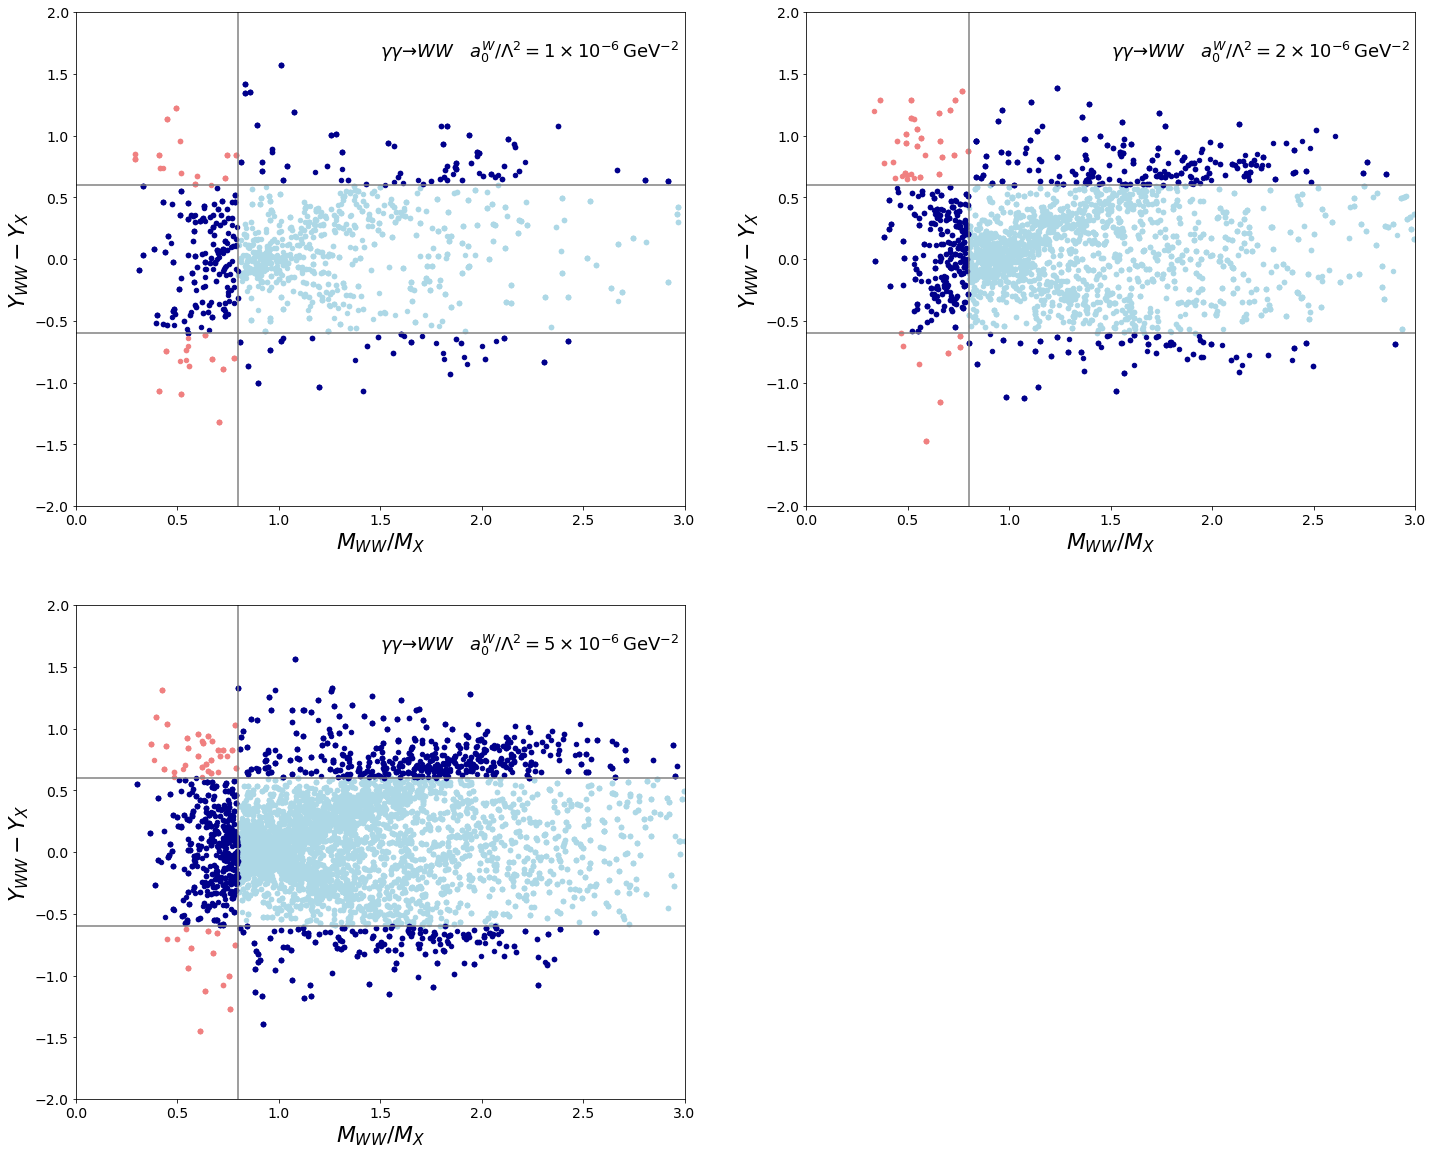

In [72]:
variation__ = "_nom"
var_weights__ = "nom"

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
#     df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
#     weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ]
    df__ = df_signals_protons_multiRP_sig_plus_mix_All_selected_events[ label_ ][ variation__ ]
    weights__ = weights_sig_plus_mix_All[ label_ ][ var_weights__ ][ variation__ ]
    var1__ = ( "R_MWW_MX" + var_str__[ "_nom" ] )
    var2__ = ( "Diff_YWW_YX" + var_str__[ "_nom" ] )
    
    msk_sig_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_sig_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( weights__ )
    err_n_events_sig = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_sig_A = np.sum( weights__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights__[ msk_sig_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    if np.sum( msk_sig_A ) > 0:
        df__[ msk_sig_A ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightblue' )
    if np.sum( msk_sig_B ) > 0:
        df__[ msk_sig_B ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_C ) > 0:
        df__[ msk_sig_C ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_D ) > 0:
        df__[ msk_sig_D ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightcoral' )
    title_str_ = labels_samples[ label_ ]
    axes[ row_, col_ ].text( 0.50, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{X}$", fontsize=22 )
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0
if col_ == 1: axes[ row_, col_ ].axis('off')
    
if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.png", bbox_inches='tight' )

### Calculate uncertainties from variations

In [73]:
from scipy.interpolate import make_interp_spline

relative_uncertainty_ = True

vars_ = {}
vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 15
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
# vars_[ "R_MWW_MX" ][ "bins" ]  = 0.6 + 0.2 * np.arange( 8 )
vars_[ "R_MWW_MX" ][ "bins" ]  = 0.2 + 0.2 * np.arange( 10 )
vars_[ "R_MWW_MX" ][ "range" ] = None
# vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.6, 2. )
vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.2, 2. )
vars_[ "R_MWW_MX" ][ "xtitle" ]  = r"$M_{WW} / M_{X}$"
vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 10
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.2 * np.arange( 11 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.4 * np.arange( 6 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -0.6 + 0.4 * np.arange( 4 )
vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.0 + 0.4 * np.arange( 6 )
vars_[ "Diff_YWW_YX" ][ "range" ] = None
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1., 1. )
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -0.60, 0.60 )
vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.0, 1.0 )
vars_[ "Diff_YWW_YX" ][ "xtitle" ]  = r"$Y_{WW} - Y_{X}$"

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,3.)
# ylim_ = (0.,5.)

color_ = "darkblue"

def plot_uncertainties_variations(df_dict, weights_dict, variables, variations, selection_dict, scale_variation, label, var_info, ylim, ylim_ratio, color, relative_uncertainty):

    __df_dict = df_dict
    __weights_dict = weights_dict
    vars_ = variables
    __variations = variations
    sel_str__ = selection_dict
#     var_weights__ = var_weights
    scale_variation_=scale_variation
    label_ = label
    vars_ = var_info
    ylim_ = ylim
    color_ = color
    relative_uncertainty_ = relative_uncertainty

    max_ = {}
    min_ = {}
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    idx_row_ = 0
    idx_col_ = 0

    fig_, axes_ = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        max_[ var__ ] = None
        min_[ var__ ] = None
        for idx_, variation__ in enumerate( __variations ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr__ = df__[ var__ + __variation__ ]
                
                arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
                arr__ = arr__.loc[ msk__ ]
                weights__ = weights__.loc[ msk__ ]
                counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

                if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
                if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
                msk__ = counts_ > max_[ var__ ]
                max_[ var__ ][ msk__ ] = counts_[ msk__ ]
                msk__ = counts_ < min_[ var__ ]
                min_[ var__ ][ msk__ ] = counts_[ msk__ ]

        print ( max_[ var__ ] )
        print ( min_[ var__ ] )
        idx_row_ = 0
        df__ = __df_dict[ label_ ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes_[idx_row_,idx_col_].hist( arr__, 
                                                           weights=weights__,
                                                           histtype='step', color=color_, linestyle="-", label="_nom",
                                                           bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes_[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        # axes_[idx_row_,idx_col_].set_ylim( -1., 1. )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( max_, min_ )

In [74]:
def calculate_uncertainties_variations(df_dict, weights_dict, variations, selection_dict, scale_variation):
    
    __df_dict = df_dict
    __weights_dict = weights_dict
    variations_ = variations
    sel_str__ = selection_dict
    scale_variation_=scale_variation
    
    sum_weights_cut = {}
    sum_weights_squared_cut = {}
    sum_weights_cut_max = {}
    sum_weights_cut_min = {}
    for label_ in labels_signals:
        print ( label_ )
        sum_weights_cut_max_ = None
        sum_weights_cut_min_ = None
        for idx_, variation__ in enumerate( variations_ ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + __variation__ ]
                arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
                sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
                if sum_weights_cut_max_ is None:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut_min_ is None:
                    sum_weights_cut_min_ = sum_weights_cut__
                if sum_weights_cut__ > sum_weights_cut_max_:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut__ < sum_weights_cut_min_:
                    sum_weights_cut_min_ = sum_weights_cut__

        df__ = __df_dict[ label_ ][ "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        weights_squared__ = ( weights__ ** 2 )
        arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
        arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
        sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
        sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
        print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
        print ( sum_weights_cut_max_ )
        print ( sum_weights_cut_min_ )
        sum_weights_cut[ label_ ] = sum_weights_cut__
        sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
        sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
        sum_weights_cut_min[ label_ ] = sum_weights_cut_min_

    print ( sum_weights_cut )
    print ( sum_weights_squared_cut )
    print ( sum_weights_cut_max )
    print ( sum_weights_cut_min )
    
    return ( sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min )

In [75]:
label_ref_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ref_ = "GGToWW-AQGC-A0W2e-6"
#         label_ref_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ref_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ref_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

#### JES

In [76]:
variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

# var_weights__ = "nom"

In [77]:
# df_signals_protons_multiRP_sig_plus_mix_All_selected_events
# weights_sig_plus_mix_All
if plot_separate_syst_uncertainties:

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
#         df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#         weights_dict=weights_sig_plus_mix_categories_concat,
        df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
        weights_dict=weights_sig_plus_mix_All,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [78]:
max_variations = {}
min_variations = {}
if plot_separate_syst_uncertainties:
    max_variations[ "jes" ] = max_
    min_variations[ "jes" ] = min_
    print ( max_variations )
    print ( min_variations )

In [79]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
44.7468504587915 ± 1.3565977471054644
44.90925568402574
44.27444562222521
GGToWW-AQGC-2018-muon-A0W2e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
166.383098860559 ± 2.963912628923183
167.5423455275747
164.5646328296171
GGToWW-AQGC-2018-muon-A0W5e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
964.6309335389693 ± 11.357925018113287
970.6825470029737
961.0388843117955
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.90925568402574, 'GGToWW-AQGC-2018-muon-A0W2e-6': 167.5423455275747, 'GGToWW-AQGC-2018-muon-A0W5e-6': 970.6825470029737}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.27444562222521, 'GGToWW-AQGC-2018-muon-A0W2e-6': 164.56463282

In [80]:
sum_weights = {}
for label_ in labels_signals:
    sum_weights[ label_ ] = {}
    sum_weights[ label_ ][ "central" ]        = sum_weights_cut[ label_ ]
    sum_weights[ label_ ][ "stat" ]           = np.sqrt( sum_weights_squared_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_up_jes" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jes" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 964.6309335389693, 'stat': 11.357925018113287, 'syst_up_jes': 6.05161346400439, 'syst_dw_jes': -3.5920492271737885}}


#### JER

In [81]:
variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

In [82]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
#         df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#         weights_dict=weights_sig_plus_mix_categories_concat,
        df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
        weights_dict=weights_sig_plus_mix_All,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [83]:
if plot_separate_syst_uncertainties:
    max_variations[ "jer" ] = max_
    min_variations[ "jer" ] = min_
    print ( max_variations )
    print ( min_variations )

In [84]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
44.7468504587915 ± 1.3565977471054644
44.90925568402574
44.720741993864735
GGToWW-AQGC-2018-muon-A0W2e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
166.383098860559 ± 2.963912628923183
166.75226404918362
166.06580552437532
GGToWW-AQGC-2018-muon-A0W5e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
964.6309335389693 ± 11.357925018113287
965.9495785118636
962.4957096790456
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.90925568402574, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.75226404918362, 'GGToWW-AQGC-2018-muon-A0W5e-6': 965.9495785118636}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.720741993864735, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.065

In [85]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_jer" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jer" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916, 'syst_up_jer': 0.36916518862463477, 'syst_dw_jer': -0.31729333618366695}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 964.6309335389693, 'stat': 11.357925018113287, 'syst_up_jes': 6.05161346400439, 'syst_dw_jes': -3.5920492271737885, 'syst_up_jer': 1.3186449728942762, 'syst_dw_jer': -2.1352238599237126}}


#### Lepton Id

In [86]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

In [87]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
#         df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#         weights_dict=weights_sig_plus_mix_categories_concat,
        df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
        weights_dict=weights_sig_plus_mix_All,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [88]:
if plot_separate_syst_uncertainties:
    if lepton_type == 'muon':
        max_variations[ "sf_muon_id" ] = max_
        min_variations[ "sf_muon_id" ] = min_
    elif lepton_type == 'electron':
        max_variations[ "sf_electron_id" ] = max_
        min_variations[ "sf_electron_id" ] = min_
    print ( max_variations )
    print ( min_variations )

In [89]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
44.7468504587915 ± 1.3565977471054644
44.76933624785978
44.72436466972323
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
166.383098860559 ± 2.963912628923183
166.46503998658505
166.30115773453292
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
964.6309335389693 ± 11.357925018113287
965.0897598249394
964.1721072529992
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.76933624785978, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.46503998658505, 'GGToWW-AQGC-2018-muon-A0W5e-6': 965.0897598249394}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.72436466972323, 'GGToWW-AQGC-2018-

In [90]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916, 'syst_up_jer': 0.36916518862463477, 'syst_dw_jer': -0.31729333618366695, 'syst_up_sf_muon_id': 0.08194112602606651, 'syst_dw_sf_muon_id': -0.08194112602606651}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 964.6309335389693, 'stat': 11.357925018113287, 'syst_up_jes': 6.05161346400439, 'syst_dw_jes': -3.5920492271737885, 'syst_up_jer': 1.3186449728942762, 'syst_dw_jer': -2.1352238599237126, 'syst_up_sf_muon_id': 0.45882628597007624, 'syst_dw_sf_muon_id': -0.45882628597007624}}


#### Trigger

In [91]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

In [92]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
44.7468504587915 ± 1.3565977471054644
44.83669625718934
44.65700466039366
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
166.383098860559 ± 2.963912628923183
166.7206291595782
166.04556856153977
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
964.6309335389693 ± 11.357925018113287
966.5759013081979
962.6859657697408
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.83669625718934, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.7206291595782, 'GGToWW-AQGC-2018-muon-A0W5e-6': 966.5759013081979}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.657004

In [93]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916, 'syst_up_jer': 0.36916518862463477, 'syst_dw_jer': -0.31729333618366695, 'syst_up_sf_muon_id': 0.08194112602606651, 'syst_dw_sf_muon_id': -0.08194112602606651, 'syst_up_sf_muon_trigger': 0.33753029901922105, 'syst_dw_sf_muon_trigger': -0.33753029901922105}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 964.6309335389693, 'stat': 11.357925018113287, 'syst_up_jes': 6.05161346400439, 'syst_dw_jes': -3.5920492271737885

#### Prefiring

In [94]:
variations_weights_ = []
variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]

In [95]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
44.7468504587915 ± 1.3565977471054644
44.788054038845786
44.70564687873721
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
166.383098860559 ± 2.963912628923183
166.45084945094507
166.31535511702702
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
964.6309335389693 ± 11.357925018113287
965.356999764792
963.9048673131468
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.788054038845786, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.45084945094507, 'GGToWW-AQGC-2018-muon-A0W5e-6': 965.356999764792}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.70564687873721, 'GGToW

In [96]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_sf_prefiring" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_sf_prefiring" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389, 'syst_up_sf_prefiring': 0.041203580054286704, 'syst_dw_sf_prefiring': -0.041203580054286704}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916, 'syst_up_jer': 0.36916518862463477, 'syst_dw_jer': -0.31729333618366695, 'syst_up_sf_muon_id': 0.08194112602606651, 'syst_dw_sf_muon_id': -0.08194112602606651, 'syst_up_sf_muon_trigger': 0.33753029901922105, 'syst_dw_sf_muon_trigger': -0.33753029901922105, 'syst_up_sf_prefiring': 0.06775059038608333, 'syst_dw_sf_prefiring'

#### Proton momentum scale

In [97]:
labels_xi_ = [ "_nom", "_p100", "_m100" ]
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    # vars_ = {}
    # vars_[ "R_MWW_MX" ] = {}
    # vars_[ "R_MWW_MX" ][ "bins" ]  = 30
    # vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
    # vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
    # # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
    # # vars_[ "R_MWW_MX" ][ "range" ] = None
    # # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
    # vars_[ "Diff_YWW_YX" ] = {}
    # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
    # vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
    # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
    # # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
    # # vars_[ "Diff_YWW_YX" ][ "range" ] = None
    # # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

    # ylim_ = (0.,0.2)
    # ylim_ = (0.,0.5)
    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    # ylim_ = (0.,3.)
    # ylim_ = (0.,5.)
    ylim_ratio_ = (-0.50,0.50)

    color_ = "darkblue"

    relative_uncertainty_ = True

    max_, min_ = plot_uncertainties_variations(
#         df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#         weights_dict=weights_sig_plus_mix_categories_concat,
        df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
        weights_dict=weights_sig_plus_mix_All,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_ = {}
    min_var_xi_ = {}
    max_var_xi_["arm0"] = max_
    min_var_xi_["arm0"] = min_

In [98]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm0" ] = max_
    min_variations[ "proton_scale_arm0" ] = min_
    print ( max_variations )
    print ( min_variations )

In [99]:
variations_ = []

for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    max_, min_ = plot_uncertainties_variations(
#         df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#         weights_dict=weights_sig_plus_mix_categories_concat,
        df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
        weights_dict=weights_sig_plus_mix_All,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_["arm1"] = max_
    min_var_xi_["arm1"] = min_

In [100]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm1" ] = max_
    min_variations[ "proton_scale_arm1" ] = min_
    print ( max_variations )
    print ( min_variations )

In [101]:
if plot_separate_syst_uncertainties:
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
#         df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
#         weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        df__ = df_signals_protons_multiRP_sig_plus_mix_All_selected_events[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_All[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes[idx_row_,idx_col_].hist( arr__,
                                                          weights=weights__,
                                                          histtype='step', color=color_, linestyle="-", label="_nom",
                                                          bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        __max__ = ( counts_ +
                    np.sqrt( ( max_var_xi_[ "arm0" ][ var__ ] - counts_ ) ** 2 +
                             ( max_var_xi_[ "arm1" ][ var__ ] - counts_ ) ** 2 ) )
        __min__ = ( counts_ -
                    np.sqrt( ( counts_ - min_var_xi_[ "arm0" ][ var__ ] ) ** 2 +
                             ( counts_ - min_var_xi_[ "arm1" ][ var__ ] ) ** 2 ) )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

In [102]:
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_p100_nom', '_m100_nom']
{'_nom_nom': '_nom', '_p100_nom': '_nom', '_m100_nom': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
44.7468504587915 ± 1.3565977471054644
45.43741544713225
44.27055911995417
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
166.383098860559 ± 2.963912628923183
167.79156837064292
164.22259353592113
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
964.6309335389693 ± 11.357925018113287
971.303037548026
953.2018720123812
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 45.43741544713225, 'GGToWW-AQGC-2018-muon-A0W2e-6': 167.79156837064292

In [103]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389, 'syst_up_sf_prefiring': 0.041203580054286704, 'syst_dw_sf_prefiring': -0.041203580054286704, 'syst_up_proton_scale_arm0': 0.6905649883407534, 'syst_dw_proton_scale_arm0': -0.47629133883732777}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916, 'syst_up_jer': 0.36916518862463477, 'syst_dw_jer': -0.31729333618366695, 'syst_up_sf_muon_id': 0.08194112602606651, 'syst_dw_sf_muon_id': -0.08194112602606651, 'syst_up_sf_muon_trigger': 0.33753029901922105, 'syst_dw_sf_muon

In [104]:
variations_ = []
for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_nom_p100', '_nom_m100']
{'_nom_nom': '_nom', '_nom_p100': '_nom', '_nom_m100': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
44.7468504587915 ± 1.3565977471054644
45.442543936098495
44.33000615672488
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
166.383098860559 ± 2.963912628923183
168.44503441923933
163.96685566745919
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
964.6309335389693 ± 11.357925018113287
973.832793322056
952.5263177393323
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 45.442543936098495, 'GGToWW-AQGC-2018-muon-A0W2e-6': 168.445034419239

In [105]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389, 'syst_up_sf_prefiring': 0.041203580054286704, 'syst_dw_sf_prefiring': -0.041203580054286704, 'syst_up_proton_scale_arm0': 0.6905649883407534, 'syst_dw_proton_scale_arm0': -0.47629133883732777, 'syst_up_proton_scale_arm1': 0.695693477306996, 'syst_dw_proton_scale_arm1': -0.4168443020666217}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916, 'syst_up_jer': 0.36916518862463477, 'syst_dw_jer': -0.31729333618366695, 'syst_up_sf_muon_id': 0.08194112602606651, 'syst_dw_s

In [106]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ] ** 2 )
    sum_weights[ label_ ][ "syst_dw_proton_scale" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ] ** 2 )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389, 'syst_up_sf_prefiring': 0.041203580054286704, 'syst_dw_sf_prefiring': -0.041203580054286704, 'syst_up_proton_scale_arm0': 0.6905649883407534, 'syst_dw_proton_scale_arm0': -0.47629133883732777, 'syst_up_proton_scale_arm1': 0.695693477306996, 'syst_dw_proton_scale_arm1': -0.4168443020666217, 'syst_up_proton_scale': 0.9802394694611948, 'syst_dw_proton_scale': -0.6329396587486544}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159246667015708, 'syst_dw_jes': -1.8184660309418916, 'syst_up_jer': 0.36916518862463477, '

#### Proton efficiency

In [107]:
variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

In [108]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
#         df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#         weights_dict=weights_sig_plus_mix_categories_concat,
        df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
        weights_dict=weights_sig_plus_mix_All,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [109]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_eff" ] = max_
    min_variations[ "proton_eff" ] = min_
    print ( max_variations )
    print ( min_variations )

In [110]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
44.7468504587915 ± 1.3565977471054644
45.0725641881868
44.421136729396196
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
166.383098860559 ± 2.963912628923183
167.54403016099755
165.22216756012045
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
964.6309335389693 ± 11.357925018113287
970.9823704702058
958.2794966077329
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.7468504587915, 'GGToWW-AQGC-2018-muon-A0W2e-6': 166.383098860559, 'GGToWW-AQGC-2018-muon-A0W5e-6': 964.6309335389693}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 1.8403574474516218, 'GGToWW-AQGC-2018-muon-A0W2e-6': 8.784778071890333, 'GGToWW-AQGC-2018-muon-A0W5e-6': 129.0024607170837}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 45.0725641881868, 'GGToWW-AQGC-2018-muon-A0W2e-6': 167.54403016099755, 'GGToWW-AQGC-2018-muon-A0W5e-6': 970.9823704702058}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 44.421136729396196, 'GGToWW-AQGC-2018-

In [111]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_eff" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_eff" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389, 'syst_up_sf_prefiring': 0.041203580054286704, 'syst_dw_sf_prefiring': -0.041203580054286704, 'syst_up_proton_scale_arm0': 0.6905649883407534, 'syst_dw_proton_scale_arm0': -0.47629133883732777, 'syst_up_proton_scale_arm1': 0.695693477306996, 'syst_dw_proton_scale_arm1': -0.4168443020666217, 'syst_up_proton_scale': 0.9802394694611948, 'syst_dw_proton_scale': -0.6329396587486544, 'syst_up_proton_eff': 0.32571372939530363, 'syst_dw_proton_eff': -0.32571372939530363}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 166.383098860559, 'stat': 2.963912628923183, 'syst_up_jes': 1.159

In [112]:
if plot_separate_syst_uncertainties:
    color_ = "darkblue"

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.50,0.50)

    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
#         df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
#         weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        df__ = df_signals_protons_multiRP_sig_plus_mix_All_selected_events[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_All[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ), bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    #     axes[idx_row_,idx_col_].errorbar( bin_centers_, sum_w_, yerr=np.sqrt( sum_w2_ ),
    #                                       color=color_, fmt='o', label="_nom" )

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    #     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 100 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_err_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_err_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

### Total uncertainties

In [113]:
def plot_total_systematic( df_dict, weights_dict, lepton_type, label, ylim, ylim_ratio, color ):

    lepton_type_ = lepton_type
    label_ = label
    ylim_ = ylim
    ylim_ratio_ = ylim_ratio
    color_ = color
    
    # JES
    variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    relative_uncertainty_ = True

    __max_variations = {}
    __min_variations = {}
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)
    
    __max_variations[ "jes" ] = max_
    __min_variations[ "jes" ] = min_
    
    # JER
    variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "jer" ] = max_
    __min_variations[ "jer" ] = min_
    
    # Lepton Id
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    __max_variations[ variation_name_lepton_id_ ] = max_
    __min_variations[ variation_name_lepton_id_ ] = min_

    # Trigger
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_trigger_ = ""
    if lepton_type == 'muon': variation_name_trigger_ =  "sf_muon_trigger"
    elif lepton_type == 'electron': variation_name_trigger_ =  "sf_electron_trigger"

    __max_variations[ variation_name_trigger_ ] = max_
    __min_variations[ variation_name_trigger_ ] = min_
    
    # Prefiring
    variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "sf_prefiring" ] = max_
    __min_variations[ "sf_prefiring" ] = min_

    # Proton momentum scale
    labels_xi_ = [ "_nom", "_p100", "_m100" ]
    variations_ = []
    for label0_ in labels_xi_:
        for label1_ in [ "_nom" ]:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm0" ] = max_
    __min_variations[ "proton_scale_arm0" ] = min_

    variations_ = []
    for label0_ in [ "_nom" ]:
        for label1_ in labels_xi_:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm1" ] = max_
    __min_variations[ "proton_scale_arm1" ] = min_

    # Proton efficiency
    variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_eff" ] = max_
    __min_variations[ "proton_eff" ] = min_

    print ( __max_variations )
    print ( __min_variations )
    
    # Total uncertainties
    
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    counts__ = {}
    err__ = {}
    bins__ = {}
    max_variations_total__ = {}
    min_variations_total__ = {}
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_dict[ label_ ][ "_nom" ]
        weights__ = weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                    bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( __max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_trigger_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "sf_prefiring" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - __min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_trigger_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "sf_prefiring" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )
        counts__[ var__ ] = sum_w_
        err__[ var__ ] = np.sqrt( sum_w2_ )
        bins__[ var__ ] = bins_
        max_variations_total__[ var__ ] = __max__
        min_variations_total__[ var__ ] = __min__
        
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        
        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( counts__, err__, bins__, max_variations_total__, min_variations_total__ )

In [114]:
counts = {}
err = {}
bins = {}
max_variations_total = {}
min_variations_total = {}

In [115]:
# if data_sample == '2018':
#     # ylim_ = (0.,0.3)
#     ylim_ = (0.,20.)
#     ylim_ratio_ = (-0.50,0.50)
#     color_ = "darkblue"

#     counts = {}
#     err = {}
#     bins = {}
#     max_variations_total = {}
#     min_variations_total = {}

#     label_ = ""
#     coupling_str_ = "A0W1e-6"
#     if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
#     elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

#     counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
# #         df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
# #         weights_dict=weights_sig_plus_mix_categories_concat,
#         df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
#         weights_dict=weights_sig_plus_mix_All,
#         lepton_type=lepton_type,
#         label=label_,
#         ylim=ylim_,
#         ylim_ratio=ylim_ratio_,
#         color=color_
#         )

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 0.7266866   4.03014315  6.24584191 10.24723778  7.89037131  8.27771961
  3.98277034  4.44318116  3.31204638]
[ 0.57268713  3.8758795   6.24297842 10.11894403  7.7569031   8.27771961
  3.94199391  4.44318116  3.31204638]
0      1.527788e-16
1     -2.645074e-04
2     -4.275609e-04
3     -5.316552e-04
4     -5.983046e-04
           ...     
195   -1.177180e-03
196   -9.481879e-04
197   -6.788373e-04
198   -3.645970e-04
199    0.000000e+00
Length: 200, dtype: float64 0.0032888901640303714
0     -0.211920
1     -0.177264
2     -0.153682
3     -0.136492
4     -0.123322
         ...   
195    0.000114
196    0.000092
197    0.000066
198    0.000035
199    0.000000
Length: 200, dtype: float64 -0.014232492424188267
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 0.         10.75758671 24.18447103 20.84151094  0.        ]
[ 0.         10.35968011 23.91879909 20.81587014  0.        ]
0           NaN
1     -0.04

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[ 0.72704184  4.03271785  6.21937461 10.12377029  7.89419383  8.28173831
  3.94382779  4.44619301  3.31342658]
[ 0.72633136  4.02756846  6.21307948 10.11411777  7.8865488   8.2737009
  3.94016003  4.44016931  3.31066618]
0      0.000489
1      0.000545
2      0.000581
3      0.000606
4      0.000624
         ...   
195    0.000518
196    0.000496
197    0.000472
198    0.000446
199    0.000417
Length: 200, dtype: float64 0.0005403253086743523
0     -0.000489
1     -0.000545
2     -0.000581
3     -0.000606
4     -0.000624
         ...   
195   -0.000518
196   -0.000496
197   -0.000472
198   -0.000446
199   -0.000417
Length: 200, dtype: float64 -0.0005403253086709718
Diff_YWW_YX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[ 0.         10.85629649 23.96232395 20.9298501   0.        ]
[ 0.         10.84491848 23.9379438  20.90848169  0.        ]
0           NaN
1      0.000555
2      0.000554
3      

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


Diff_YWW_YX
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
[ 0.         10.87359504 23.99580315 20.96132985  0.        ]
[ 0.         10.82761993 23.9044646  20.87700194  0.        ]
0           NaN
1      0.002569
2      0.002556
3      0.002545
4      0.002533
         ...   
195    0.002086
196    0.002087
197    0.002088
198    0.002089
199         NaN
Length: 200, dtype: float64 0.0020784307887442683
0           NaN
1     -0.002569
2     -0.002556
3     -0.002545
4     -0.002533
         ...   
195   -0.002086
196   -0.002087
197   -0.002088
198   -0.002089
199         NaN
Length: 200, dtype: float64 -0.002078430788739642
GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
[ 0.72732267  4.03383918  6.22221864 10.12880896  7.89788735  8.2853776
  3.94558684  4.44707984  3.31491247]
[ 0.72605052  4.02644713  6.21023544 10.10907911  7.88285527  8.27006162
  3.93840099  4.43928247  3.3091803 ]
0      0.000875
1      0.000878
2      0.0

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[ 0.7266866   4.12380534  6.48857025 10.17384473  8.08790875  8.53605938
  4.18119108  4.44318116  3.42592056]
[ 0.7266866   3.82680381  5.92376123 10.00658295  7.70283322  8.07376625
  3.90484747  4.41547848  3.23719491]
0      0.000000
1      0.000066
2      0.000404
3      0.000905
4      0.001516
         ...   
195    0.017506
196    0.021033
197    0.024985
198    0.029413
199    0.034382
Length: 200, dtype: float64 0.02417028329200591
0      0.000000
1     -0.010648
2     -0.017857
3     -0.023079
4     -0.027051
         ...   
195   -0.017647
196   -0.018727
197   -0.019903
198   -0.021189
199   -0.022600
Length: 200, dtype: float64 -0.02429636937755511
Diff_YWW_YX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[ 0.         11.38346691 24.13449754 21.0358807   0.        ]
[ 0.         10.74428884 23.39537953 20.83077487  0.        ]
0           NaN
1      0.129643
2      0.1

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


0           NaN
1     -0.038454
2     -0.037388
3     -0.036336
4     -0.035298
         ...   
195    0.010254
196    0.010188
197    0.010123
198    0.010059
199         NaN
Length: 200, dtype: float64 0.006677667500386874
0           NaN
1     -0.047062
2     -0.046439
3     -0.045824
4     -0.045217
         ...   
195   -0.009746
196   -0.009739
197   -0.009733
198   -0.009727
199         NaN
Length: 200, dtype: float64 -0.01790475361368625
GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[ 0.72818127  4.05658198  6.2936462  10.26172541  7.97444754  8.33849784
  3.96564096  4.45312592  3.31509008]
[0.72519193 4.00370433 6.13880788 9.97616266 7.80629509 8.21694137
 3.91834687 4.43323639 3.30900268]
0      0.002057
1      0.002290
2      0.002491
3      0.002675
4      0.002849
         ...   
195    0.001078
196    0.001037
197    0.000998
198    0.000958
199    0.000919
Length: 200, dtype: float64 0.007618912936464494
0     -0.002057
1     -0.

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/4126348709.py:321: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/4126348709.py:322: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


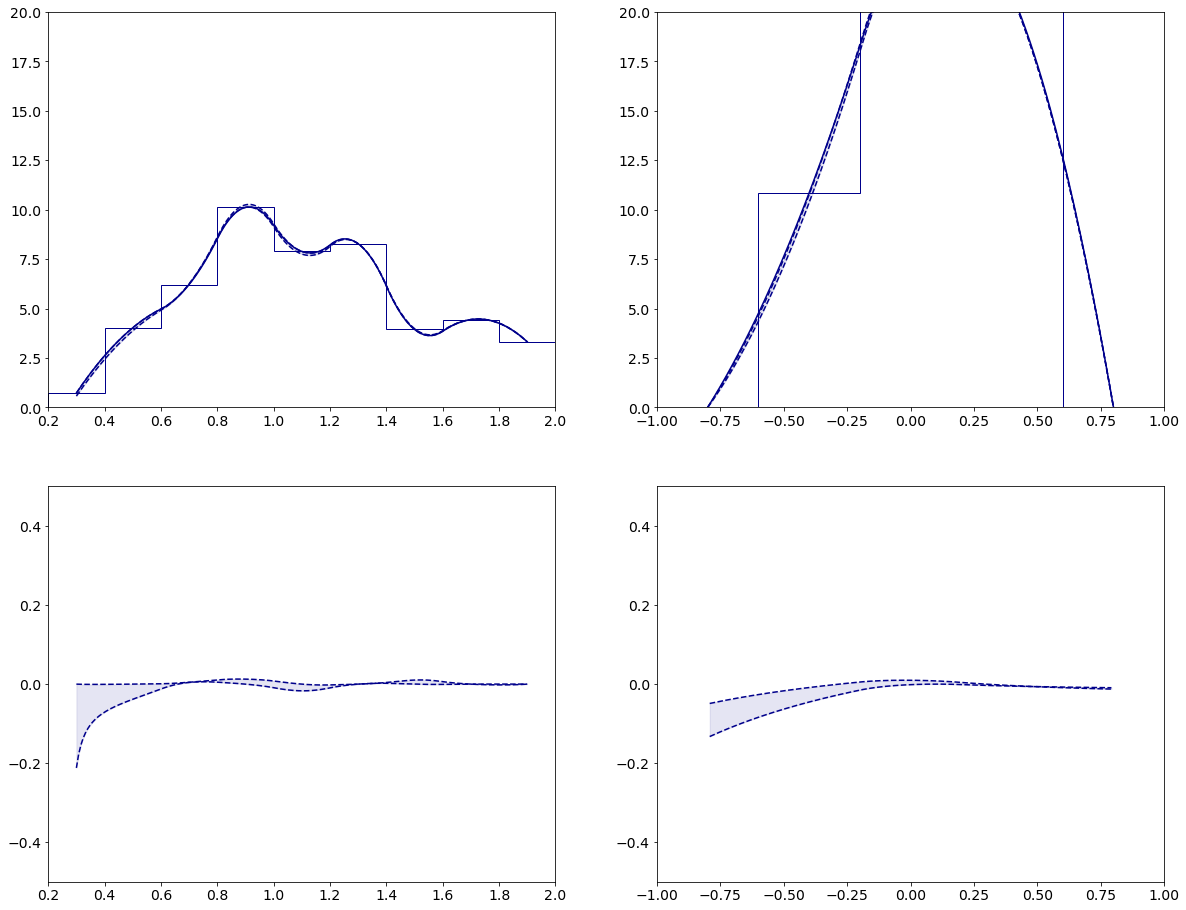

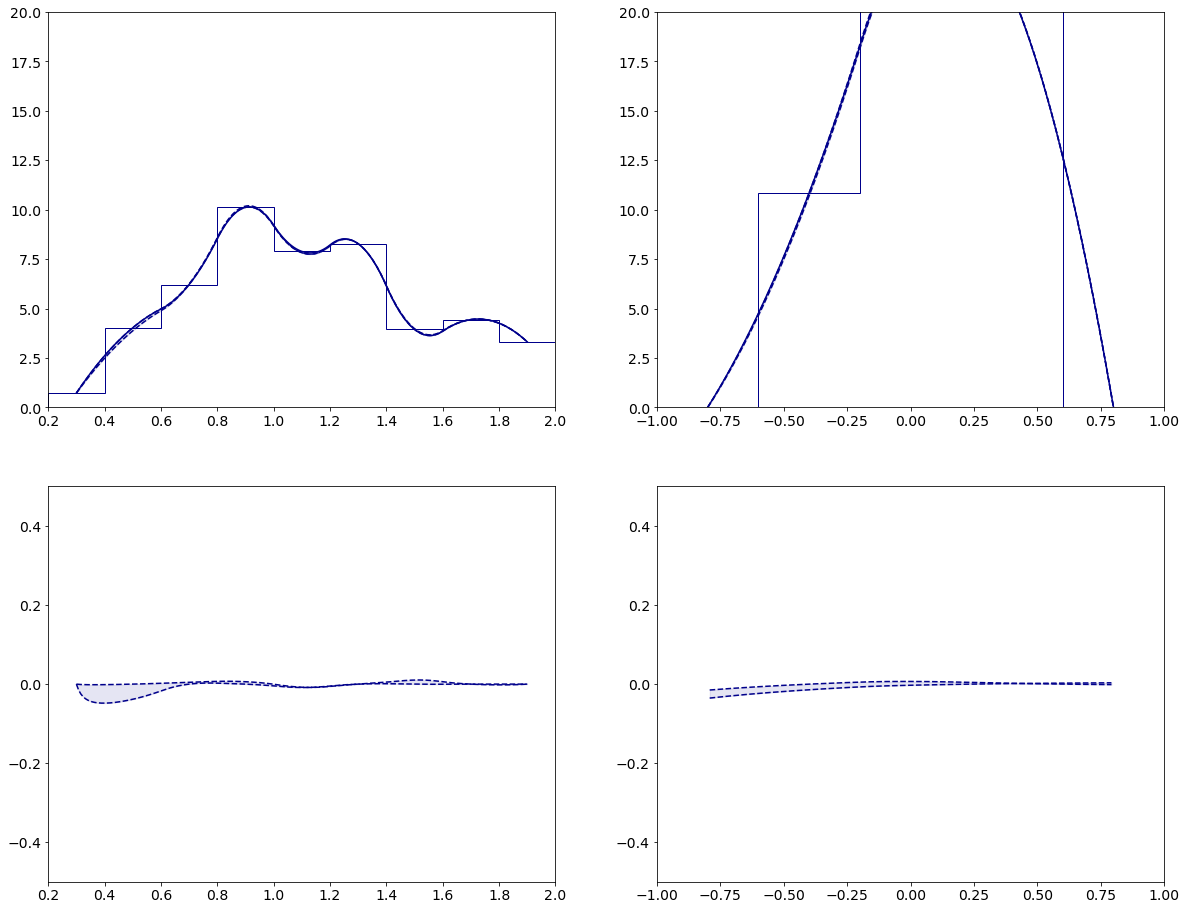

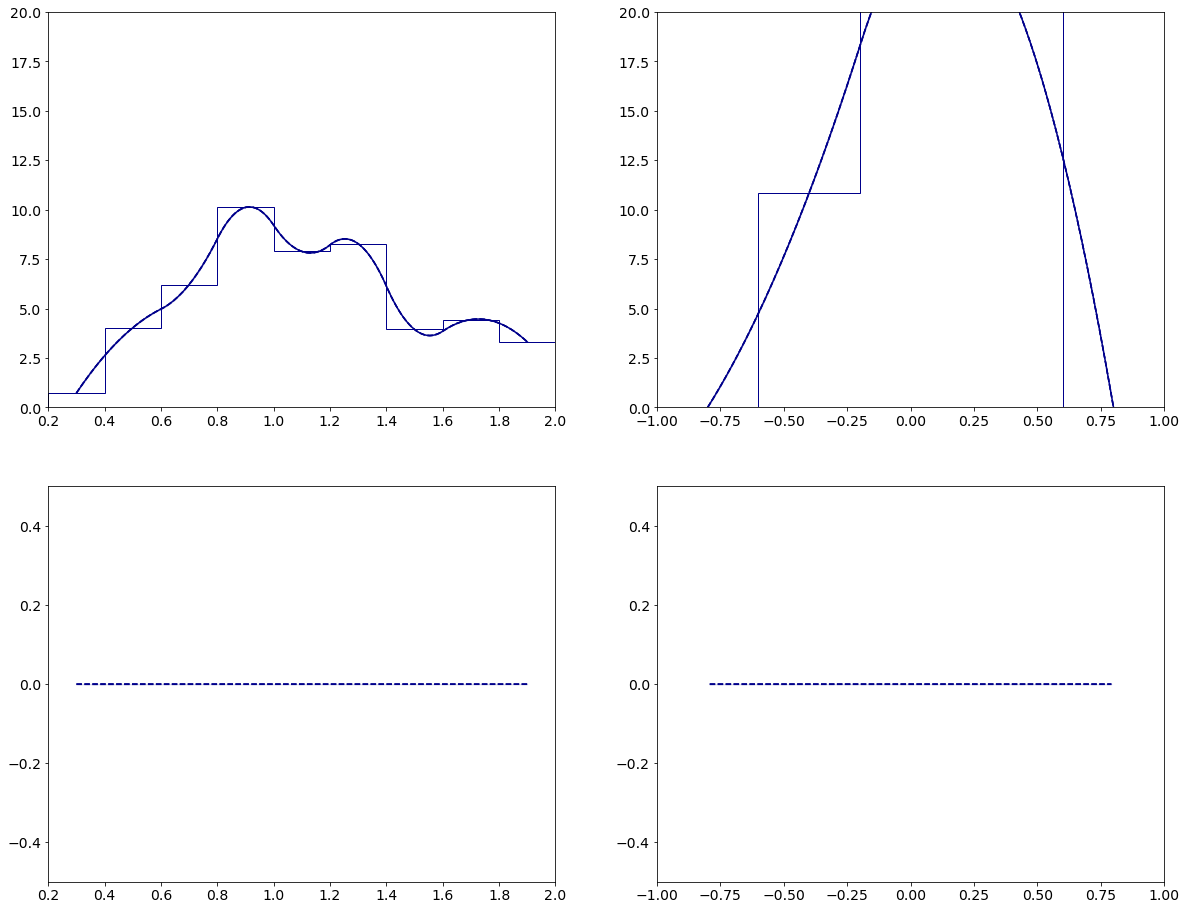

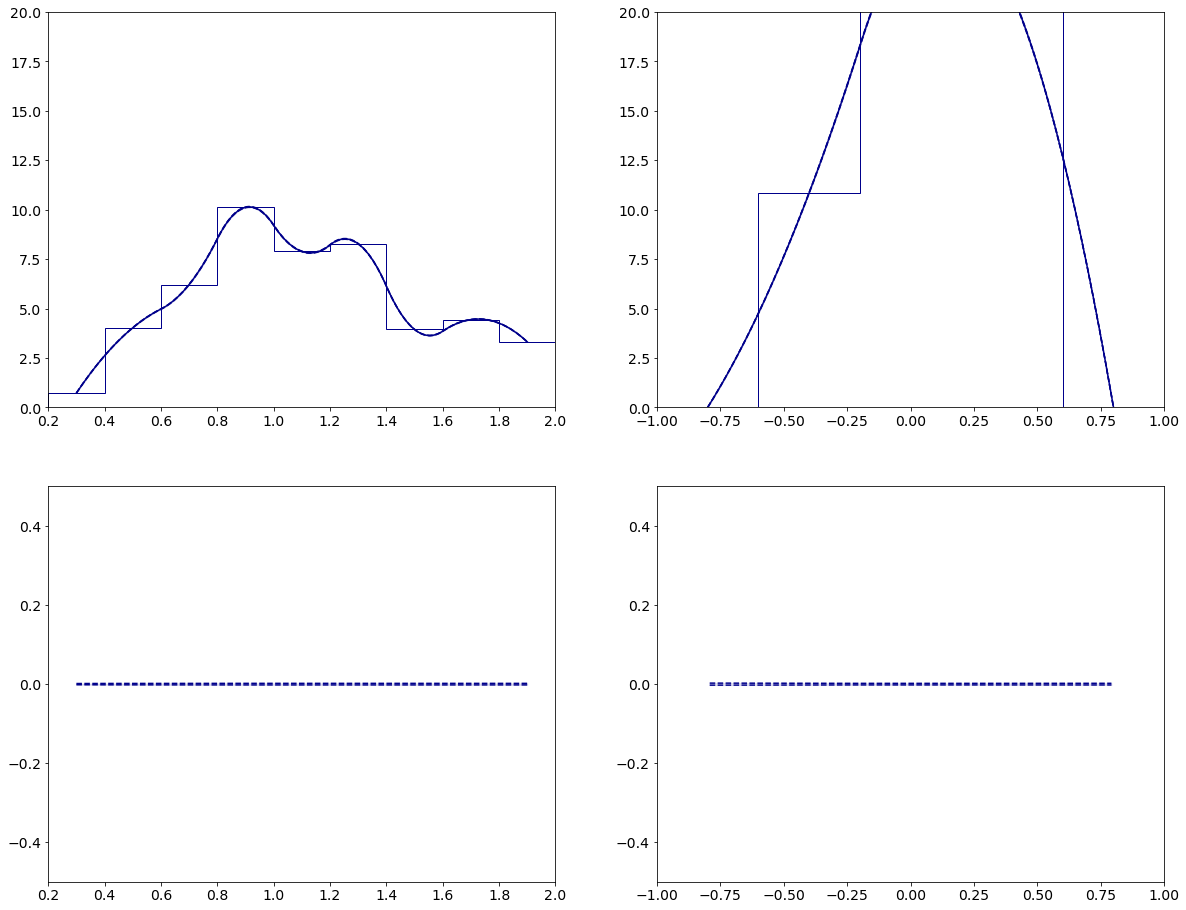

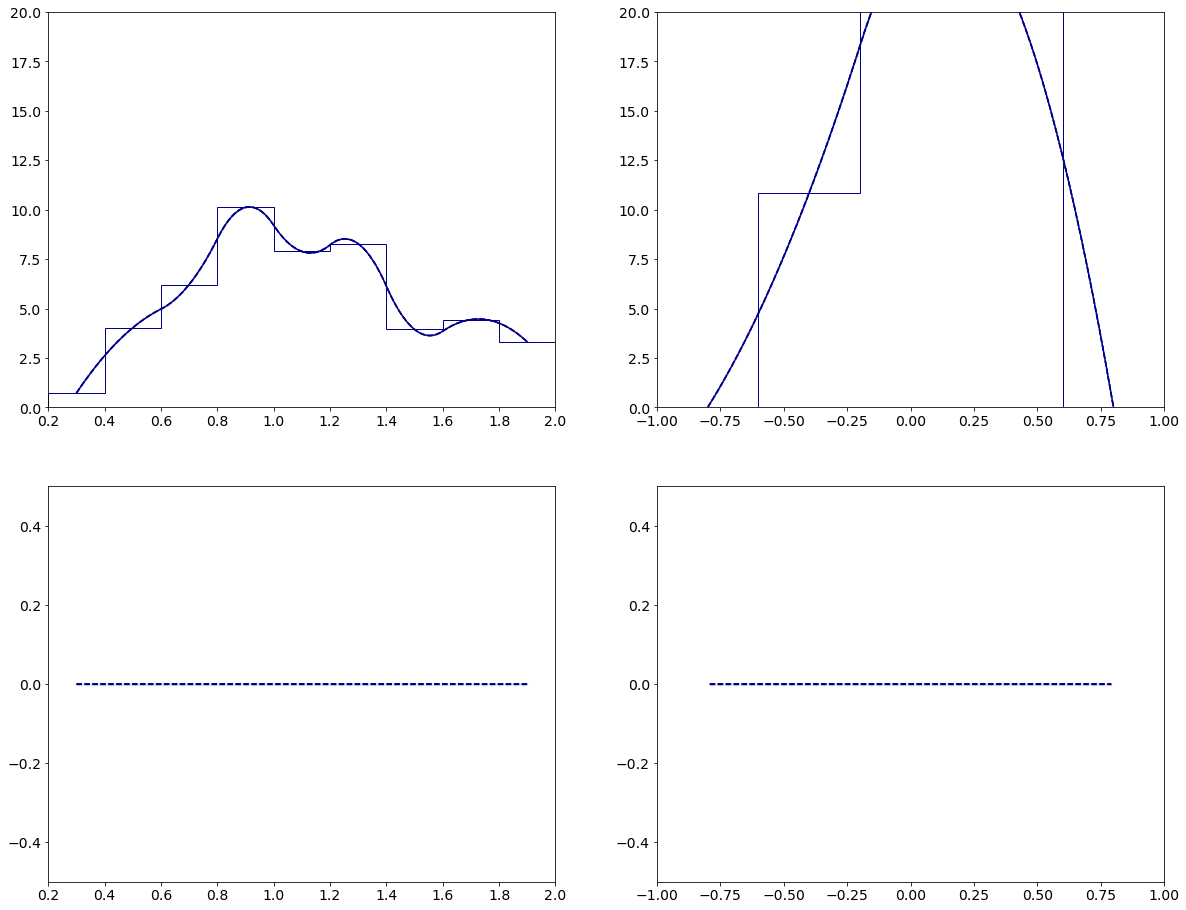

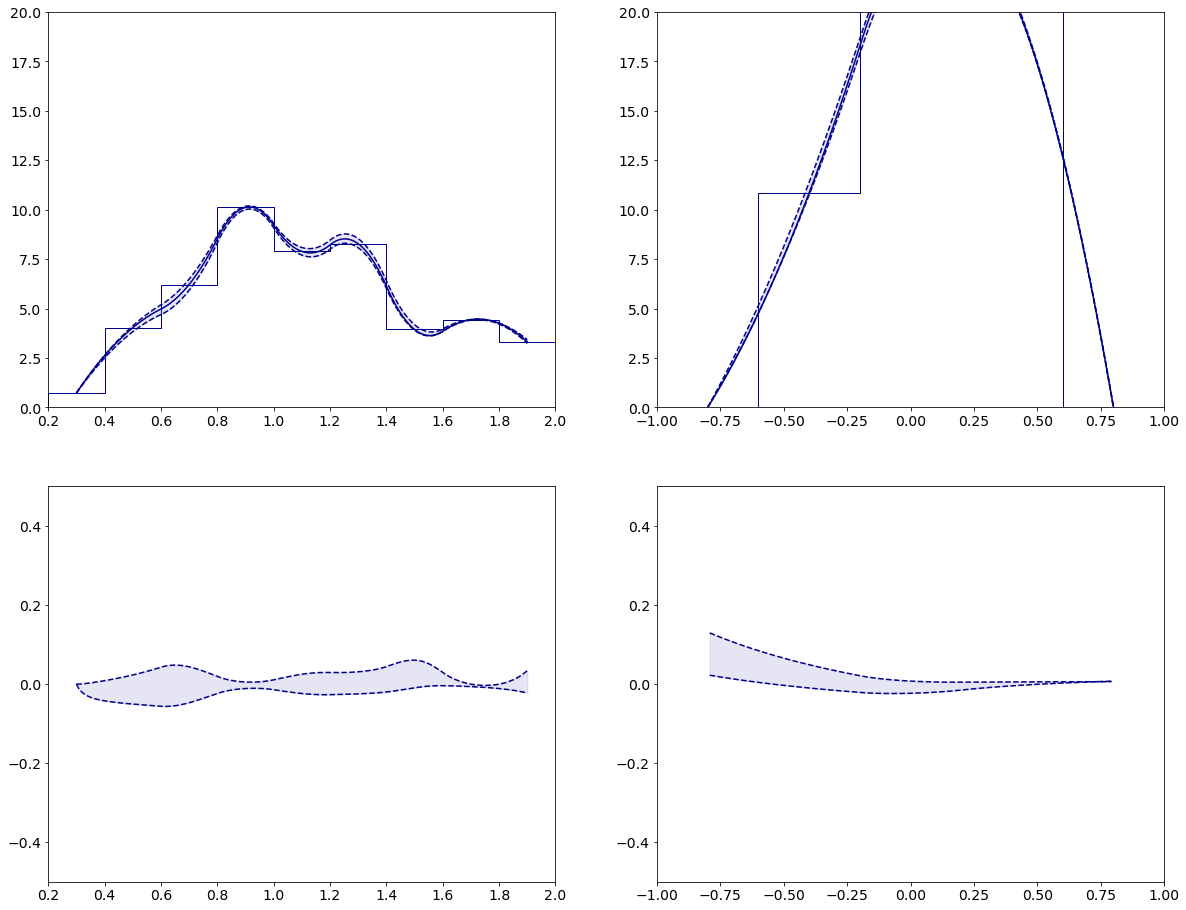

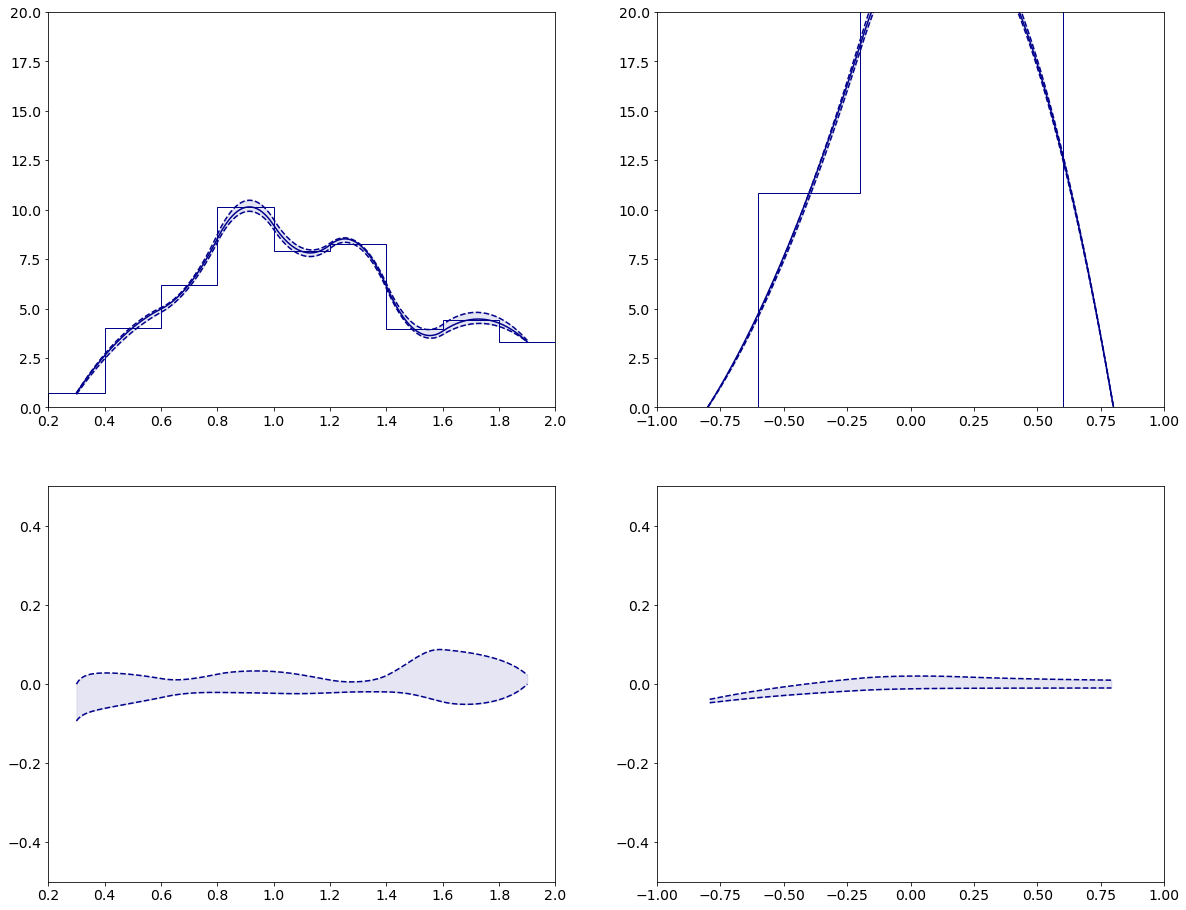

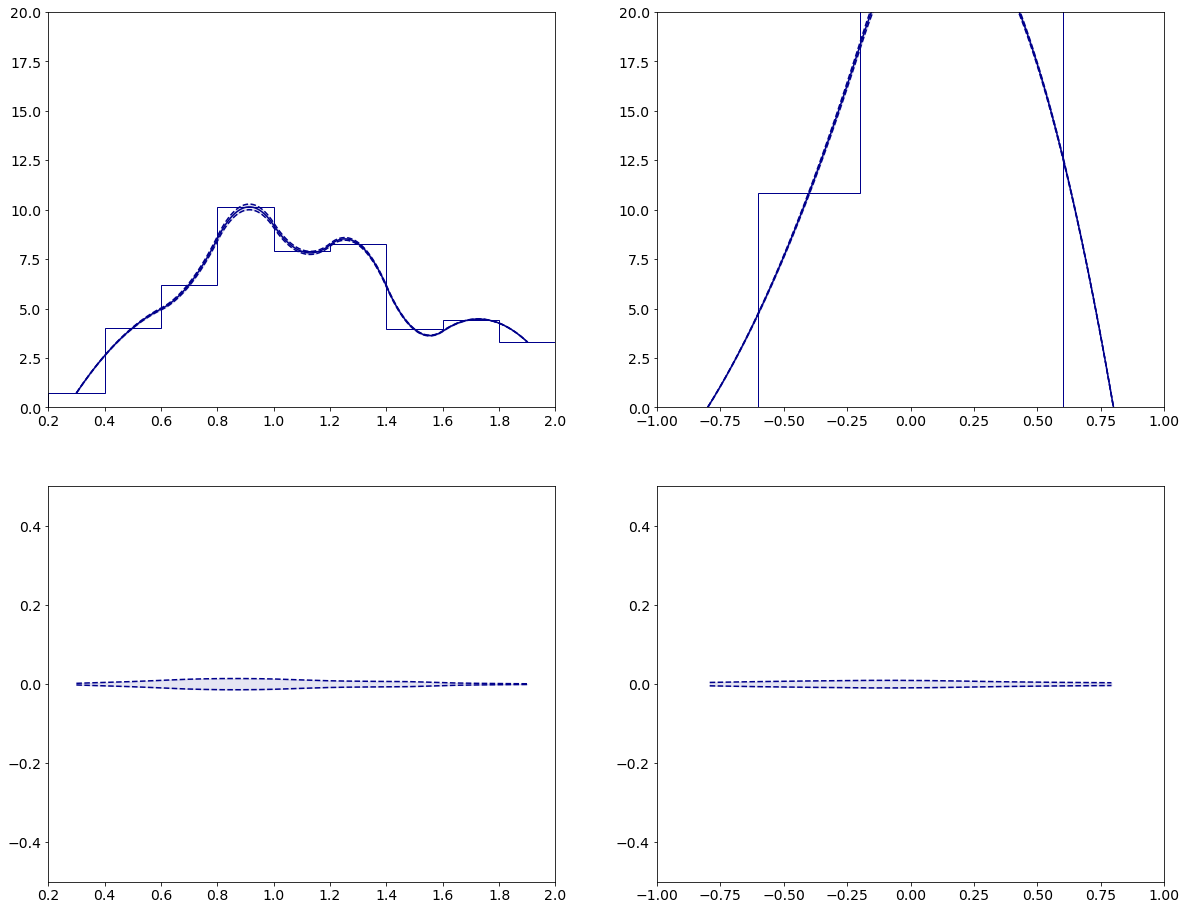

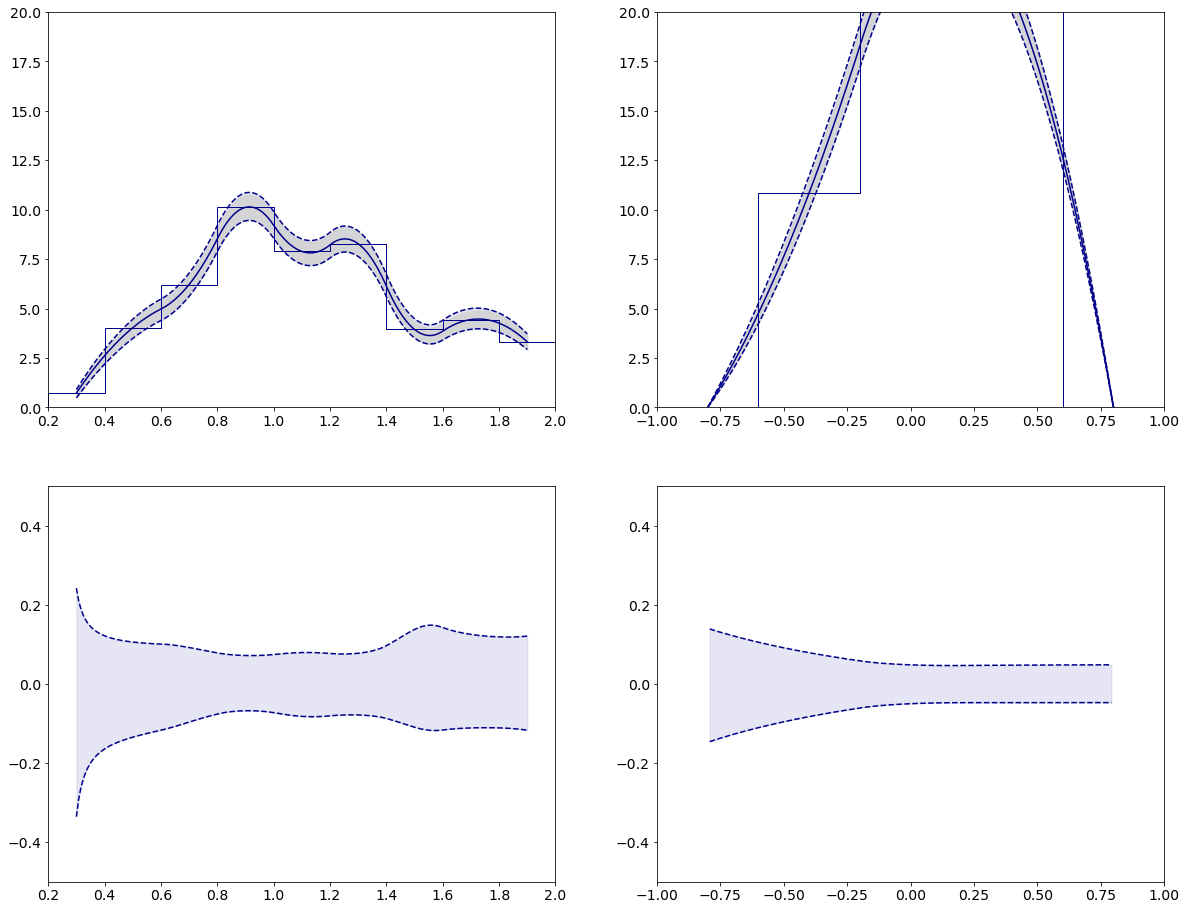

In [116]:
# ylim_ = (0.,0.3)
ylim_ = (0.,20.)
ylim_ratio_ = (-0.50,0.50)
color_ = "darkblue"

label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W1e-6"
#         label_ = "GGToWW-AQGC-muon-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 0.4094607   4.83049334 15.85075507 32.36508509 32.92177387 24.40446354
 21.81234125 14.97719575 10.96775561]
[ 0.4094607   4.83049334 15.42658409 32.24138603 31.85883047 24.12034042
 21.36319261 14.64540186 10.72905447]
0      0.000000
1     -0.027487
2     -0.045064
3     -0.055721
4     -0.061572
         ...   
195    0.015369
196    0.016961
197    0.018638
198    0.020401
199    0.022248
Length: 200, dtype: float64 0.0039746359914527764
0      0.000000
1      0.000390
2      0.000639
3      0.000791
4      0.000874
         ...   
195   -0.006611
196   -0.005075
197   -0.003461
198   -0.001769
199    0.000000
Length: 200, dtype: float64 -0.00843729592554944
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 0.         43.52347983 80.66259825 64.44697656  0.        ]
[ 0.         41.97685874 78.97231474 64.28199749  0.        ]
0           NaN
1      0.003601
2      0.003757
3      0.003912
4      0

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[ 0.4094607   4.83049334 15.62869646 32.32360963 32.62267063 24.32547951
 21.81234125 14.97719575 10.85701979]
[ 0.4094607   4.83049334 15.42658409 32.08790208 32.37333613 24.19239051
 21.72115973 14.97719575 10.72905447]
0      1.355714e-16
1     -1.311254e-02
2     -2.149714e-02
3     -2.658093e-02
4     -2.937211e-02
           ...     
195    7.769379e-03
196    8.719381e-03
197    9.729038e-03
198    1.079832e-02
199    1.192699e-02
Length: 200, dtype: float64 0.0019463806231693548
0      0.000000e+00
1     -2.273096e-03
2     -3.726592e-03
3     -4.607881e-03
4     -5.091740e-03
           ...     
195   -2.322527e-04
196   -1.844101e-04
197   -1.298190e-04
198   -6.837634e-05
199    2.649041e-15
Length: 200, dtype: float64 -0.0017681446589833056
Diff_YWW_YX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[ 0.         43.17476221 79.89859915 64.54755319  0.        ]
[ 0.         42.84445654 79.49997439 64.3879

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


0           NaN
1      0.000474
2      0.000474
3      0.000475
4      0.000475
         ...   
195    0.000484
196    0.000484
197    0.000484
198    0.000484
199         NaN
Length: 200, dtype: float64 0.0004923726809010658
0           NaN
1     -0.000474
2     -0.000474
3     -0.000475
4     -0.000475
         ...   
195   -0.000484
196   -0.000484
197   -0.000484
198   -0.000484
199         NaN
Length: 200, dtype: float64 -0.0004923726809153265
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
[ 0.41006066  4.83924831 15.45531837 32.35215048 32.44258955 24.37432982
 21.76489018 15.00937049 10.7519545 ]
[ 0.40886073  4.82173838 15.39784982 32.22752306 32.30408271 24.27662921
 21.67742929 14.945021   10.70615445]
0      0.001465
1      0.001509
2      0.001548
3      0.001581
4      0.001609
         ...   
195    0.002161
196    0.002155
197    0.002149
198    0.002142
199    0.002134
Length: 200, dtype: float64 0.001975327683142508
0  

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
[ 0.40956379  4.83247919 15.43456646 32.30699606 32.38854266 24.33659139
 21.7296604  14.98254024 10.73193717]
[ 0.40935763  4.82850769 15.41860216 32.27267833 32.35813069 24.31436849
 21.71266    14.97185196 10.72617239]
0      0.000252
1      0.000218
2      0.000202
3      0.000196
4      0.000198
         ...   
195    0.000288
196    0.000284
197    0.000279
198    0.000274
199    0.000269
Length: 200, dtype: float64 0.00042202583991850657
0     -0.000252
1     -0.000218
2     -0.000202
3     -0.000196
4     -0.000198
         ...   
195   -0.000288
196   -0.000284
197   -0.000279
198   -0.000274
199   -0.000269
Length: 200, dtype: float64 -0.0004219864550887599
Diff_YWW_YX
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
[ 0.         43.06343123 79.53508565 64.52894201  0.        ]
[ 0.         43.02935305 79.46486608 64.47760347  0.        ]
0           NaN
1      0.000329
2      0.0003

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


0           NaN
1      0.043357
2      0.042847
3      0.042338
4      0.041829
         ...   
195    0.021512
196    0.021646
197    0.021780
198    0.021911
199         NaN
Length: 200, dtype: float64 0.015784012655772523
0           NaN
1     -0.015430
2     -0.015391
3     -0.015352
4     -0.015313
         ...   
195   -0.007949
196   -0.007926
197   -0.007904
198   -0.007882
199         NaN
Length: 200, dtype: float64 -0.011551328090049622
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
[ 0.4094607   5.25775649 16.76639617 32.49616587 32.37333613 25.14989409
 22.48664008 16.36480402 11.10632642]
[ 0.4094607   4.65259443 14.85995251 31.00801386 32.095149   23.44610496
 20.82139818 14.46552704 10.67547412]
0      0.000000
1     -0.004576
2     -0.004948
3     -0.002671
4      0.001222
         ...   
195    0.061055
196    0.055271
197    0.049029
198    0.042327
199    0.035164
Length: 200, dtype: float64 0.04728820493567467
0      0

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/4126348709.py:321: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/4126348709.py:322: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


0           NaN
1      0.062863
2      0.062489
3      0.062115
4      0.061741
         ...   
195    0.041631
196    0.041701
197    0.041770
198    0.041839
199         NaN
Length: 200, dtype: float64 0.04102962869498832
0           NaN
1     -0.062623
2     -0.062304
3     -0.061986
4     -0.061667
         ...   
195   -0.029718
196   -0.029695
197   -0.029671
198   -0.029648
199         NaN
Length: 200, dtype: float64 -0.039498272295140364


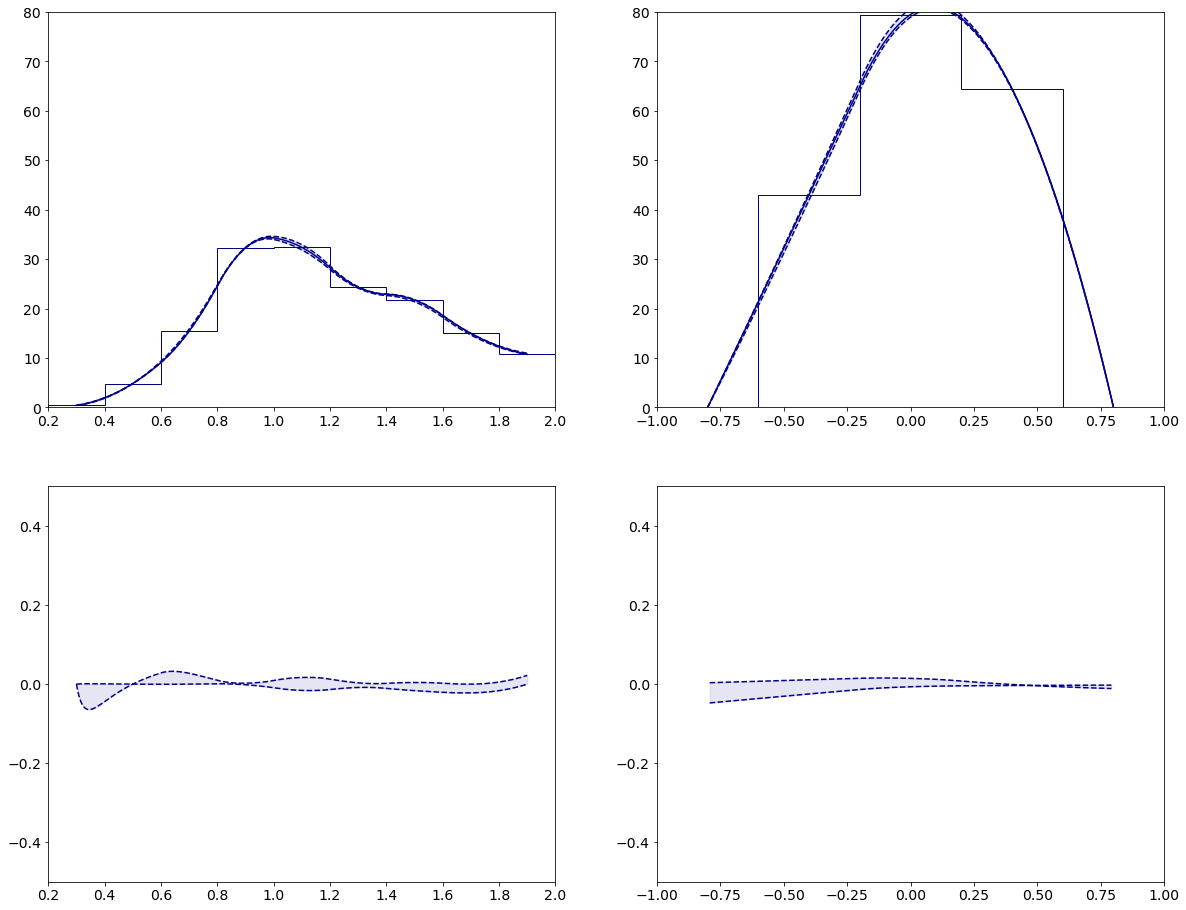

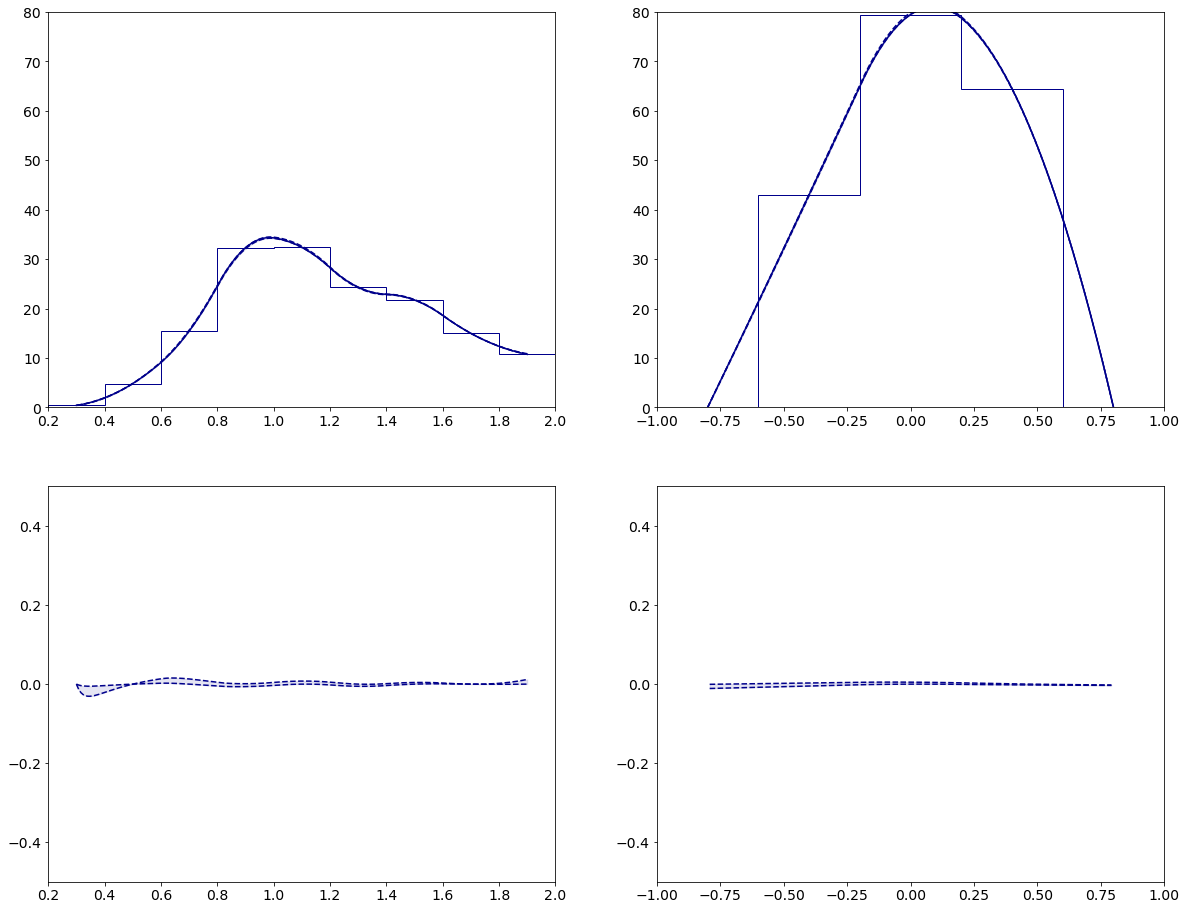

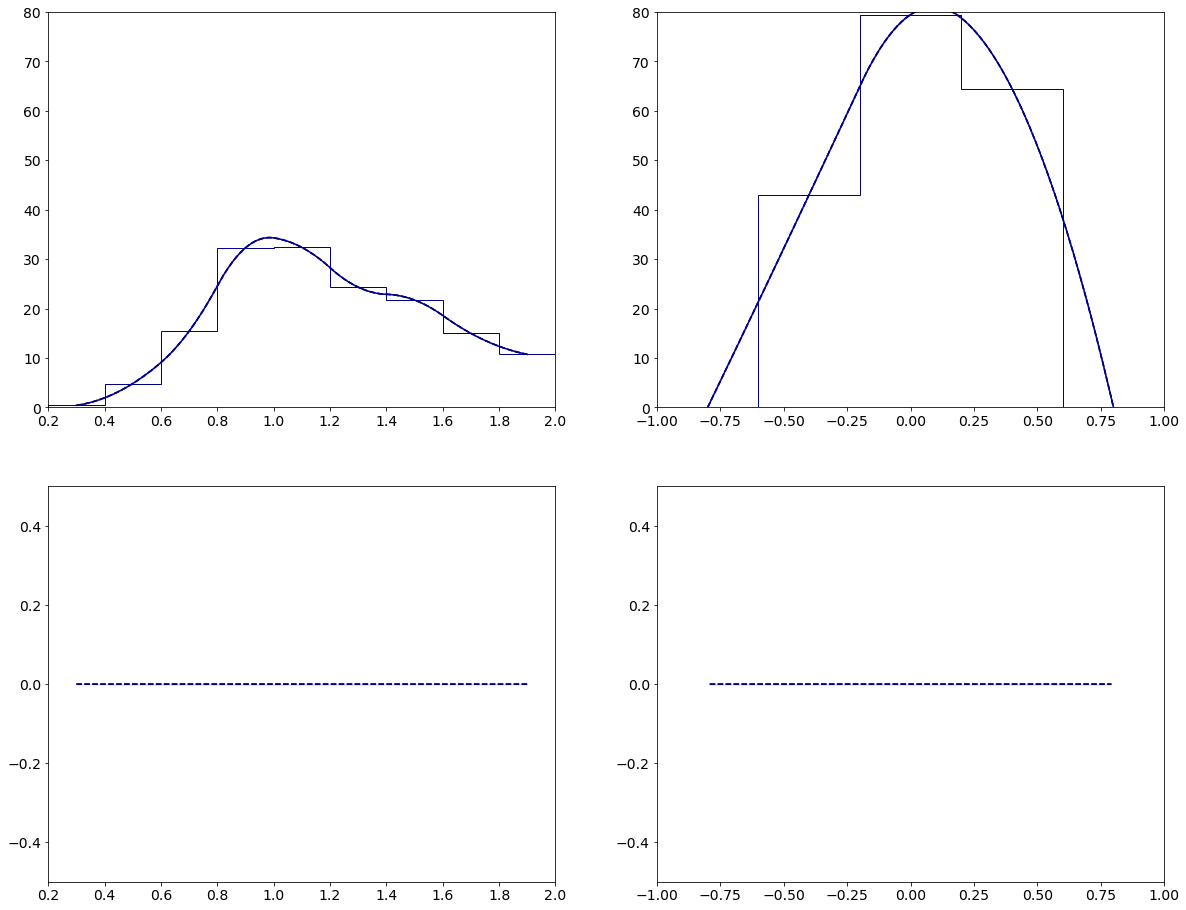

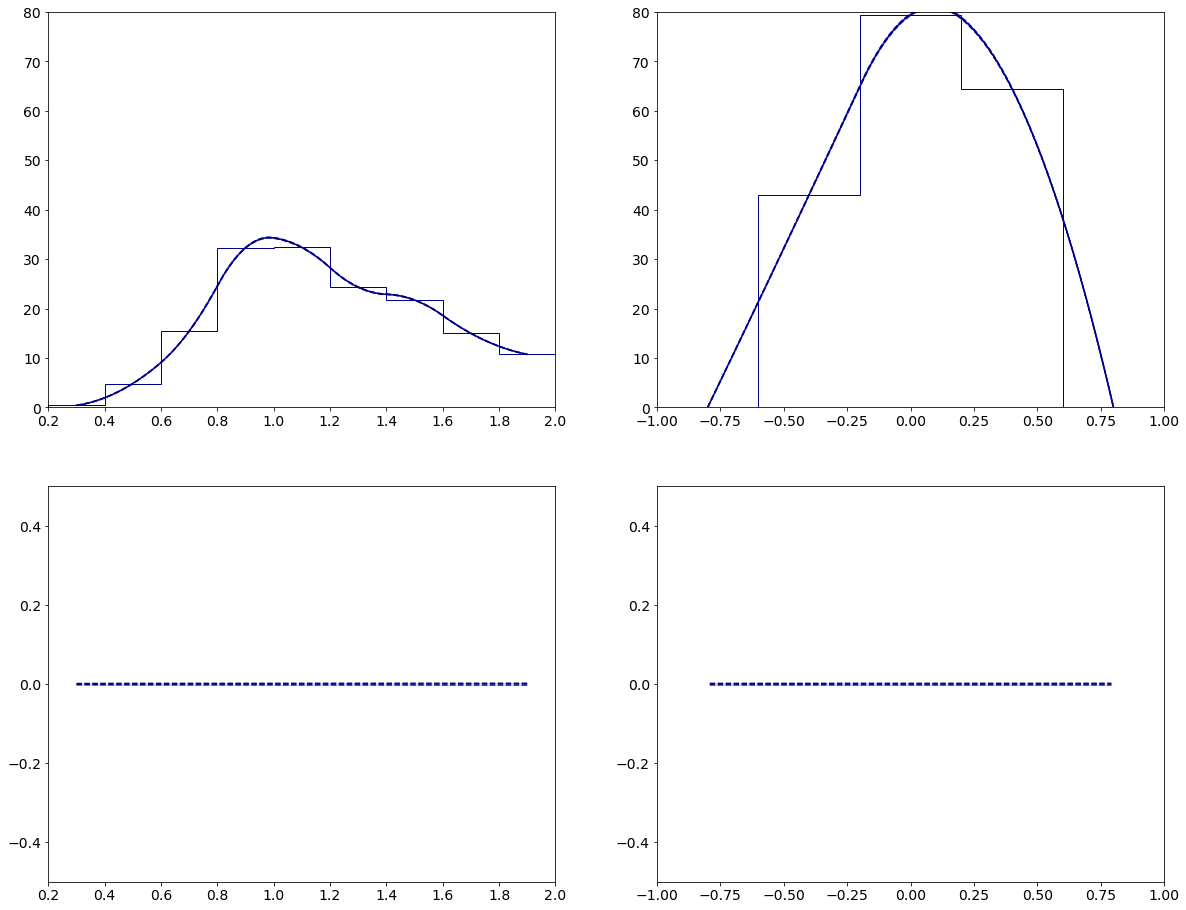

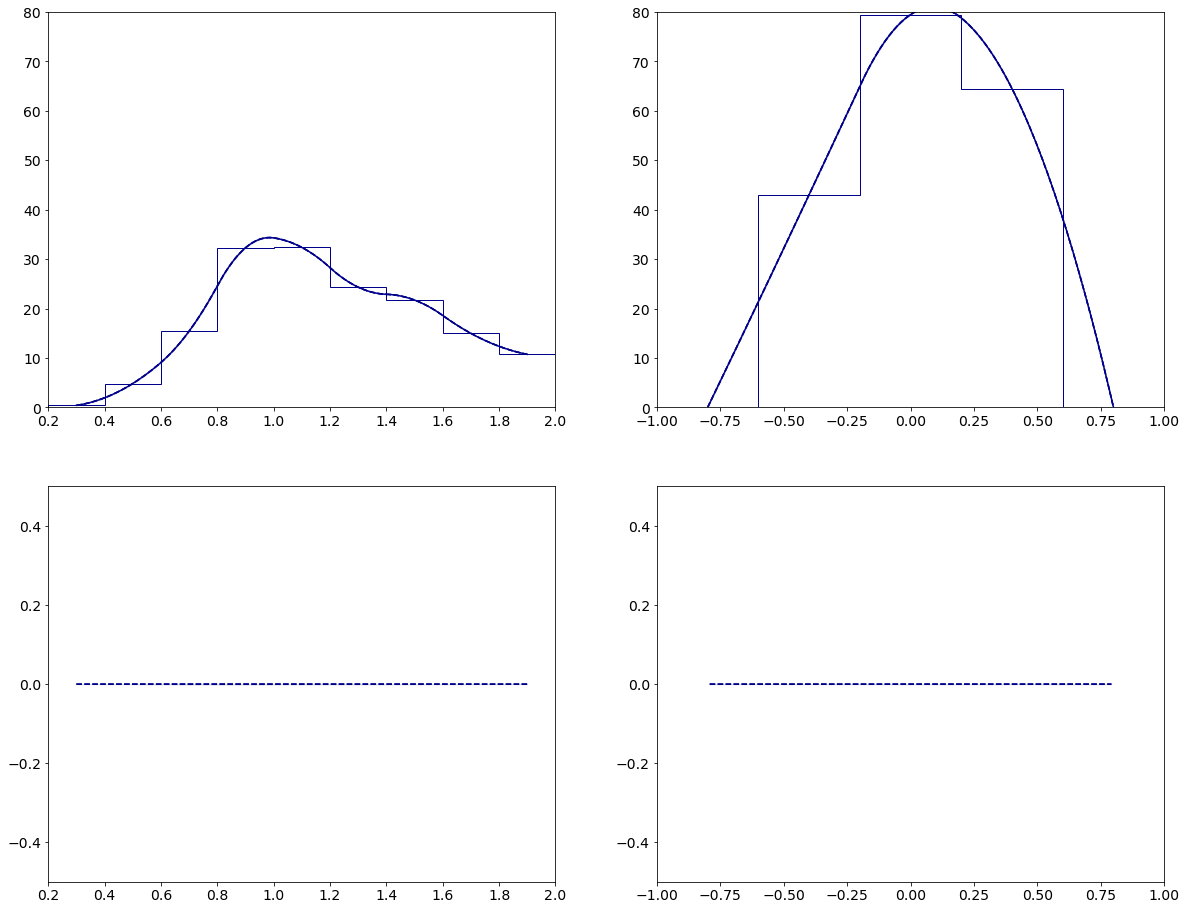

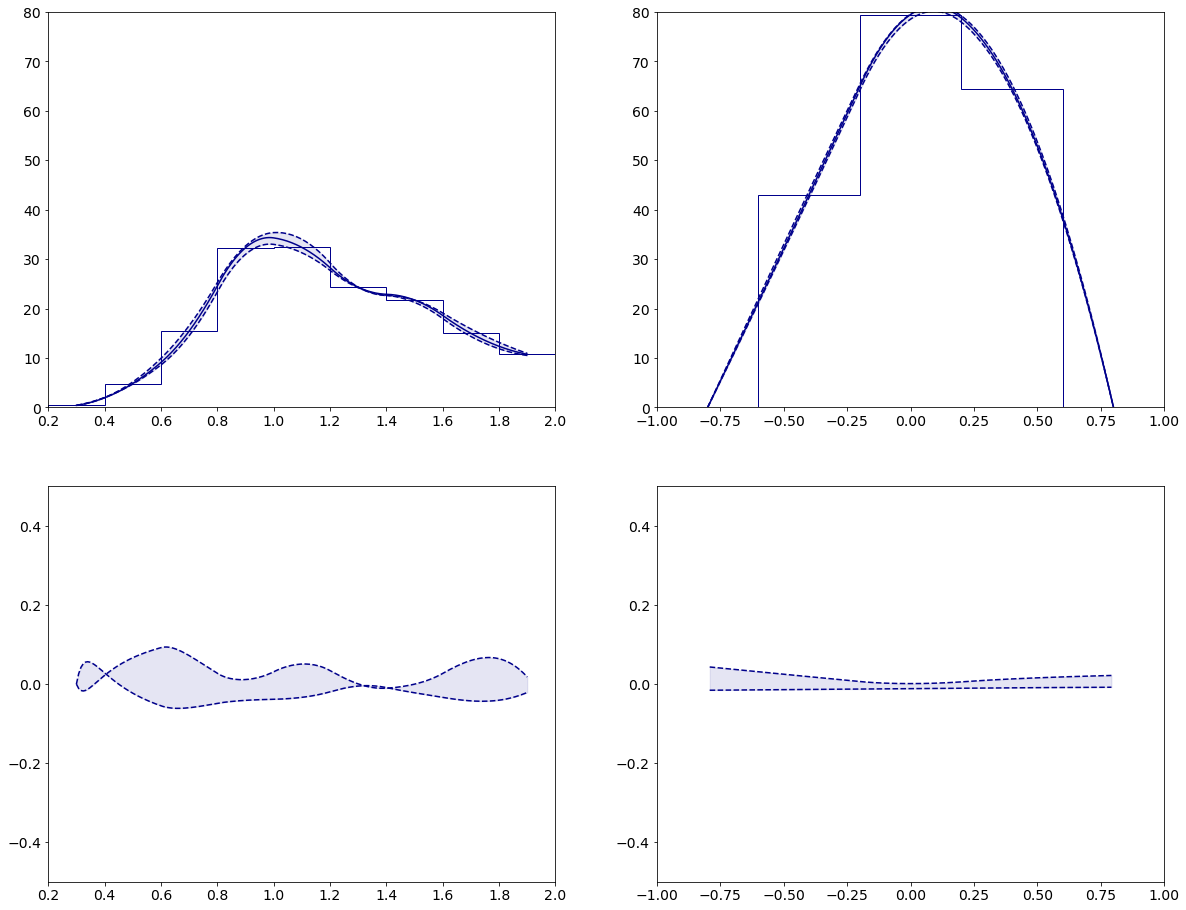

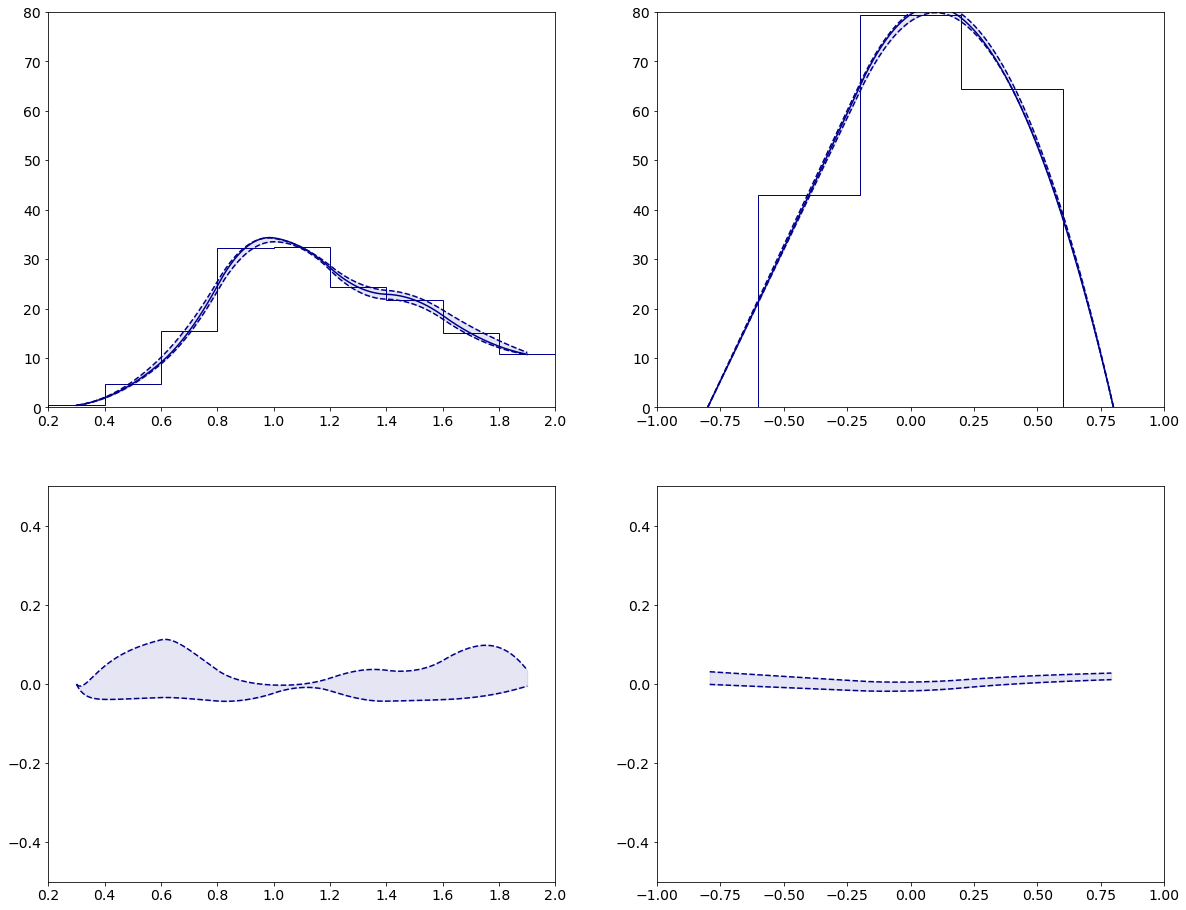

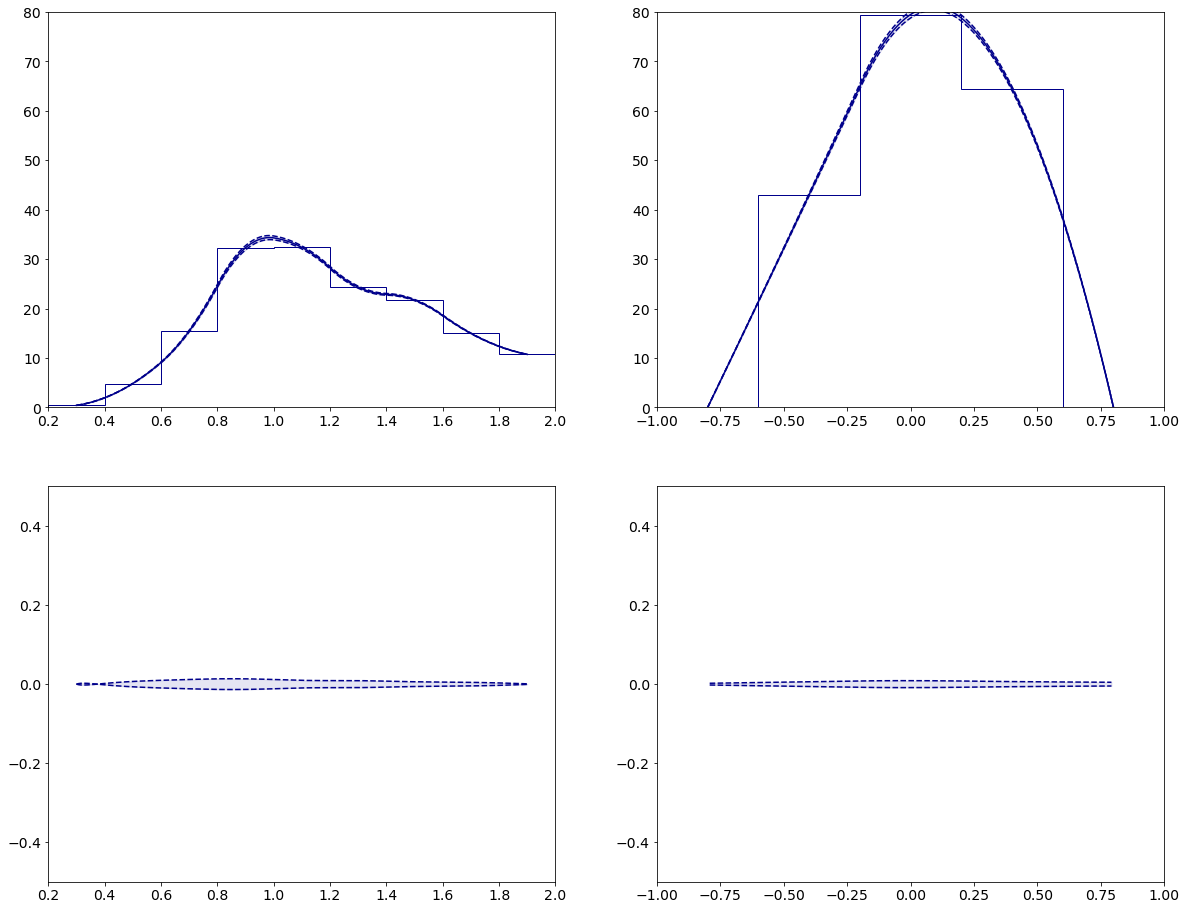

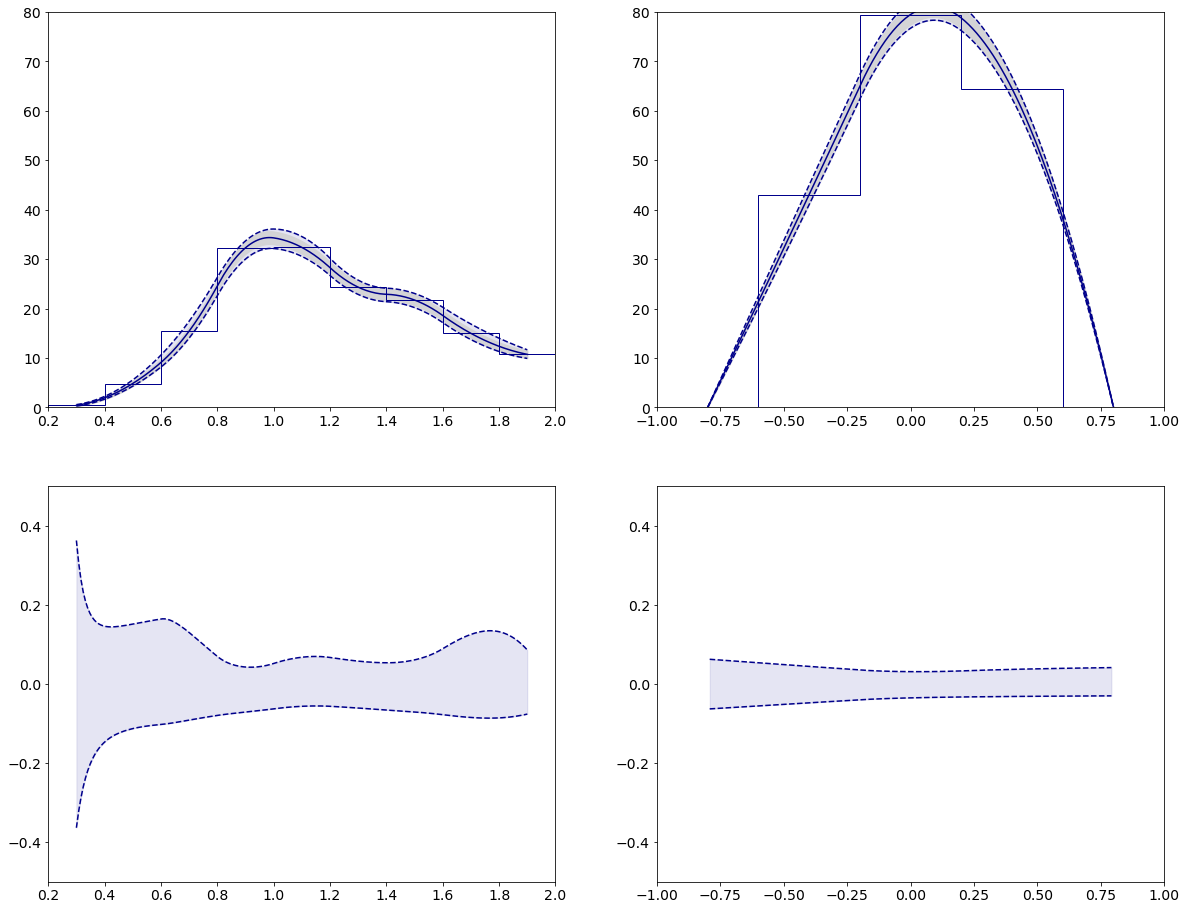

In [117]:
label_ = ""
coupling_str_ = "A0W2e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,80.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[  1.60191204  23.85670512  68.7149768  175.6383127  179.82258881
 158.44777516 120.97158928  91.19935088  65.15596152]
[  1.60191204  23.5367677   68.2115452  175.11692551 179.58086914
 156.75511697 119.84223348  89.34298433  62.79965064]
0      0.000000
1      0.014286
2      0.021434
3      0.025323
4      0.027467
         ...   
195    0.018092
196    0.018689
197    0.019306
198    0.019944
199    0.020603
Length: 200, dtype: float64 0.007125812705300219
0      0.000000
1      0.007320
2      0.010794
3      0.012519
4      0.013311
         ...   
195   -0.015998
196   -0.016098
197   -0.016183
198   -0.016253
199   -0.016306
Length: 200, dtype: float64 -0.004173274284693187
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[  0.         223.35823548 476.92796518 364.25000288   0.        ]
[  0.         220.02952894 471.42882789 363.25068984   0.        ]
0           NaN
1      0.017567
2      0.017

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[  1.60277087  23.54760817  68.74860755 175.19995415 180.74062748
 157.24918411 120.39129607  90.422425    63.87035184]
[  1.60105321  23.52592724  68.68134604 175.03389687 180.56725011
 157.09604165 120.27602739  90.33862529  63.81095423]
0      0.000536
1      0.000488
2      0.000463
3      0.000449
4      0.000440
         ...   
195    0.000463
196    0.000463
197    0.000464
198    0.000464
199    0.000465
Length: 200, dtype: float64 0.0004733539432459814
0     -0.000536
1     -0.000488
2     -0.000463
3     -0.000449
4     -0.000440
         ...   
195   -0.000463
196   -0.000463
197   -0.000464
198   -0.000464
199   -0.000465
Length: 200, dtype: float64 -0.00047335394325293017
Diff_YWW_YX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[  0.         220.97035253 473.80169734 364.21669654   0.        ]
[  0.         220.7605967  473.35275175 363.86708528   0.        ]
0           NaN
1      0.

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


0           NaN
1      0.002168
2      0.002164
3      0.002161
4      0.002158
         ...   
195    0.002037
196    0.002037
197    0.002038
198    0.002038
199         NaN
Length: 200, dtype: float64 0.0020299128860188525
0           NaN
1     -0.002168
2     -0.002164
3     -0.002161
4     -0.002158
         ...   
195   -0.002037
196   -0.002037
197   -0.002038
198   -0.002038
199         NaN
Length: 200, dtype: float64 -0.0020299128860204606
GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
[  1.60311778  23.55448355  68.76669774 175.24873394 180.78991486
 157.29091483 120.42423545  90.44855349  63.88870513]
[  1.6007063   23.51905186  68.66325585 174.98511708 180.51796272
 157.05431092 120.24308801  90.3124968   63.79260093]
0      0.000753
1      0.000753
2      0.000753
3      0.000753
4      0.000753
         ...   
195    0.000753
196    0.000753
197    0.000753
198    0.000753
199    0.000753
Length: 200, dtype: float64 0.0007526881

/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]



nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[  1.60191204  24.03139063  75.9618288  176.22066116 184.26709239
 160.49352842 122.51186279  93.87638496  64.59111634]
[  1.60191204  22.89401188  64.59079839 168.43043619 177.97243396
 152.68651211 118.35097358  87.80332946  63.03534528]
0      0.000000
1     -0.078594
2     -0.115331
3     -0.133039
4     -0.140623
         ...   
195    0.022758
196    0.020326
197    0.017688
198    0.014834
199    0.011755
Length: 200, dtype: float64 0.022098322659151046
0      0.000000
1      0.016265
2      0.023248
3      0.026030
4      0.026590
         ...   
195   -0.019601
196   -0.018067
197   -0.016395
198   -0.014579
199   -0.012614
Length: 200, dtype: float64 -0.026440195190539147
Diff_YWW_YX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[  0.         225.84714953 476.76196347 368.30950604   0.        ]
[  0.         215.31829036 468.18021876 360.76963519   0.        ]
0           NaN
1      0.054082
2      0.053250
3      0.052428


/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:131: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/1488968419.py:132: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


0           NaN
1     -0.003614
2     -0.003187
3     -0.002766
4     -0.002349
         ...   
195    0.000442
196    0.000307
197    0.000173
198    0.000040
199         NaN
Length: 200, dtype: float64 0.010286413933624757
0           NaN
1     -0.012469
2     -0.012447
3     -0.012426
4     -0.012404
         ...   
195   -0.027015
196   -0.027115
197   -0.027215
198   -0.027313
199         NaN
Length: 200, dtype: float64 -0.01612228105153627
GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[  1.60191204  23.62108047  69.43670249 177.40554757 182.44446491
 158.3608685  121.08689339  90.64223047  63.9048697 ]
[  1.60191204  23.45245494  67.9932511  172.82830345 178.86341267
 155.98435725 119.58043007  90.11881981  63.77643637]
0      0.000000
1     -0.001836
2     -0.002611
3     -0.002905
4     -0.002947
         ...   
195    0.001055
196    0.001030
197    0.001014
198    0.001005
199    0.001006
Length: 200, dtype: float64 0.00657269699328459

/tmp/ipykernel_639/4126348709.py:321: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/4126348709.py:322: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]


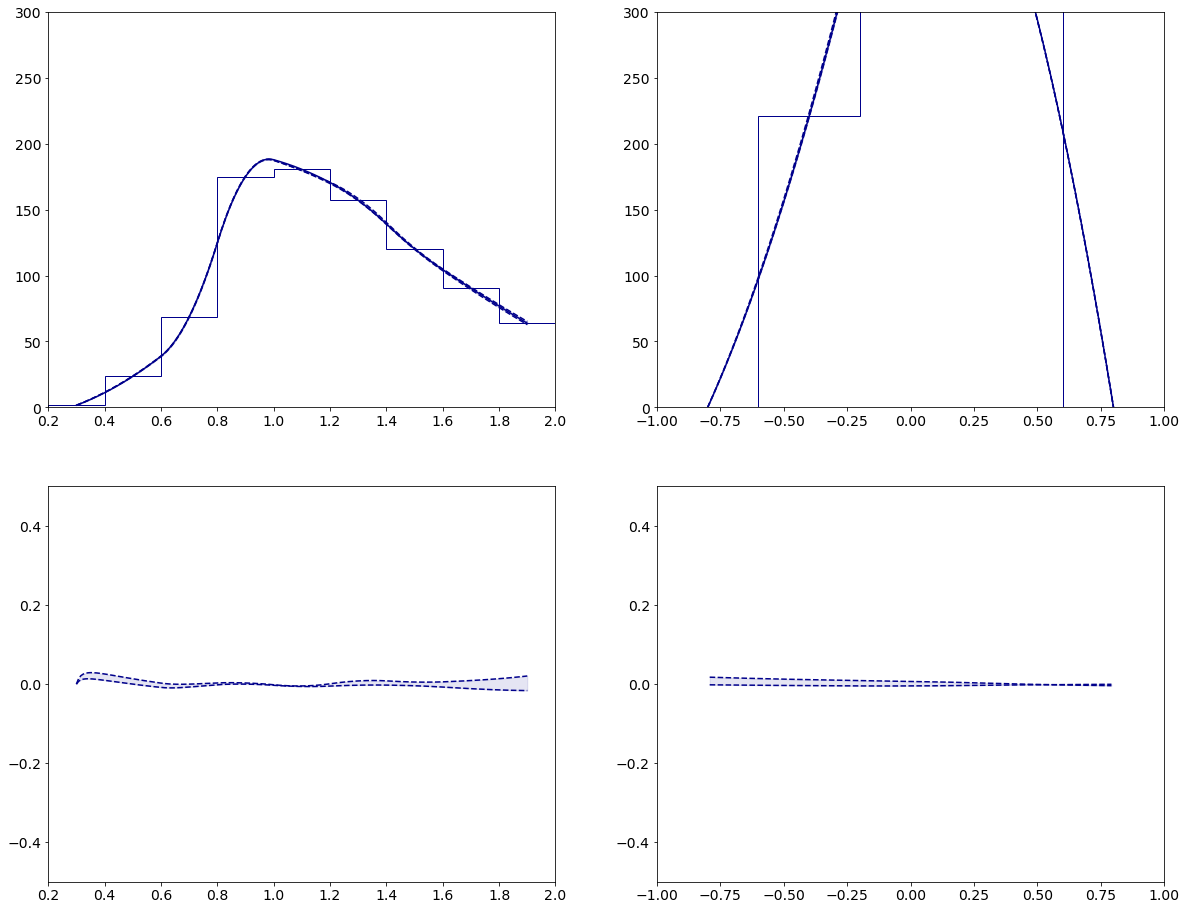

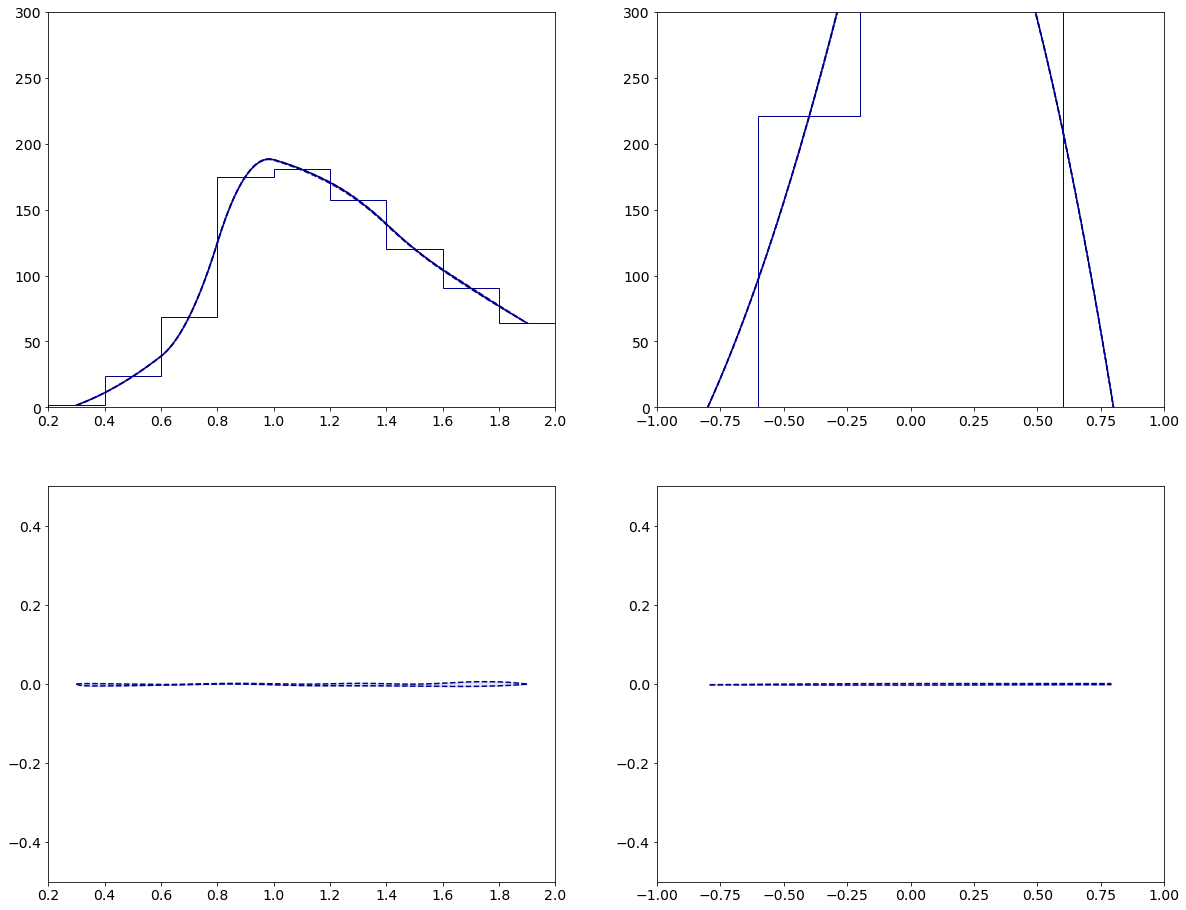

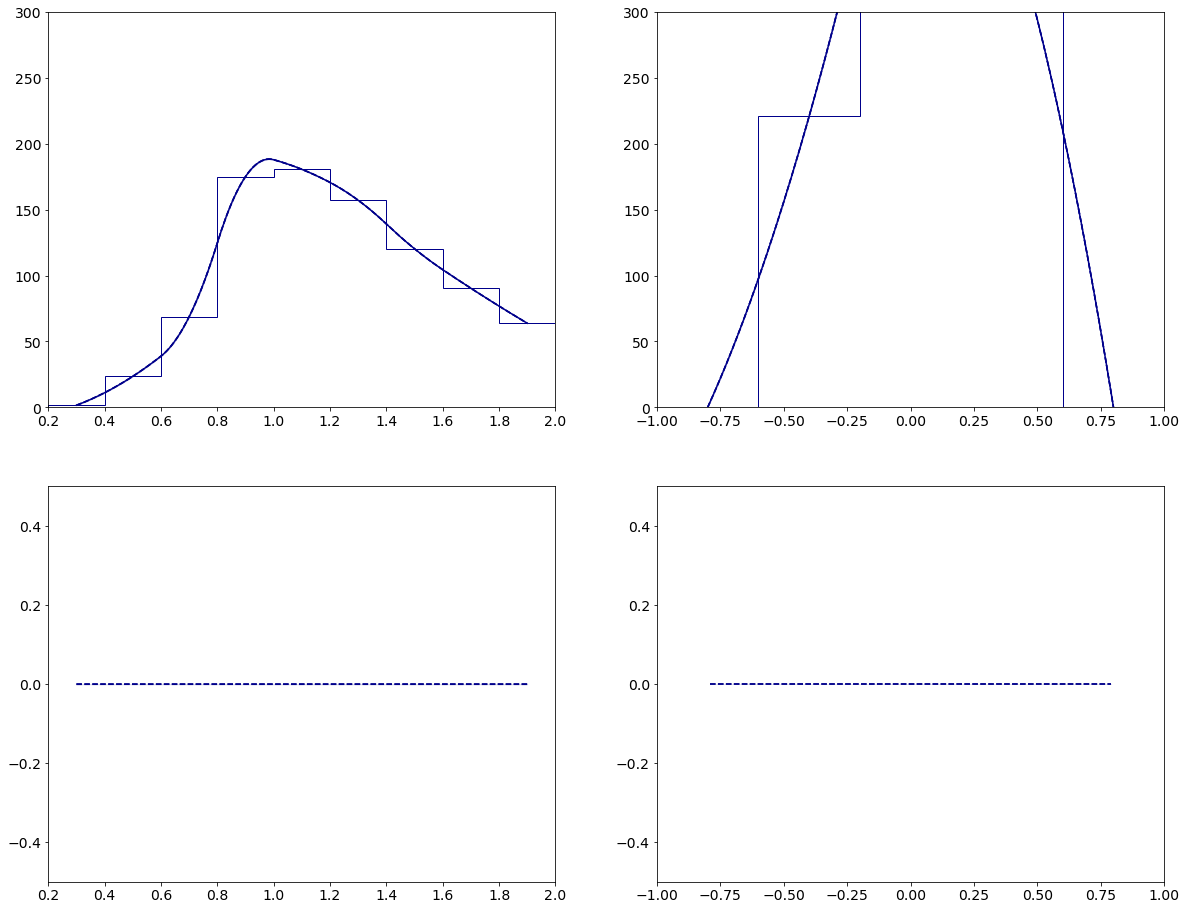

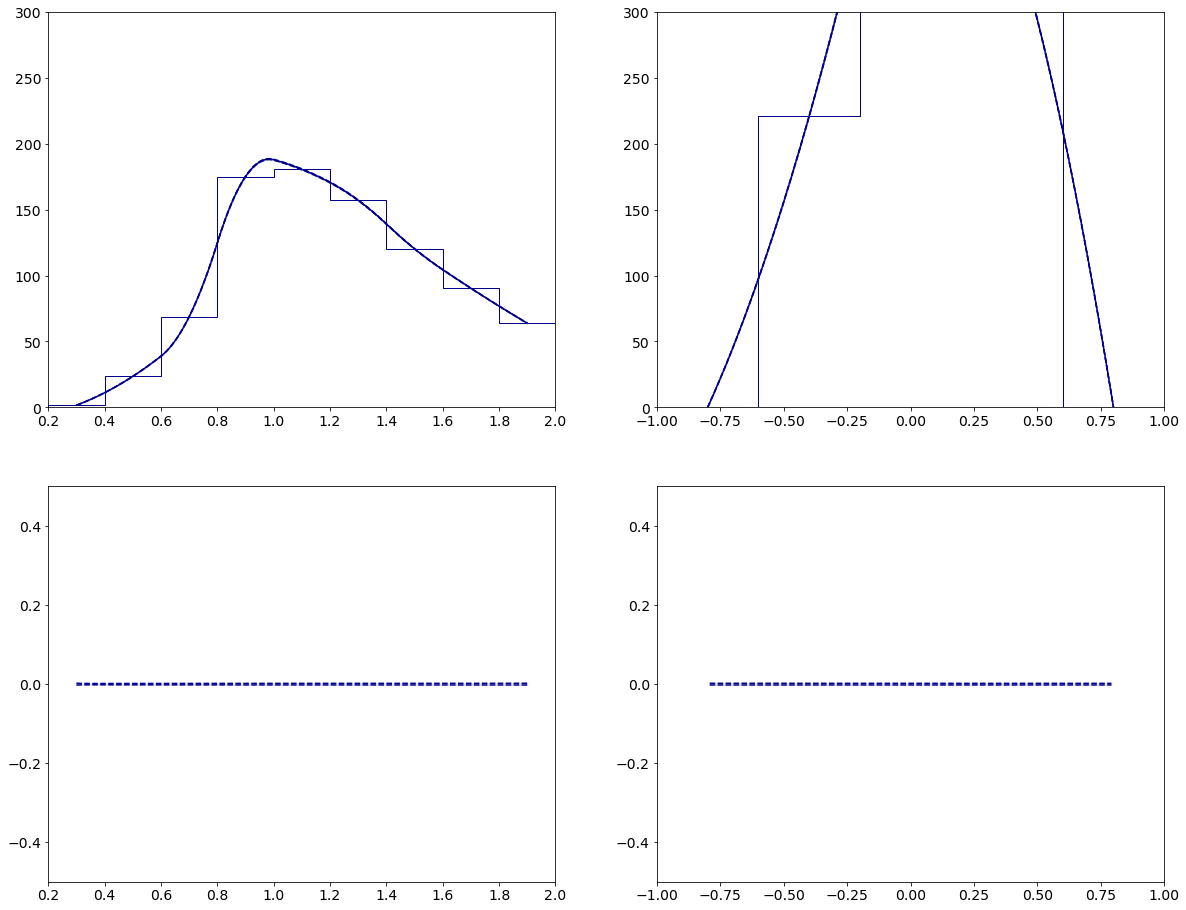

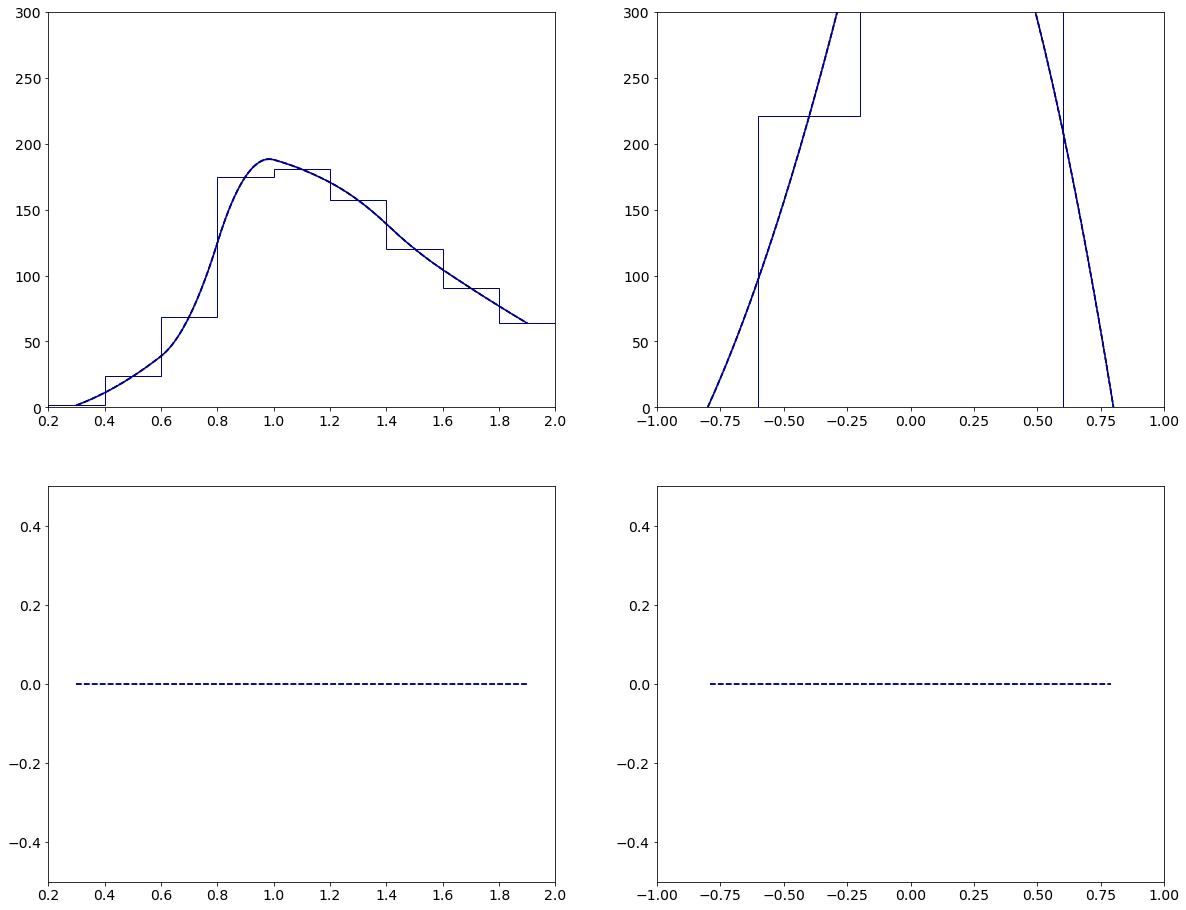

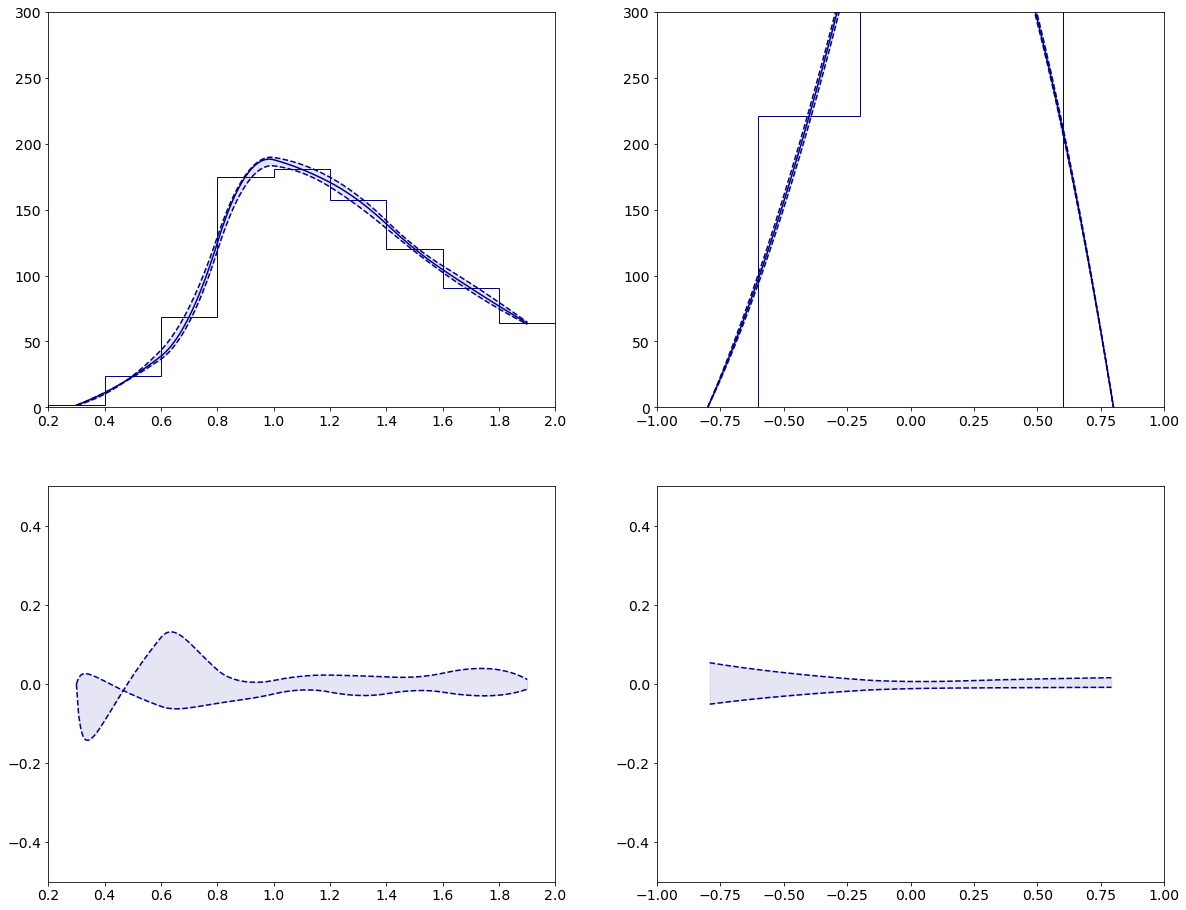

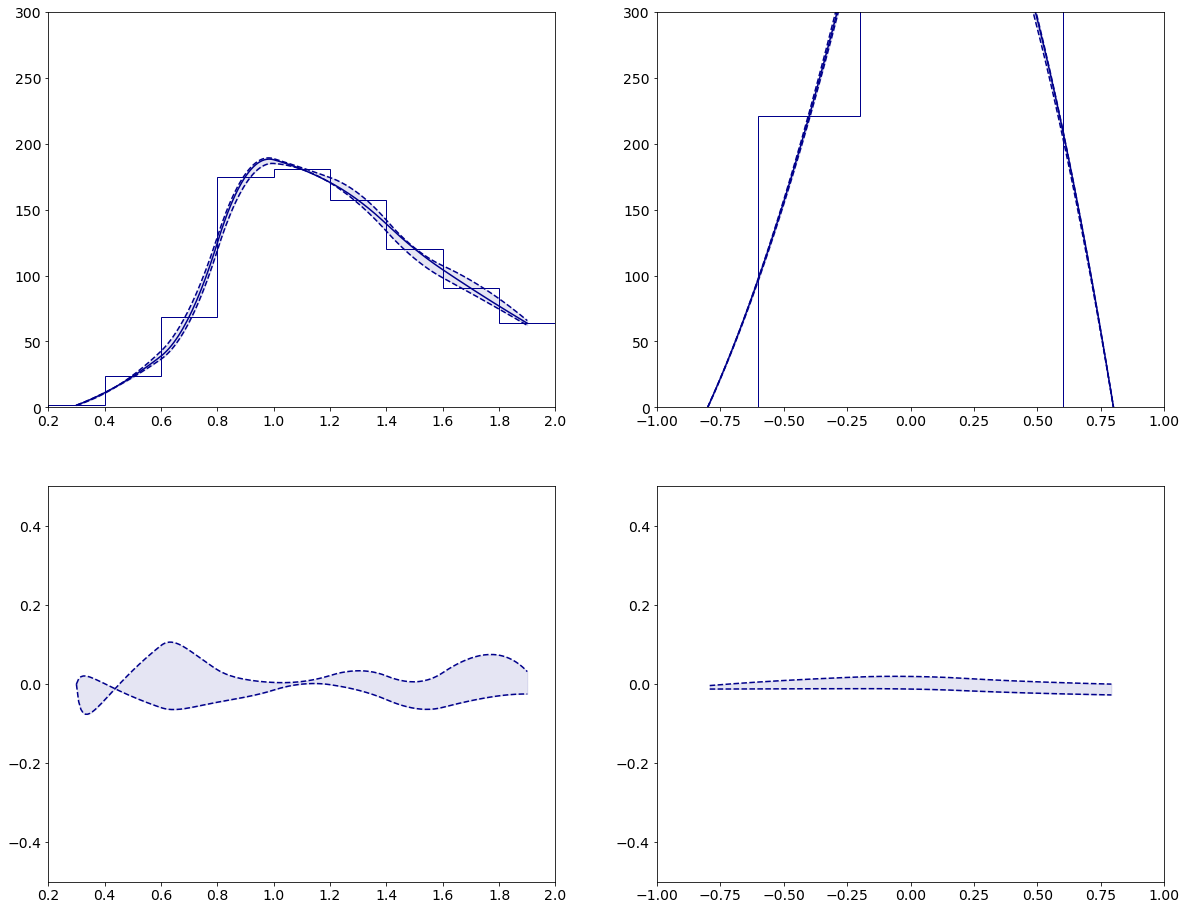

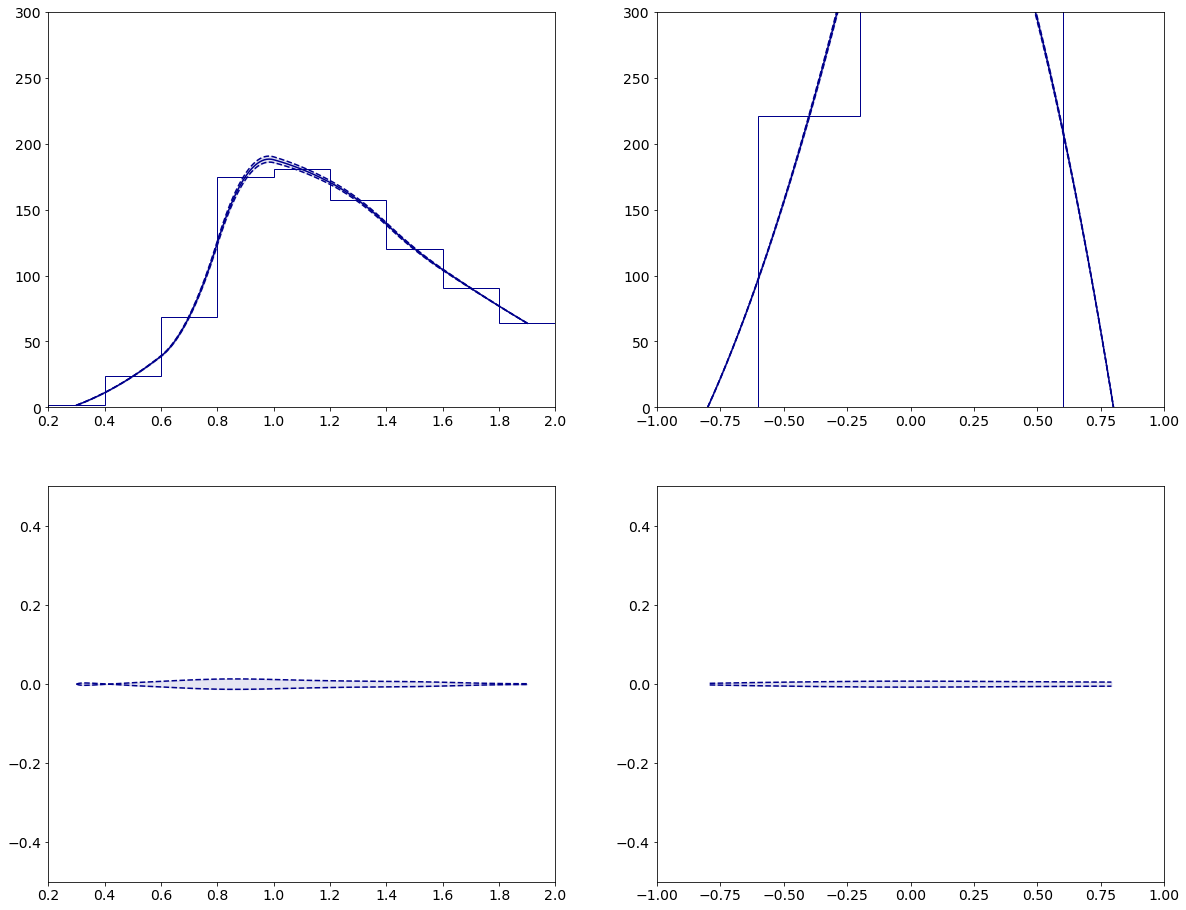

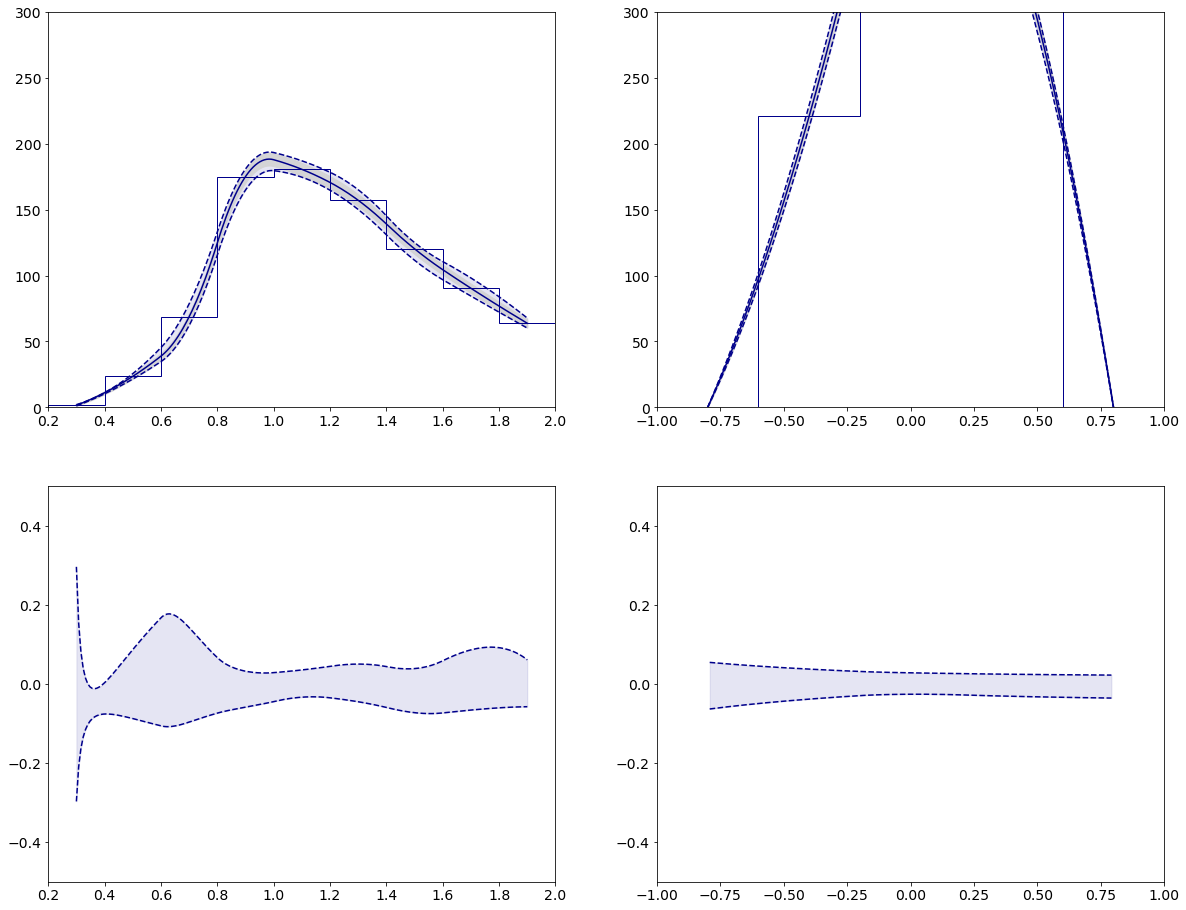

In [118]:
label_ = ""
coupling_str_ = "A0W5e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W5e-6"
#         label_ = "GGToWW-AQGC-muon-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ = (0.,300.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
#     df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
#     weights_dict=weights_sig_plus_mix_categories_concat,
    df_dict=df_signals_protons_multiRP_sig_plus_mix_All_selected_events,
    weights_dict=weights_sig_plus_mix_All,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

In [119]:
print ( counts )
print ( err )
print ( bins )
print ( max_variations_total )
print ( min_variations_total )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([ 0.7266866 ,  4.03014315,  6.21622704, 10.11894403,  7.89037131,
        8.27771961,  3.94199391,  4.44318116,  3.31204638]), 'Diff_YWW_YX': array([ 0.        , 10.85060749, 23.95013387, 20.9191659 ,  0.        ])}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'R_MWW_MX': array([ 0.4094607 ,  4.83049334, 15.42658409, 32.28983677, 32.37333613,
       24.32547951, 21.72115973, 14.97719575, 10.72905447]), 'Diff_YWW_YX': array([ 0.        , 43.04639123, 79.49997439, 64.50327138,  0.        ])}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'R_MWW_MX': array([  1.60191204,  23.5367677 ,  68.7149768 , 175.11692551,
       180.65393879, 157.17261288, 120.33366173,  90.38052514,
        63.84065303]), 'Diff_YWW_YX': array([  0.        , 220.86547462, 473.57722455, 364.04189091,
         0.        ])}}
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([0.17637849, 0.40619803, 0.49299287, 0.61827845, 0.55929667,
       0.5872667 , 0.4144393 , 0.43612085, 0.37850

### Background

### Load and select events

In [120]:
# ['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
#        'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
#        'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
#        'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
#        'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
#        'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
#        'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
#        'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
#        'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
#        'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
#        'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd',
#        'betaStar_rnd', 'period', 'jet0_pt_nom', 'jet0_energy_nom',
#        'jet0_mass_nom', 'jet0_corrmass_nom', 'jet0_px_nom', 'jet0_py_nom',
#        'jet0_pz_nom', 'muon0_pt_nom', 'muon0_energy_nom', 'muon0_px_nom',
#        'muon0_py_nom', 'muon0_pz_nom', 'WLeptonicPt_nom',
#        'WLeptonicPx_nom', 'WLeptonicPy_nom', 'WLeptonicPz_nom',
#        'WLeptonicE_nom', 'WLeptonicM_nom', 'WW_energy_nom', 'WW_pz_nom',
#        'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
#        'within_aperture', 'xlow', 'xhigh', 'ylow', 'yhigh', 'MX', 'YX',
#        'diffMWW_MX', 'ratioMWW_MX', 'shiftedRatioMWW_MX', 'diffYWW_YX',
#        'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']

In [121]:
# resample_factor = 20
resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

labels_background = []
fileNames_bkg = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-single-arm-muon-2017B",
            "data-random-resample_50-single-arm-muon-2017C",
            "data-random-resample_50-single-arm-muon-2017D",
            "data-random-resample_50-single-arm-muon-2017E",
            "data-random-resample_50-single-arm-muon-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-muon-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
            "data-random-resample_50-single-arm-muon-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
            "data-random-resample_50-single-arm-muon-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
            "data-random-resample_50-single-arm-muon-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
            "data-random-resample_50-single-arm-muon-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-single-arm-electron-2017B",
            "data-random-resample_50-single-arm-electron-2017C",
            "data-random-resample_50-single-arm-electron-2017D",
            "data-random-resample_50-single-arm-electron-2017E",
            "data-random-resample_50-single-arm-electron-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-electron-2017B": "data-store-data-random-resample_50-single-arm-electron-2017B.h5",
            "data-random-resample_50-single-arm-electron-2017C": "data-store-data-random-resample_50-single-arm-electron-2017C.h5",
            "data-random-resample_50-single-arm-electron-2017D": "data-store-data-random-resample_50-single-arm-electron-2017D.h5",
            "data-random-resample_50-single-arm-electron-2017E": "data-store-data-random-resample_50-single-arm-electron-2017E.h5",
            "data-random-resample_50-single-arm-electron-2017F": "data-store-data-random-resample_50-single-arm-electron-2017F.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-2018-muon-2018A",
            "data-random-resample_50-2018-muon-2018B",
            "data-random-resample_50-2018-muon-2018C",
            "data-random-resample_50-2018-muon-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-muon-2018A": "data-store-data-random-resample_50-2018-muon-2018A.h5",
            "data-random-resample_50-2018-muon-2018B": "data-store-data-random-resample_50-2018-muon-2018B.h5",
            "data-random-resample_50-2018-muon-2018C": "data-store-data-random-resample_50-2018-muon-2018C.h5",
            "data-random-resample_50-2018-muon-2018D": "data-store-data-random-resample_50-2018-muon-2018D.h5"
#             "data-random-resample_50-2018-muon-2018D-1": "data-store-data-random-resample_50-2018-muon-2018D-1.h5",
#             "data-random-resample_50-2018-muon-2018D-2": "data-store-data-random-resample_50-2018-muon-2018D-2.h5",
#             "data-random-resample_50-2018-muon-2018D-3": "data-store-data-random-resample_50-2018-muon-2018D-3.h5",
#             "data-random-resample_50-2018-muon-2018D-4": "data-store-data-random-resample_50-2018-muon-2018D-4.h5",
#             "data-random-resample_50-2018-muon-2018D-5": "data-store-data-random-resample_50-2018-muon-2018D-5.h5",
#             "data-random-resample_50-2018-muon-2018D-6": "data-store-data-random-resample_50-2018-muon-2018D-6.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-2018-electron-2018A",
            "data-random-resample_50-2018-electron-2018B",
            "data-random-resample_50-2018-electron-2018C",
            "data-random-resample_50-2018-electron-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-electron-2018A": "data-store-data-random-resample_50-2018-electron-2018A.h5",
            "data-random-resample_50-2018-electron-2018B": "data-store-data-random-resample_50-2018-electron-2018B.h5",
            "data-random-resample_50-2018-electron-2018C": "data-store-data-random-resample_50-2018-electron-2018C.h5",
            "data-random-resample_50-2018-electron-2018D": "data-store-data-random-resample_50-2018-electron-2018D.h5"
        }
    
base_path_ = "output"
for label_ in fileNames_bkg:
    fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
print ( fileNames_bkg )
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )

df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
df_protons_multiRP_bkg_events = None
df_protons_multiRP_bkg_events_nTracks40 = None

df_counts_bkg_list_ = []
# df_protons_multiRP_bkg_index_list_ = []
df_protons_multiRP_bkg_events_list_ = []
df_protons_multiRP_bkg_events_list_nTracks40_ = []
for label_ in labels_background:
    print ( label_ )
    file_path_ = fileNames_bkg[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_bkg__ = store_[ "counts" ]
#         df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]
        df_protons_multiRP_bkg_events__ = df_protons_multiRP_bkg_events__.loc[ :, 
            ['crossingAngle',
             'jet0_eta', 'jet0_phi', 
             'jet0_tau1', 'jet0_tau2',
             'met', 'met_phi',
             'num_bjets_ak4',
             'pfcand_nextracks', 'pfcand_nextracks_noDRl',
             'WLeptonicEta', 'WLeptonicPhi',
             'muon0_eta', 'muon0_phi', 'muon0_iso',
             'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
             'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
             'muon0_pt_nom', 
             'WLeptonicPt_nom', 
             'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
             'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']
        ]

        print ( df_protons_multiRP_bkg_events__.shape[0] )
        df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type, max_num_tracks=40 )
        print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_protons_multiRP_bkg_events_def__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type )
        print ( df_protons_multiRP_bkg_events_def__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )    
    
        df_counts_bkg_list_.append( df_counts_bkg__ )
#         df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
#         df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
        df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
        df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

df_counts_bkg = df_counts_bkg_list_[0]
for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

# df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

{'data-random-resample_50-2018-muon-2018A': 'output/data-store-data-random-resample_50-2018-muon-2018A.h5', 'data-random-resample_50-2018-muon-2018B': 'output/data-store-data-random-resample_50-2018-muon-2018B.h5', 'data-random-resample_50-2018-muon-2018C': 'output/data-store-data-random-resample_50-2018-muon-2018C.h5', 'data-random-resample_50-2018-muon-2018D': 'output/data-store-data-random-resample_50-2018-muon-2018D.h5'}
data-random-resample_50-2018-muon-2018A
output/data-store-data-random-resample_50-2018-muon-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
4157146
78939
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 4157146, 'Muon': 4150581, 'Jet': 2972711, 'Jet_Muon': 2935630, 'MET': 2276133, 'Jet_MET': 2039004, 'PrunedMass': 567581, 'Tau21': 370167, 'BJet_Veto': 294218, 'Xi_CMS': 259819, 'WLeptonic': 170243, 'Jet_WLeptonic': 165851, 'MWW': 156470, 'ExtraTr

In [122]:
df_counts_bkg

All                     108448900
Jet                     108448900
Muon                    105076200
ProtonRnd_check_none    105076200
ProtonRnd                71804550
dtype: int64

In [123]:
df_protons_multiRP_bkg_events.columns.values

array(['crossingAngle', 'jet0_eta', 'jet0_phi', 'jet0_tau1', 'jet0_tau2',
       'met', 'met_phi', 'num_bjets_ak4', 'pfcand_nextracks',
       'pfcand_nextracks_noDRl', 'WLeptonicEta', 'WLeptonicPhi',
       'muon0_eta', 'muon0_phi', 'muon0_iso', 'run_rnd', 'lumiblock_rnd',
       'event_rnd', 'crossingAngle_rnd', 'period', 'jet0_pt_nom',
       'jet0_energy_nom', 'jet0_corrmass_nom', 'muon0_pt_nom',
       'WLeptonicPt_nom', 'MWW_nom', 'YWW_nom', 'xiCMS_45_nom',
       'xiCMS_56_nom', 'xi_nom', 'MX_nom', 'YX_nom', 'R_MWW_MX_nom',
       'Diff_YWW_YX_nom'], dtype=object)

In [124]:
df_protons_multiRP_bkg_events

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event     slice                                      
316457 766       887404608 0              136.0 -0.648128  1.239739   
                           3              136.0 -0.648128  1.239739   
315645 279       282676384 5              144.0  1.302534  1.614148   
316457 766       887404608 6              136.0 -0.648128  1.239739   
315645 279       282676384 7              144.0  1.302534  1.614148   
...                                         ...       ...       ...   
325022 496       801723712 1              148.0  0.943451 -2.383191   
                           4              148.0  0.943451 -2.383191   
                           20             148.0  0.943451 -2.383191   
                           28             148.0  0.943451 -2.383191   
                           45             148.0  0.943451 -2.383191   

                                  jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event     slice                                               
316457 766       887404608 0       0.258241   0.091132   53.143974 -2.159082   
                           3       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 5       0.255488   0.127335  171.617416 -1.633066   
316457 766       887404608 6       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 7       0.255488   0.127335  171.617416 -1.633066   
...                                     ...        ...         ...       ...   
325022 496       801723712 1       0.305149   0.128669   94.872337  0.914726   
                           4       0.305149   0.128669   94.872337  0.914726   
                           20      0.305149   0.128669   94.872337  0.914726   
                           28      0.305149   0.128669   94.872337  0.914726   
                           45      0.305149   0.128669   94.872337  0.914726   

                                  num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event     slice                                    
316457 766       887404608 0                  0                 0   
                           3                  0                 0   
315645 279       282676384 5                  0                 3   
316457 766       887404608 6                  0                 0   
315645 279       282676384 7                  0                 3   
...                                         ...               ...   
325022 496       801723712 1                  0                 2   
                           4                  0                 2   
                           20                 0                 2   
                           28                 0                 2   
                           45                 0                 2   

                                  pfcand_nextracks_noDRl  ...  \
run    lumiblock event     slice                          ...   
316457 766       887404608 0                           0  ...   
                           3                           0  ...   
315645 279       282676384 5                           3  ...   
316457 766       887404608 6                           0  ...   
315645 279       282676384 7                           3  ...   
...                                                  ...  ...   
325022 496       801723712 1                           3  ...   
                           4                           3  ...   
                           20                          3  ...   
                           28                          3  ...   
                           45                          3  ...   

                                  WLeptonicPt_nom     MWW_nom   YWW_nom  \
run    lumiblock event     slice                                          
316457 766       887404608 0           341.841736  617.227478 -0.592941   
                           3           341.841736  617.227478 -0.592941   
315645 279       28267638

In [125]:
df_protons_multiRP_bkg_events_nTracks40

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                      
316199 739       997501056  0              143.0 -0.711949  3.141166   
       431       606212352  0              148.0  1.537150 -0.524992   
       457       640544640  0              147.0 -0.252821 -2.567096   
       461       645320256  0              147.0 -0.135645 -0.994506   
       466       651308480  0              147.0  0.361461  1.984391   
...                                          ...       ...       ...   
325170 453       844710400  49             136.0 -1.037904 -2.788063   
       494       922318464  49             135.0  1.172148  2.442343   
       698       1276671616 49             132.0 -0.122631  2.536145   
       584       1081645568 49             134.0  0.914759 -0.834245   
       567       1052482304 49             134.0 -0.456844 -2.794641   

                                   jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event      slice                                               
316199 739       997501056  0       0.367093   0.203858  137.177704 -0.232372   
       431       606212352  0       0.274689   0.145763  134.065582  2.679044   
       457       640544640  0       0.355102   0.147476   52.566811  0.124150   
       461       645320256  0       0.402971   0.133848  104.933250  2.180758   
       466       651308480  0       0.281934   0.115077  286.500305 -1.026712   
...                                      ...        ...         ...       ...   
325170 453       844710400  49      0.362377   0.140179  233.978668  0.120907   
       494       922318464  49      0.262487   0.118982   51.376549 -1.032905   
       698       1276671616 49      0.422794   0.110299  148.000854 -0.438284   
       584       1081645568 49      0.472690   0.267931  226.064713  2.426128   
       567       1052482304 49      0.182705   0.094547  191.122223  0.353478   

                                   num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event      slice                                    
316199 739       997501056  0                  0                15   
       431       606212352  0                  0                40   
       457       640544640  0                  0                38   
       461       645320256  0                  0                25   
       466       651308480  0                  0                20   
...                                          ...               ...   
325170 453       844710400  49                 0                39   
       494       922318464  49                 0                18   
       698       1276671616 49                 0                25   
       584       1081645568 49                 0                38   
       567       1052482304 49                 0                27   

                                   pfcand_nextracks_noDRl  ...  \
run    lumiblock event      slice                          ...   
316199 739       997501056  0                          15  ...   
       431       606212352  0                          41  ...   
       457       640544640  0                          40  ...   
       461       645320256  0                          25  ...   
       466       651308480  0                          20  ...   
...                                                   ...  ...   
325170 453       844710400  49                         39  ...   
       494       922318464  49                         18  ...   
       698       1276671616 49                         25  ...   
       584       1081645568 49                         39  ...   
       567       1052482304 49                         27  ...   

                                   WLeptonicPt_nom     MWW_nom   YWW_nom  \
run    lumiblock event      slice                                          
316199 739       997501056  0           207.508850  504.416473 -0.354777   
       431       606212352  0           280.96

In [126]:
norm_factors_Bkg = np.array( [ ( 1. / resample_factor ) ] )
df_protons_multiRP_bkg_events_nTracks40[ "norm" ] = np.product( norm_factors_Bkg )
df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors_Bkg )

In [127]:
df_protons_multiRP_bkg_events

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event     slice                                      
316457 766       887404608 0              136.0 -0.648128  1.239739   
                           3              136.0 -0.648128  1.239739   
315645 279       282676384 5              144.0  1.302534  1.614148   
316457 766       887404608 6              136.0 -0.648128  1.239739   
315645 279       282676384 7              144.0  1.302534  1.614148   
...                                         ...       ...       ...   
325022 496       801723712 1              148.0  0.943451 -2.383191   
                           4              148.0  0.943451 -2.383191   
                           20             148.0  0.943451 -2.383191   
                           28             148.0  0.943451 -2.383191   
                           45             148.0  0.943451 -2.383191   

                                  jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event     slice                                               
316457 766       887404608 0       0.258241   0.091132   53.143974 -2.159082   
                           3       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 5       0.255488   0.127335  171.617416 -1.633066   
316457 766       887404608 6       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 7       0.255488   0.127335  171.617416 -1.633066   
...                                     ...        ...         ...       ...   
325022 496       801723712 1       0.305149   0.128669   94.872337  0.914726   
                           4       0.305149   0.128669   94.872337  0.914726   
                           20      0.305149   0.128669   94.872337  0.914726   
                           28      0.305149   0.128669   94.872337  0.914726   
                           45      0.305149   0.128669   94.872337  0.914726   

                                  num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event     slice                                    
316457 766       887404608 0                  0                 0   
                           3                  0                 0   
315645 279       282676384 5                  0                 3   
316457 766       887404608 6                  0                 0   
315645 279       282676384 7                  0                 3   
...                                         ...               ...   
325022 496       801723712 1                  0                 2   
                           4                  0                 2   
                           20                 0                 2   
                           28                 0                 2   
                           45                 0                 2   

                                  pfcand_nextracks_noDRl  ...     MWW_nom  \
run    lumiblock event     slice                          ...               
316457 766       887404608 0                           0  ...  617.227478   
                           3                           0  ...  617.227478   
315645 279       282676384 5                           3  ...  604.431396   
316457 766       887404608 6                           0  ...  617.227478   
315645 279       282676384 7                           3  ...  604.431396   
...                                                  ...  ...         ...   
325022 496       801723712 1                           3  ...  657.794128   
                           4                           3  ...  657.794128   
                           20                          3  ...  657.794128   
                           28                          3  ...  657.794128   
                           45                          3  ...  657.794128   

                                   YWW_nom  xiCMS_45_nom  xiCMS_56_nom  \
run    lumiblock event     slice                                         
316457 766       8874

In [128]:
def plot_regions_background( df_protons_multiRP_bkg_events ):
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df__[ "norm" ] )
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_bkg_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_bkg_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
    msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    label_str_ = r"A ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    label_str_ = r"B ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"C ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"D ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=12 )
    ax.text( 0.80, 0.75, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

    if save_figures:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ),
             ( n_events_bkg_B, err_n_events_bkg_B ),
             ( n_events_bkg_C, err_n_events_bkg_C ),
             ( n_events_bkg_D, err_n_events_bkg_D ) )

Number of events: 7813.260000000004 +/- 12.500607985214158
Number of events (A): 1126.68 +/- 4.746956919964622
Number of events (B): 2881.76 +/- 7.591785033837564
Number of events (C): 875.08 +/- 4.18349136487695
Number of events (D): 2929.7400000000002 +/- 7.65472403160297


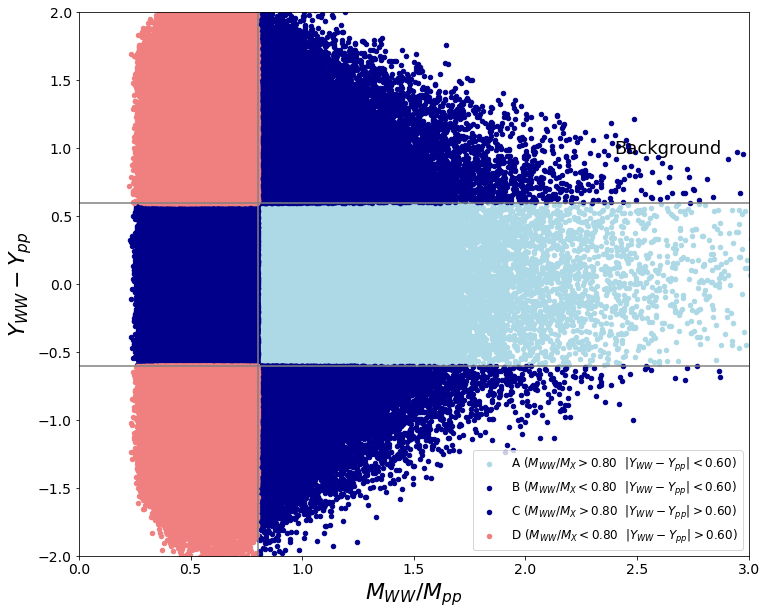

In [129]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events_nTracks40 )
n_events_bkg_A_nTracks40, err_n_events_bkg_A_nTracks40 = res_[ 0 ]
n_events_bkg_B_nTracks40, err_n_events_bkg_B_nTracks40 = res_[ 1 ]
n_events_bkg_C_nTracks40, err_n_events_bkg_C_nTracks40 = res_[ 2 ]
n_events_bkg_D_nTracks40, err_n_events_bkg_D_nTracks40 = res_[ 3 ]

Number of events: 49.900000000000006 +/- 0.9989994994993743
Number of events (A): 10.559999999999999 +/- 0.45956501172304237
Number of events (B): 14.839999999999998 +/- 0.5447935388750494
Number of events (C): 6.9399999999999995 +/- 0.3725587202039432
Number of events (D): 17.559999999999995 +/- 0.5926212956011623


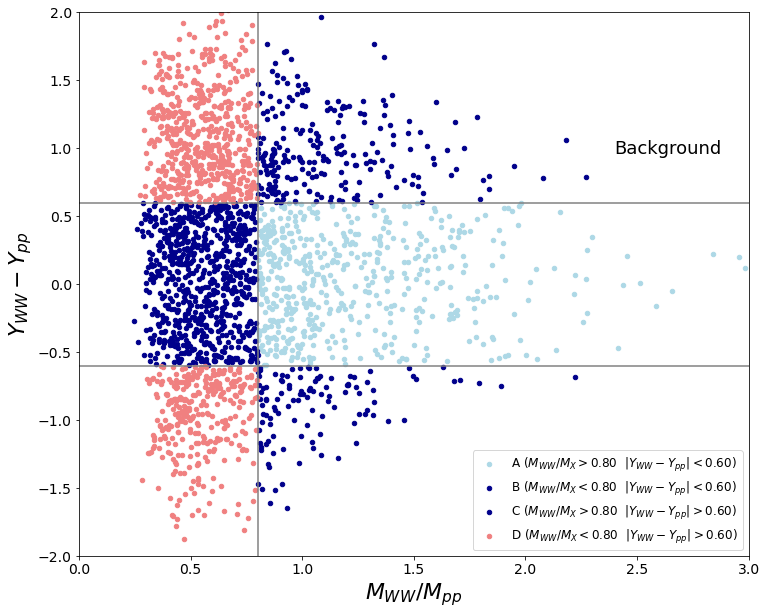

In [130]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

### Data

In [131]:
# label_data = ""
# if lepton_type == 'muon':
#     label_data = "data-single-arm"
# elif lepton_type == 'electron':
#     label_data = "data-single-arm-electron"

labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ "data-single-arm" ]
        fileNames_data = {
            "data-single-arm": "data-store-data-single-arm.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [ "data-single-arm-electron" ]
        fileNames_data = {
            "data-single-arm-electron": "data-store-data-single-arm-electron.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output'
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

# df_counts_data = None
# # df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_data = store_[ "counts" ]
# #     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_counts_data = None
# df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None

df_counts_data_list_ = []
# df_protons_multiRP_data_index_list_ = []
df_protons_multiRP_data_events_list_ = []
for label_ in labels_data:
    print ( label_ )
    file_path_ = fileNames_data[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
#         df_protons_multiRP_data_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events__ = store_[ "events_multiRP" ]
        df_counts_data_list_.append( df_counts_data__ )
#         df_protons_multiRP_data_index_list_.append( df_protons_multiRP_data_index__ )
        df_protons_multiRP_data_events_list_.append( df_protons_multiRP_data_events__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

# df_protons_multiRP_data_index = pd.concat( df_protons_multiRP_data_index_list_ )
df_protons_multiRP_data_events = pd.concat( df_protons_multiRP_data_events_list_ )

{'data-2018-muon-2018A': 'output/data-store-data-2018-muon-2018A.h5', 'data-2018-muon-2018B': 'output/data-store-data-2018-muon-2018B.h5', 'data-2018-muon-2018C': 'output/data-store-data-2018-muon-2018C.h5', 'data-2018-muon-2018D': 'output/data-store-data-2018-muon-2018D.h5'}
data-2018-muon-2018A
output/data-store-data-2018-muon-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018B
output/data-store-data-2018-muon-2018B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018C
output/data-store-data-2018-muon-2018C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018D
output/data-store-data-2018-muon-2018D.h5
['/counts', '/events_multiRP', '/protons_multiRP']


In [132]:
df_counts_data

All                  2168978
Jet                  2168978
Muon                 2101524
Proton_check_none    2101524
Proton               1436091
dtype: int64

In [133]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316199 738       995631040  0              143.0       0.3  13.800958   
                 995580288  0              143.0       0.3  13.800958   
                 995377984  0              143.0       0.3  13.800958   
                 995499584  0              143.0       0.3  13.800958   
       739       997434176  0              143.0       0.3  13.797550   
...                                          ...       ...        ...   
325170 612       1131288576 0              133.0       0.3   9.424077   
       636       1171731200 0              133.0       0.3   9.308405   
                 1172657792 0              133.0       0.3   9.308405   
                 1172100864 0              133.0       0.3   9.308405   
       637       1174399232 0              133.0       0.3   9.307345   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
316199 738       995631040  0      255.131989  0.222181  0.465844   
                 995580288  0      271.237091  1.201405 -0.672793   
                 995377984  0      229.029266  0.813785  2.755530   
                 995499584  0      255.765457 -0.307157  0.577788   
       739       997434176  0      260.124023 -1.864394 -2.418813   
...                                       ...       ...       ...   
325170 612       1131288576 0      246.729645  1.276864 -0.892836   
       636       1171731200 0      228.047119  0.597068  2.040150   
                 1172657792 0      379.605713  0.926268  1.182455   
                 1172100864 0      251.445709 -0.306289  2.033631   
       637       1174399232 0      387.555847 -1.455234  2.785599   

                                   jet0_energy   jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                           
316199 738       995631040  0       267.062378   11.652953      12.641805   
                 995580288  0       499.218048   58.163593      65.961021   
                 995377984  0       314.838440   17.131739      18.583464   
                 995499584  0       282.566986   68.186745      73.808731   
       739       997434176  0       862.344360   16.077612      18.077419   
...                                        ...         ...            ...   
325170 612       1131288576 0       479.071381    8.522972       9.892778   
       636       1171731200 0       274.537445   12.774544      13.872478   
                 1172657792 0       563.302612   45.636650      50.065033   
                 1172100864 0       275.799347   64.325394      70.173836   
       637       1174399232 0       886.254150  103.373039     117.672409   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
316199 738       995631040  0       0.114730  ...  1081.969849 -0.666323   
                 995580288  0       0.327002  ...  1574.876953 -0.395413   
                 995377984  0       0.153312  ...   856.215759 -0.402162   
                 995499584  0       0.384951  ...   916.753662  0.275115   
       739       997434176  0       0.175540  ...  1315.981689 -0.325852   
...                                      ...  ...          ...       ...   
325170 612       1131288576 0       0.102824  ...   893.898987  0.588127   
       636       1171731200 0       0.148284  ...   937.104431 -0.351514   
                 1172657792 0       0.229042  ...  1345.170898 -0.256506   
                 1172100864 0       0.306301  ...  1131.908936 -0.433039   
       637       1174399232 0       0.307969  ...  1221.715698 -0.098217   

                                   diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                            
316199 738       995631040  0     -641.624390     0.406985   
          

### Select events

In [134]:
print ( df_protons_multiRP_data_events.shape[0] )
df_protons_multiRP_data_events_nTracks40, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type, max_num_tracks=40 )
print ( df_protons_multiRP_data_events_nTracks40.shape[0] )
print ( selection_keys_ )
print ( selections_ )
df_protons_multiRP_data_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type )
df_protons_multiRP_data_events = df_protons_multiRP_data_events__
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

400491
7745
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 400491, 'Muon': 399843, 'Jet': 286221, 'Jet_Muon': 282658, 'MET': 219545, 'Jet_MET': 196539, 'PrunedMass': 54611, 'Tau21': 35575, 'BJet_Veto': 28561, 'Xi_CMS': 25312, 'WLeptonic': 16512, 'Jet_WLeptonic': 16134, 'MWW': 15194, 'ExtraTracks': 7745}
60
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 400491, 'Muon': 399843, 'Jet': 286221, 'Jet_Muon': 282658, 'MET': 219545, 'Jet_MET': 196539, 'PrunedMass': 54611, 'Tau21': 35575, 'BJet_Veto': 28561, 'Xi_CMS': 25312, 'WLeptonic': 16512, 'Jet_WLeptonic': 16134, 'MWW': 15194, 'ExtraTracks': 60}


In [135]:
def plot_regions_data( df_protons_multiRP_data_events ):
    df__ = df_protons_multiRP_data_events
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_data_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_data_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    
#     msk_data_A =  msk_data_cut1 &  msk_data_cut2
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

    # n_events_data = df__.shape[0]
#     n_events_data_A = df__[ msk_data_A ].shape[0]
    n_events_data_B = df__[ msk_data_B ].shape[0]
    n_events_data_C = df__[ msk_data_C ].shape[0]
    n_events_data_D = df__[ msk_data_D ].shape[0]

    # print ( "Number of events: {} - Ratio: {}".format( n_events_data, ( n_events_data / ( n_events_bkg ) ) ) )
    # print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
    # print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
    # print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
    # print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )
#     print ( "Number of events (A): {}".format( n_events_data_A ) )
    print ( "Number of events (B): {}".format( n_events_data_B ) )
    print ( "Number of events (C): {}".format( n_events_data_C ) )
    print ( "Number of events (D): {}".format( n_events_data_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
#     # label_str_ = "A (Data/Background: {:.2f})".format( ( n_events_data_A / ( n_events_bkg_A ) ) )
#     label_str_ = "A (Data)"
#     label_str_ = r"{}".format( label_str_ )
#     df__[ msk_data_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    
    # label_str_ = "B (Data/Background: {:.2f})".format( ( n_events_data_B / ( n_events_bkg_B ) ) )
    label_str_ = "B (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    
    # label_str_ = "C (Data/Background: {:.2f})".format( ( n_events_data_C / ( n_events_bkg_C ) ) )
    label_str_ = "C (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    
    # label_str_ = "D (Data/Background: {:.2f})".format( ( n_events_data_D / ( n_events_bkg_D ) ) )
    label_str_ = "D (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    
    plt.legend( loc='best', fontsize=16 )
    # leg_ = plt.legend( loc='best', fontsize=16 )
    # leg_.set_title( title_str_, prop={'size': 16} )
    # leg_._legend_box.align = "right"
    ax.text( 0.85, 0.75, "Data", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )
    
    return ( n_events_data_B, n_events_data_C, n_events_data_D )

Number of events (B): 2793
Number of events (C): 864
Number of events (D): 2995


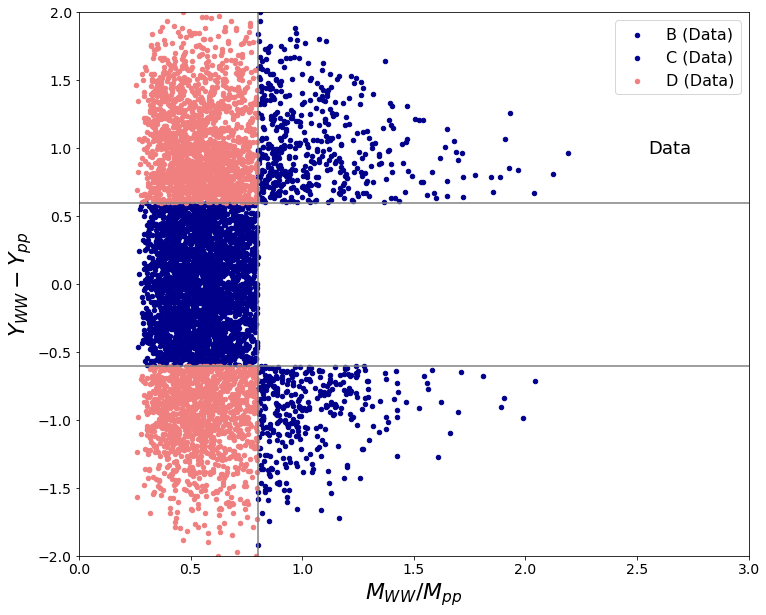

In [136]:
res_ = plot_regions_data( df_protons_multiRP_data_events_nTracks40 )
n_events_data_B_nTracks40 = res_[ 0 ]
n_events_data_C_nTracks40 = res_[ 1 ]
n_events_data_D_nTracks40 = res_[ 2 ]

Number of events (B): 24
Number of events (C): 4
Number of events (D): 20


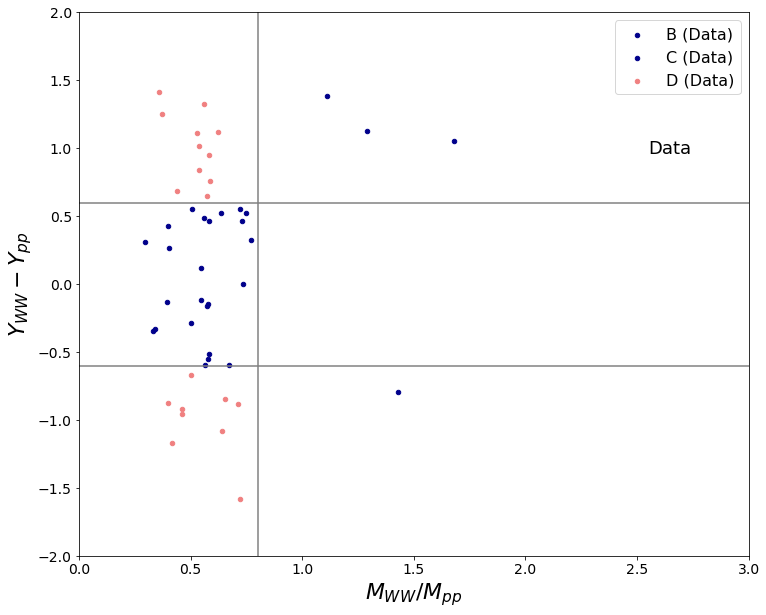

In [137]:
res_ = plot_regions_data( df_protons_multiRP_data_events )
n_events_data_B = res_[ 0 ]
n_events_data_C = res_[ 1 ]
n_events_data_D = res_[ 2 ]

In [138]:
ratio_ = ( n_events_data_B_nTracks40 / n_events_bkg_B_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_nTracks40 ) + ( err_n_events_bkg_B_nTracks40 / n_events_bkg_B_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_C_nTracks40 / n_events_bkg_C_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_C_nTracks40 ) + ( err_n_events_bkg_C_nTracks40 / n_events_bkg_C_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_D_nTracks40 / n_events_bkg_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_D_nTracks40 ) + ( err_n_events_bkg_D_nTracks40 / n_events_bkg_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9691993781577923 0.018515974017321087
0.9873383004982401 0.03391995609527372
1.0222750141650794 0.018869667182686525


In [139]:
n_events_data_B_D_nTracks40 = ( n_events_data_B_nTracks40 + n_events_data_D_nTracks40 )
# err_n_events_data_B_D_nTracks40 = np.sqrt( n_events_data_B_D_nTracks40 )
n_events_bkg_B_D_nTracks40 = ( n_events_bkg_B_nTracks40 + n_events_bkg_D_nTracks40 )
err_n_events_bkg_B_D_nTracks40 = np.sqrt( err_n_events_bkg_B_nTracks40 ** 2 + err_n_events_bkg_D_nTracks40 ** 2 )
ratio_ = ( n_events_data_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_D_nTracks40 ) + ( err_n_events_bkg_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9959562935558806 0.013220835057705297


GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.296704
1      0.154744
2      0.081710
3      0.040206
4      0.015635
         ...   
195    0.076577
196    0.073329
197    0.069737
198    0.065788
199    0.061463
Length: 200, dtype: float64 0.06649247646350145
0     -0.296704
1     -0.209505
2     -0.162457
3     -0.133846
4     -0.115192
         ...   
195   -0.057600
196   -0.057435
197   -0.057297
198   -0.057188
199   -0.057108
Length: 200, dtype: float64 -0.06855286658830263
Diff_YWW_YX
0           NaN
1      0.054971
2      0.054523
3      0.054081
4      0.053644
         ...   
195    0.022960
196    0.022926
197    0.022893
198    0.022860
199         NaN
Length: 200, dtype: float64 0.03218702646786871
0           NaN
1     -0.062864
2     -0.062206
3     -0.061555
4     -0.060912
         ...   
195   -0.035015
196   -0.035088
197   -0.035159
198   -0.035230
199         NaN
Length: 200, dtype: float64 -0.03502426500801579
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.363

/tmp/ipykernel_639/527451310.py:102: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:103: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:102: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:103: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:102: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:103: RuntimeWarning: invalid valu

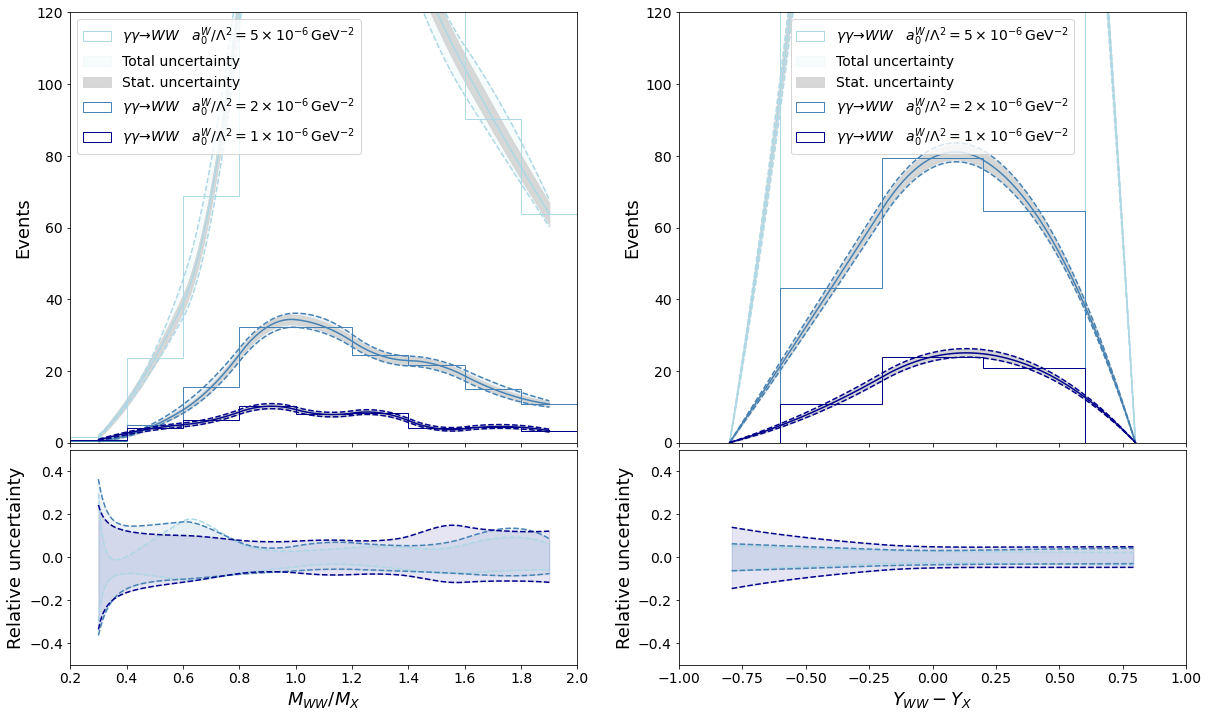

In [140]:
relative_uncertainty_ = True

# ylim_ = (0.,5.)
# ylim_ = (0.,3.)
# ylim_ = (0.,0.60)
ylim_ = (0.,120.)
ylim_ratio_ = (-0.50,0.50)

yscale_=None
# yscale_='log'

colors = [ "lightblue", "steelblue", "darkblue", "royalblue"  ]

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

class Obj2D:
    def __init__( self ):
        self.obj_ = [ [], [] ]
    def __getitem__( self, idx ):
        if isinstance( idx, tuple ): return self.obj_[ idx[0] ][ idx[1] ]
        else : return self.obj_[ idx ]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

def plot_signal( axes ):
    for idx_label_, label_ in enumerate( labels_signals[::-1] ):
        print ( label_ )
        color_ = colors[ idx_label_ ]

        spline_nom_ = {}
        spline_max_ = {}
        spline_min_ = {}
        spline_max_err_ = {}
        spline_min_err_ = {}
        spline_nom_arr_ = {}
        spline_max_arr_ = {}
        spline_min_arr_ = {}
        spline_max_err_arr_ = {}
        spline_min_err_arr_ = {}

        idx_row_ = 0
        idx_col_ = 0
        for var__ in vars_:
            print ( var__ )
            idx_row_ = 0
            counts_ = counts[ label_ ][ var__ ]
            err_ = err[ label_ ][ var__ ]
            bins_ = bins[ label_ ][ var__ ]
            __max_err__ = ( counts_ + err_ )
            __min_err__ = ( counts_ - err_ )
            __max__ = max_variations_total[ label_ ][ var__ ]
            __min__ = min_variations_total[ label_ ][ var__ ]

            bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

            axes[idx_row_,idx_col_].hist( bin_centers_, weights=counts_,
                                          histtype='step', color=color_, linestyle="-", label=labels_samples[ label_ ],
                                          bins=bins_ )

            spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
            spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
            spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
            spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
            spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
            x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
            spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
            spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
            spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
            spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
            spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

            axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
            __label_0 = None
            __label_1 = None
            if idx_label_ == 0:
                __label_0 = "Total uncertainty"
                __label_1 = "Stat. uncertainty"
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label=__label_0 )
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90, label=__label_1 )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ )
    #         axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            axes[idx_row_,idx_col_].get_xaxis().set_ticklabels( [] )
            axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
            if yscale_:
                axes[idx_row_,idx_col_].set_ylim( bottom=0.01 )
                axes[idx_row_,idx_col_].set_yscale( yscale_ )
            axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )

            idx_row_ = 1
            if relative_uncertainty_:
                ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_max_sel_ = pd.Series( ratio_max_ )
                ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                ratio_min_sel_ = pd.Series( ratio_min_ )
                ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                print ( ratio_max_sel_, ratio_max_sel_.mean() )
                print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
            else:
                diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
        #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
            axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            idx_col_ += 1

plot_signal( axes=axes )

if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.png", bbox_inches='tight' )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.296704
1      0.154744
2      0.081710
3      0.040206
4      0.015635
         ...   
195    0.076577
196    0.073329
197    0.069737
198    0.065788
199    0.061463
Length: 200, dtype: float64 0.06649247646350145
0     -0.296704
1     -0.209505
2     -0.162457
3     -0.133846
4     -0.115192
         ...   
195   -0.057600
196   -0.057435
197   -0.057297
198   -0.057188
199   -0.057108
Length: 200, dtype: float64 -0.06855286658830263
Diff_YWW_YX
0           NaN
1      0.054971
2      0.054523
3      0.054081
4      0.053644
         ...   
195    0.022960
196    0.022926
197    0.022893
198    0.022860
199         NaN
Length: 200, dtype: float64 0.03218702646786871
0           NaN
1     -0.062864
2     -0.062206
3     -0.061555
4     -0.060912
         ...   
195   -0.035015
196   -0.035088
197   -0.035159
198   -0.035230
199         NaN
Length: 200, dtype: float64 -0.03502426500801579
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.363

/tmp/ipykernel_639/527451310.py:102: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:103: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:102: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:103: RuntimeWarning: invalid value encountered in divide
  ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:102: RuntimeWarning: invalid value encountered in divide
  ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
/tmp/ipykernel_639/527451310.py:103: RuntimeWarning: invalid valu

0           NaN
1      0.051936
2      0.051924
3      0.051911
4      0.051899
         ...   
195    0.045849
196    0.045841
197    0.045832
198    0.045824
199         NaN
Length: 200, dtype: float64 0.04874748110873947
0           NaN
1     -0.051936
2     -0.051924
3     -0.051911
4     -0.051899
         ...   
195   -0.045849
196   -0.045841
197   -0.045832
198   -0.045824
199         NaN
Length: 200, dtype: float64 -0.04874748110873936


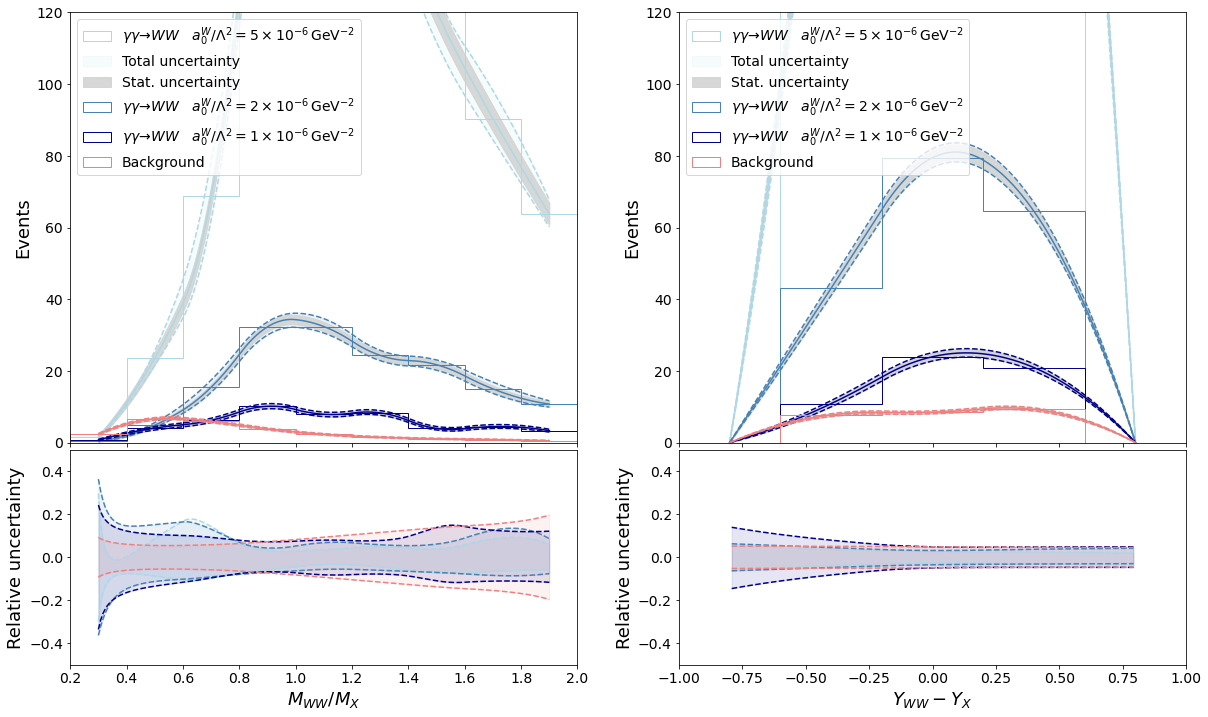

In [141]:
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

plot_signal( axes=axes )

color_ = 'lightcoral'

# counts__ = None
# err__ = None
# bins__ = None
# max_variations_total__ = None
# min_variations_total__ = None
spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_max_err_ = {}
spline_min_err_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}
spline_max_err_arr_ = {}
spline_min_err_arr_ = {}
idx_row_ = 0
idx_col_ = 0
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ + np.sqrt( sum_w2_ ) ) 
    __min__ = ( sum_w_ - np.sqrt( sum_w2_ ) )
    
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
#     counts__[ var__ ] = sum_w_
#     err__[ var__ ] = np.sqrt( sum_w2_ )
#     bins__[ var__ ] = bins_
#     max_variations_total__[ var__ ] = __max__
#     min_variations_total__[ var__ ] = __min__

    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ], label="Background" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label="Background" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
#     axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
    axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )
    
    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
    idx_col_ += 1
    
if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [142]:
# axes[0,0].set_xlim( 0.6, 2.0 )
# axes[1,0].set_xlim( 0.6, 2.0 )
# axes[0,1].set_xlim( -1., 1. )
# axes[1,1].set_xlim( -1., 1. )
# axes[0,1].set_xlim( -0.60, 0.60 )
# axes[1,1].set_xlim( -0.60, 0.60 )
# axes[0,0].set_ylim( 0., 5. )
# axes[0,0].set_ylim( 0., 9. )
# axes[0,1].set_ylim( 0., 5. )
# axes[0,1].set_ylim( 0., 8. )
# axes[0,1].set_ylim( 0., 9. )
# axes[0,0].set_ylim( 0., 1. )
# axes[0,1].set_ylim( 0., 1. )
# axes[0,0].set_yscale( 'log' )
# axes[0,1].set_yscale( 'log' )
# axes[0,0].set_ylim( 0.01, 5. )
# # axes[0,1].set_ylim( 0.01, 5. )
# axes[0,1].set_ylim( 0.01, 8. )
# fig

In [143]:
# if save_figures:
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [144]:
# var_name_lepton_id_up_ = ""
# var_name_lepton_id_dw_ = ""
# if lepton_type == 'muon':
#     var_name_lepton_id_up_ = "syst_up_sf_muon_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_muon_id"
# elif lepton_type == 'electron':
#     var_name_lepton_id_up_ = "syst_up_sf_electron_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_electron_id"
var_name_lepton_id_ = ""
if lepton_type == 'muon':
    var_name_lepton_id_ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name_lepton_id_ = "sf_electron_id"
var_name_trigger_ = ""
if lepton_type == 'muon':
    var_name_trigger_ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name_trigger_ = "sf_electron_trigger"

uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]

for label__ in labels_signals:
    for unc__ in uncertainties_:
        label_unc__ = "syst_up_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] < 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )
        label_unc__ = "syst_dw_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] > 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )

    var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
    var_name_trigger_up__ = "syst_up_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                          )
    var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
    var_name_trigger_dw__ = "syst_dw_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                          )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.16240522523423806, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.02610846492676444, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068269924, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389, 'syst_up_sf_prefiring': 0.041203580054286704, 'syst_dw_sf_prefiring': -0.041203580054286704, 'syst_up_proton_scale_arm0': 0.6905649883407534, 'syst_dw_proton_scale_arm0': -0.47629133883732777, 'syst_up_proton_scale_arm1': 0.695693477306996, 'syst_dw_proton_scale_arm1': -0.4168443020666217, 'syst_up_proton_scale': 0.9802394694611948, 'syst_dw_proton_scale': -0.6329396587486544, 'syst_up_proton_eff': 0.32571372939530363, 'syst_dw_proton_eff': -0.32571372939530363, 'syst_up_total': 1.0630077039146928, 'syst_dw_total': -0.8607122863620422}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'

In [145]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                        44.746850   
stat                                            1.356598   
syst_up_jes                                     0.162405   
syst_dw_jes                                    -0.472405   
syst_up_jer                                     0.162405   
syst_dw_jer                                    -0.026108   
syst_up_sf_muon_id                              0.022486   
syst_dw_sf_muon_id                             -0.022486   
syst_up_sf_muon_trigger                         0.089846   
syst_dw_sf_muon_trigger                        -0.089846   
syst_up_sf_prefiring                            0.041204   
syst_dw_sf_prefiring                           -0.041204   
syst_up_proton_scale_arm0                       0.690565   
syst_dw_proton_scale_arm0                      -0.476291   
syst_up_proton_scale_arm1                       0.695693   
syst_dw_proton_scale_arm1                      -0.416844   
syst_up_proton_scale                            0.980239   
syst_dw_proton_scale                           -0.632940   
syst_up_proton_eff                              0.325714   
syst_dw_proton_eff                             -0.325714   
syst_up_total                                   1.063008   
syst_dw_total                                  -0.860712   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                       166.383099   
stat                                            2.963913   
syst_up_jes                                     1.159247   
syst_dw_jes                                    -1.818466   
syst_up_jer                                     0.369165   
syst_dw_jer                                    -0.317293   
syst_up_sf_muon_id                              0.081941   
syst_dw_sf_muon_id                             -0.081941   
syst_up_sf_muon_trigger                         0.337530   
syst_dw_sf_muon_trigger                        -0.337530   
syst_up_sf_prefiring                            0.067751   
syst_dw_sf_prefiring                           -0.067744   
syst_up_proton_scale_arm0                       1.408470   
syst_dw_proton_scale_arm0                      -2.160505   
syst_up_proton_scale_arm1                       2.061936   
syst_dw_proton_scale_arm1                      -2.416243   
syst_up_proton_scale                            2.497071   
syst_dw_proton_scale                           -3.241298   
syst_up_proton_eff                              1.160931   
syst_dw_proton_eff                             -1.160931   
syst_up_total                                   3.031253   
syst_dw_total                                  -3.922563   

                           GGToWW-AQGC-2018-muon-A0W5e-6  
central                                       964.630934  
stat                                           11.357925  
syst_up_jes                                     6.051613  
syst_dw_jes                                    -3.592049  
syst_up_jer                                     1.318645  
syst_dw_jer                                    -2.135224  
syst_up_sf_muon_id                              0.458826  
syst_dw_sf_muon_id                             -0.458826  
syst_up_sf_muon_trigger                         1.944968  
syst_dw_sf_muon_trigger                        -1.944968  
syst_up_sf_prefiring                            0.726066  
syst_dw_sf_prefiring                           -0.726066  
syst_up_proton_scale_arm0                       6.672104  
syst_dw_proton_scale_arm0                     -11.429062  
syst_up_proton_scale_arm1                       9.201860  
syst_dw_proton_scale_arm1                     -12.104616  
syst_up_proton_scale                           11.366230  
syst_dw_proton_scale                          -16.647678  
syst_up_proton_eff                              6.351437  
syst_dw_proton_eff                             -6.351437  
syst_up_total             

In [146]:
# df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100.

In [147]:
symmetrize_uncertainties = True
if symmetrize_uncertainties:
#     var_name_lepton_id_ = ""
#     if lepton_type == 'muon':
#         var_name_lepton_id_ = "sf_muon_id"
#     elif lepton_type == 'electron':
#         var_name_lepton_id_ = "sf_electron_id"

    uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]
    
    for label__ in labels_signals:
        for unc__ in uncertainties_:
            label_unc_up__ = "syst_up_{}".format( unc__ )
            label_unc_dw__ = "syst_dw_{}".format( unc__ )
            unc_max__ = np.max( [ np.abs( sum_weights[ label__ ][ label_unc_up__ ] ) , np.abs( sum_weights[ label__ ][ label_unc_dw__ ] ) ] )
            sum_weights[ label__ ][ label_unc_up__ ] =  unc_max__
            sum_weights[ label__ ][ label_unc_dw__ ] = -unc_max__

        var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                              )
        var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                              )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 44.7468504587915, 'stat': 1.3565977471054644, 'syst_up_jes': 0.47240483656629095, 'syst_dw_jes': -0.47240483656629095, 'syst_up_jer': 0.16240522523423806, 'syst_dw_jer': -0.16240522523423806, 'syst_up_sf_muon_id': 0.022485789068284134, 'syst_dw_sf_muon_id': -0.022485789068284134, 'syst_up_sf_muon_trigger': 0.0898457983978389, 'syst_dw_sf_muon_trigger': -0.0898457983978389, 'syst_up_sf_prefiring': 0.041203580054286704, 'syst_dw_sf_prefiring': -0.041203580054286704, 'syst_up_proton_scale_arm0': 0.6905649883407534, 'syst_dw_proton_scale_arm0': -0.47629133883732777, 'syst_up_proton_scale_arm1': 0.695693477306996, 'syst_dw_proton_scale_arm1': -0.4168443020666217, 'syst_up_proton_scale': 0.9802394694611948, 'syst_dw_proton_scale': -0.9802394694611948, 'syst_up_proton_eff': 0.32571372939530363, 'syst_dw_proton_eff': -0.32571372939530363, 'syst_up_total': 1.1518577390501952, 'syst_dw_total': -1.1518577390501952}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'

In [148]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                        44.746850   
stat                                            1.356598   
syst_up_jes                                     0.472405   
syst_dw_jes                                    -0.472405   
syst_up_jer                                     0.162405   
syst_dw_jer                                    -0.162405   
syst_up_sf_muon_id                              0.022486   
syst_dw_sf_muon_id                             -0.022486   
syst_up_sf_muon_trigger                         0.089846   
syst_dw_sf_muon_trigger                        -0.089846   
syst_up_sf_prefiring                            0.041204   
syst_dw_sf_prefiring                           -0.041204   
syst_up_proton_scale_arm0                       0.690565   
syst_dw_proton_scale_arm0                      -0.476291   
syst_up_proton_scale_arm1                       0.695693   
syst_dw_proton_scale_arm1                      -0.416844   
syst_up_proton_scale                            0.980239   
syst_dw_proton_scale                           -0.980239   
syst_up_proton_eff                              0.325714   
syst_dw_proton_eff                             -0.325714   
syst_up_total                                   1.151858   
syst_dw_total                                  -1.151858   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                       166.383099   
stat                                            2.963913   
syst_up_jes                                     1.818466   
syst_dw_jes                                    -1.818466   
syst_up_jer                                     0.369165   
syst_dw_jer                                    -0.369165   
syst_up_sf_muon_id                              0.081941   
syst_dw_sf_muon_id                             -0.081941   
syst_up_sf_muon_trigger                         0.337530   
syst_dw_sf_muon_trigger                        -0.337530   
syst_up_sf_prefiring                            0.067751   
syst_dw_sf_prefiring                           -0.067751   
syst_up_proton_scale_arm0                       1.408470   
syst_dw_proton_scale_arm0                      -2.160505   
syst_up_proton_scale_arm1                       2.061936   
syst_dw_proton_scale_arm1                      -2.416243   
syst_up_proton_scale                            3.241298   
syst_dw_proton_scale                           -3.241298   
syst_up_proton_eff                              1.160931   
syst_dw_proton_eff                             -1.160931   
syst_up_total                                   3.927099   
syst_dw_total                                  -3.927099   

                           GGToWW-AQGC-2018-muon-A0W5e-6  
central                                       964.630934  
stat                                           11.357925  
syst_up_jes                                     6.051613  
syst_dw_jes                                    -6.051613  
syst_up_jer                                     2.135224  
syst_dw_jer                                    -2.135224  
syst_up_sf_muon_id                              0.458826  
syst_dw_sf_muon_id                             -0.458826  
syst_up_sf_muon_trigger                         1.944968  
syst_dw_sf_muon_trigger                        -1.944968  
syst_up_sf_prefiring                            0.726066  
syst_dw_sf_prefiring                           -0.726066  
syst_up_proton_scale_arm0                       6.672104  
syst_dw_proton_scale_arm0                     -11.429062  
syst_up_proton_scale_arm1                       9.201860  
syst_dw_proton_scale_arm1                     -12.104616  
syst_up_proton_scale                           16.647678  
syst_dw_proton_scale                          -16.647678  
syst_up_proton_eff                              6.351437  
syst_dw_proton_eff                             -6.351437  
syst_up_total             

In [149]:
df__ = df_protons_multiRP_bkg_events
weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
weights_squared__ = ( weights__ ** 2 )
arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )

10.559999999999999 ± 0.45956501172304237


In [150]:
df_sum_weights__[ "Background" ] = -1.
df_sum_weights__[ "Background" ][ "central" ] = sum_weights_cut__
df_sum_weights__[ "Background" ][ "stat" ] = np.sqrt( sum_weights_squared_cut__ )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                        44.746850   
stat                                            1.356598   
syst_up_jes                                     0.472405   
syst_dw_jes                                    -0.472405   
syst_up_jer                                     0.162405   
syst_dw_jer                                    -0.162405   
syst_up_sf_muon_id                              0.022486   
syst_dw_sf_muon_id                             -0.022486   
syst_up_sf_muon_trigger                         0.089846   
syst_dw_sf_muon_trigger                        -0.089846   
syst_up_sf_prefiring                            0.041204   
syst_dw_sf_prefiring                           -0.041204   
syst_up_proton_scale_arm0                       0.690565   
syst_dw_proton_scale_arm0                      -0.476291   
syst_up_proton_scale_arm1                       0.695693   
syst_dw_proton_scale_arm1                      -0.416844   
syst_up_proton_scale                            0.980239   
syst_dw_proton_scale                           -0.980239   
syst_up_proton_eff                              0.325714   
syst_dw_proton_eff                             -0.325714   
syst_up_total                                   1.151858   
syst_dw_total                                  -1.151858   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                       166.383099   
stat                                            2.963913   
syst_up_jes                                     1.818466   
syst_dw_jes                                    -1.818466   
syst_up_jer                                     0.369165   
syst_dw_jer                                    -0.369165   
syst_up_sf_muon_id                              0.081941   
syst_dw_sf_muon_id                             -0.081941   
syst_up_sf_muon_trigger                         0.337530   
syst_dw_sf_muon_trigger                        -0.337530   
syst_up_sf_prefiring                            0.067751   
syst_dw_sf_prefiring                           -0.067751   
syst_up_proton_scale_arm0                       1.408470   
syst_dw_proton_scale_arm0                      -2.160505   
syst_up_proton_scale_arm1                       2.061936   
syst_dw_proton_scale_arm1                      -2.416243   
syst_up_proton_scale                            3.241298   
syst_dw_proton_scale                           -3.241298   
syst_up_proton_eff                              1.160931   
syst_dw_proton_eff                             -1.160931   
syst_up_total                                   3.927099   
syst_dw_total                                  -3.927099   

                           GGToWW-AQGC-2018-muon-A0W5e-6  Background  
central                                       964.630934   10.560000  
stat                                           11.357925    0.459565  
syst_up_jes                                     6.051613   -1.000000  
syst_dw_jes                                    -6.051613   -1.000000  
syst_up_jer                                     2.135224   -1.000000  
syst_dw_jer                                    -2.135224   -1.000000  
syst_up_sf_muon_id                              0.458826   -1.000000  
syst_dw_sf_muon_id                             -0.458826   -1.000000  
syst_up_sf_muon_trigger                         1.944968   -1.000000  
syst_dw_sf_muon_trigger                        -1.944968   -1.000000  
syst_up_sf_prefiring                            0.726066   -1.000000  
syst_dw_sf_prefiring                           -0.726066   -1.000000  
syst_up_proton_scale_arm0                       6.672104   -1.000000  
syst_dw_proton_scale_arm0                     -11.429062   -1.000000  
syst_up_proton_scale_arm1                       9.201860   -1.000000  
syst_dw_proton_scale_arm1                     -12.104616   -1.000000  
syst_up_proton_scale                           16.647678  

In [151]:
df_sum_weights__.iloc[ 1:, : ].where( ~( df_sum_weights__.iloc[ 1:, : ] != -1. ) , df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100. )

GGToWW-AQGC-2018-muon-A0W1e-6  \
stat                                            3.031717   
syst_up_jes                                     1.055728   
syst_dw_jes                                    -1.055728   
syst_up_jer                                     0.362942   
syst_dw_jer                                    -0.362942   
syst_up_sf_muon_id                              0.050251   
syst_dw_sf_muon_id                             -0.050251   
syst_up_sf_muon_trigger                         0.200787   
syst_dw_sf_muon_trigger                        -0.200787   
syst_up_sf_prefiring                            0.092082   
syst_dw_sf_prefiring                           -0.092082   
syst_up_proton_scale_arm0                       1.543271   
syst_dw_proton_scale_arm0                      -1.064413   
syst_up_proton_scale_arm1                       1.554732   
syst_dw_proton_scale_arm1                      -0.931561   
syst_up_proton_scale                            2.190633   
syst_dw_proton_scale                           -2.190633   
syst_up_proton_eff                              0.727903   
syst_dw_proton_eff                             -0.727903   
syst_up_total                                   2.574165   
syst_dw_total                                  -2.574165   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
stat                                            1.781378   
syst_up_jes                                     1.092939   
syst_dw_jes                                    -1.092939   
syst_up_jer                                     0.221877   
syst_dw_jer                                    -0.221877   
syst_up_sf_muon_id                              0.049248   
syst_dw_sf_muon_id                             -0.049248   
syst_up_sf_muon_trigger                         0.202863   
syst_dw_sf_muon_trigger                        -0.202863   
syst_up_sf_prefiring                            0.040720   
syst_dw_sf_prefiring                           -0.040720   
syst_up_proton_scale_arm0                       0.846522   
syst_dw_proton_scale_arm0                      -1.298512   
syst_up_proton_scale_arm1                       1.239270   
syst_dw_proton_scale_arm1                      -1.452217   
syst_up_proton_scale                            1.948093   
syst_dw_proton_scale                           -1.948093   
syst_up_proton_eff                              0.697746   
syst_dw_proton_eff                             -0.697746   
syst_up_total                                   2.360275   
syst_dw_total                                  -2.360275   

                           GGToWW-AQGC-2018-muon-A0W5e-6  Background  
stat                                            1.177437    4.351941  
syst_up_jes                                     0.627350   -1.000000  
syst_dw_jes                                    -0.627350   -1.000000  
syst_up_jer                                     0.221351   -1.000000  
syst_dw_jer                                    -0.221351   -1.000000  
syst_up_sf_muon_id                              0.047565   -1.000000  
syst_dw_sf_muon_id                             -0.047565   -1.000000  
syst_up_sf_muon_trigger                         0.201628   -1.000000  
syst_dw_sf_muon_trigger                        -0.201628   -1.000000  
syst_up_sf_prefiring                            0.075269   -1.000000  
syst_dw_sf_prefiring                           -0.075269   -1.000000  
syst_up_proton_scale_arm0                       0.691674   -1.000000  
syst_dw_proton_scale_arm0                      -1.184812   -1.000000  
syst_up_proton_scale_arm1                       0.953925   -1.000000  
syst_dw_proton_scale_arm1                      -1.254844   -1.000000  
syst_up_proton_scale                            1.725808   -1.000000  
syst_dw_proton_scale                           -1.725808   -1.000000  
syst_up_proton_eff                              0.658432   -1.000000  
syst_dw_proton_eff                  

In [152]:
save_table_systematics = False

if save_table_systematics:
    file_path_ = ""
    file_str_ = "table_systematics"
    if norm_to_1fb:
        file_str_ += "-norm_to_1fb"
    if data_sample == '2017':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2017-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2017-electron" + ".h5"
    elif data_sample == '2018':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2018-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2018-electron" + ".h5"

    with pd.HDFStore( file_path_, 'w' ) as store_:
        store_[ "table_systematics" ] = df_sum_weights__

In [153]:
if save_table_systematics:
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )

In [154]:
# arrays = [
#     ["bar","bar","foo","foo","baz","baz"],
#     ["one","one","two","two","one","one"]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 6*2 ).reshape( 6, 2 ), index=index, columns=['A','B'] )
# df_groupby = df.groupby( ["first","second"] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# df_groupby_apply_ = df_groupby.apply( lambda df__: ( df__['A'].iloc[0] * df__['B'].iloc[1] ) )
# print ( df_groupby_apply_ )
# df_nonduplicated = df[ ~df.index.duplicated(keep='first') ]
# df_nonduplicated.loc[ :, 'C' ] = df_groupby_apply_
# df_nonduplicated

In [155]:
# arrays = [
#     [ "bar", "bar", "bar", "foo", "foo", "foo", "baz" ],
#     [ "one", "two", "two", "one", "one", "two", "one" ]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 7*2 ).reshape( 7, 2 ), index=index, columns=['A','B'] )
# df = df.reset_index().set_index( ["first"] )
# print ( df )
# df_groupby = df.groupby( [ "first", "second" ] )
# # df_groupby = df.groupby( [ "first" ] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# # df_groupby_A_min = df_groupby[ "A" ].min()
# # print ( df_groupby_A_min )
# # df_groupby_A_max = df_groupby[ "A" ].max()
# # print ( df_groupby_A_max )
# # df_groupby_A_min.loc[ ("foo", "two") ]
# msk__ = df_groupby[ 'A' ].transform( lambda s__: ( s__ == s__.min() ) )
# print ( msk__ )
# df[ msk__ ]

In [156]:
# help( df_groupby.transform )

In [157]:
# from scipy.interpolate import make_interp_spline
# np.info( make_interp_spline )

In [158]:
# import mpl_toolkits.axes_grid1
# dir( mpl_toolkits.axes_grid1 )
# fig_ = plt.figure()
# divider_ = mpl_toolkits.axes_grid1.make_axes_locatable( plt.gca() )
# divider_
# help( mpl_toolkits.axes_grid1.axes_divider.AxesDivider )